In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import math
from dateutil.relativedelta import relativedelta
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight') 

startDate_UTC = dt.datetime(2013,1,1)
endDate_UTC = dt.datetime.today()

In [2]:
# Read in csv to speed up process
df = pd.DataFrame()
df = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Total Data Analysis and Neg Price Model\IE_data.csv')
#df = pd.read_csv('IE_data.csv') #Uncomment to use
df.columns = ['','DA_Prices', 'Total_Wind_Fcast', 'Total_Demand_Fcast','Wind_Penetration_Fcast']
df[''] = pd.to_datetime(df[''], format='%Y/%m/%d')
df = df.set_index('')
df = df.dropna()
df = df.loc[df.index < dt.datetime(2021,1,1)]
df

DA_Prices  Total_Wind_Fcast  Total_Demand_Fcast  \
                                                                       
2013-01-01 00:00:00      48.71          1042.239            3803.080   
2013-01-01 01:00:00      48.71          1092.219            3518.080   
2013-01-01 02:00:00      36.75          1140.414            3221.360   
2013-01-01 03:00:00      36.41          1175.463            2994.740   
2013-01-01 04:00:00      36.41          1173.676            2900.830   
...                        ...               ...                 ...   
2020-12-31 19:00:00      64.28          2103.129            5881.589   
2020-12-31 20:00:00      62.66          2051.916            5531.672   
2020-12-31 21:00:00      56.90          1972.792            5202.729   
2020-12-31 22:00:00      50.70          1878.701            4762.078   
2020-12-31 23:00:00      55.09          1971.151            4341.172   

                     Wind_Penetration_Fcast  
                                             
2013-01-01 00:00:00                   0.274  
2013-01-01 01:00:00                   0.310  
2013-01-01 02:00:00                   0.354  
2013-01-01 03:00:00                   0.393  
2013-01-01 04:00:00                   0.405  
...                                     ...  
2020-12-31 19:00:00                   0.358  
2020-12-31 20:00:00                   0.371  
2020-12-31 21:00:00                   0.379  
2020-12-31 22:00:00                   0.395  
2020-12-31 23:00:00                   0.454  

[70128 rows x 4 columns]

In [3]:
# Read in csv to speed up process
df_inter = pd.DataFrame()
df_inter = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Total Data Analysis and Neg Price Model\interconnector_data.csv')

#df_inter = pd.read_csv('interconnector_data.csv') #Uncomment to use

df_inter.columns = ['','Imports', 'Exports', 'Value']
df_inter[''] = pd.to_datetime(df_inter[''], format='%Y/%m/%d')
df_inter = df_inter.drop_duplicates(subset=[''], keep='first')
df_inter = df_inter.set_index('')
df_inter = df_inter.fillna(value = 0.00)
df_inter = df_inter.loc[df_inter.index < dt.datetime(2021,1,1)]


df_inter['DA_Prices'] = (df['DA_Prices'].loc[df.index>=dt.datetime(2015,1,1)]).tolist()
df_inter['Total_Wind_Fcast'] = (df['Total_Wind_Fcast'].loc[df.index>=dt.datetime(2015,1,1,0,0)]).tolist()
df_inter['Total_Demand_Fcast'] = (df['Total_Demand_Fcast'].loc[df.index>=dt.datetime(2015,1,1,0,0)]).tolist()
df_inter['Wind_Penetration_Fcast'] = (df['Wind_Penetration_Fcast'].loc[df.index>=dt.datetime(2015,1,1,0,0)]).tolist()
df_inter['SNSP'] =  (df_inter['Total_Wind_Fcast'] + df_inter['Imports'])/(df_inter['Total_Demand_Fcast'] + df_inter['Exports'])
df_inter

Imports  Exports  Value  DA_Prices  Total_Wind_Fcast  \
                                                                            
2015-01-01 00:00:00      0.0      0.0    0.0      44.24          1265.235   
2015-01-01 01:00:00      0.0      0.0    0.0      44.24          1321.230   
2015-01-01 02:00:00      0.0      0.0    0.0      30.98          1391.480   
2015-01-01 03:00:00      0.0      0.0    0.0      30.97          1458.005   
2015-01-01 04:00:00      0.0      0.0    0.0      30.70          1537.880   
...                      ...      ...    ...        ...               ...   
2020-12-31 19:00:00      0.0    898.0 -898.0      64.28          2103.129   
2020-12-31 20:00:00      0.0    900.0 -900.0      62.66          2051.916   
2020-12-31 21:00:00      0.0    900.0 -900.0      56.90          1972.792   
2020-12-31 22:00:00      0.0    900.0 -900.0      50.70          1878.701   
2020-12-31 23:00:00      0.0    602.0 -602.0      55.09          1971.151   

                     Total_Demand_Fcast  Wind_Penetration_Fcast      SNSP  
                                                                           
2015-01-01 00:00:00            3731.144                   0.339  0.339101  
2015-01-01 01:00:00            3523.522                   0.375  0.374974  
2015-01-01 02:00:00            3230.744                   0.431  0.430700  
2015-01-01 03:00:00            2990.135                   0.488  0.487605  
2015-01-01 04:00:00            2834.995                   0.542  0.542463  
...                                 ...                     ...       ...  
2020-12-31 19:00:00            5881.589                   0.358  0.310215  
2020-12-31 20:00:00            5531.672                   0.371  0.319033  
2020-12-31 21:00:00            5202.729                   0.379  0.323264  
2020-12-31 22:00:00            4762.078                   0.395  0.331804  
2020-12-31 23:00:00            4341.172                   0.454  0.398762  

[52608 rows x 8 columns]

In [4]:
# If SNSP > 1, not all wind is injected and it will be reduced


df_inter['Total_Wind_Fcast'] = np.where(df_inter['SNSP'] > 1,  (df_inter['Total_Demand_Fcast'] + df_inter['Exports']) - df_inter['Imports'], df_inter['Total_Wind_Fcast'])

df_inter['SNSP'] =  (df_inter['Total_Wind_Fcast'] + df_inter['Imports'])/(df_inter['Total_Demand_Fcast'] + df_inter['Exports'])


#df_inter['SNSP'] = np.where(df_inter['SNSP'] > 1,  1, df_inter['SNSP'])

df_inter[df_inter.index < dt.datetime(2020,1,1)].max()


Imports                   2031.000
Exports                   1760.000
Value                     1856.000
DA_Prices                  800.000
Total_Wind_Fcast          4397.722
Total_Demand_Fcast        6495.743
Wind_Penetration_Fcast       1.348
SNSP                         1.000
dtype: float64

In [5]:
df_wind = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_wind['Date'] = data_list
df_wind = df_wind.set_index('Date')

for year in range(2013,2021):   
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df.Total_Wind_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_wind['%s_Wind_Fcast' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df.Total_Wind_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_wind['%s_Wind_Fcast' %year] = year_list
        

        
df_dmd = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_dmd['Date'] = data_list
df_dmd = df_dmd.set_index('Date')

for year in range(2013,2021):   
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df.Total_Demand_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_dmd['%s_Demand_Fcast' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df.Total_Demand_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_dmd['%s_Demand_Fcast' %year] = year_list

        
df_wp = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_wp['Date'] = data_list
df_wp = df_wp.set_index('Date')

for year in range(2013,2021):   
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df.Wind_Penetration_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_wp['%s_WP_Fcast' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df.Wind_Penetration_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_wp['%s_WP_Fcast' %year] = year_list

df_imports = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_imports['Date'] = data_list
df_imports = df_imports.set_index('Date')

for year in range(2015,2021):   
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df_inter.Imports.loc[(df_inter.index>=dt.datetime(year,1,1)) & (df_inter.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_imports['%s_Imports' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df_inter.Imports.loc[(df_inter.index>=dt.datetime(year,1,1)) & (df_inter.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_imports['%s_Imports' %year] = year_list 
        
        
        
df_exports = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_exports['Date'] = data_list
df_exports = df_exports.set_index('Date')

for year in range(2015,2021):   
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df_inter.Exports.loc[(df_inter.index>=dt.datetime(year,1,1)) & (df_inter.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_exports['%s_Exports' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df_inter.Exports.loc[(df_inter.index>=dt.datetime(year,1,1)) & (df_inter.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_exports['%s_Exports' %year] = year_list 


In [6]:
#Monthly imports percentage increase
df_imports_month = pd.DataFrame()

for year in range(2015,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_imports.groupby(df_imports.index.month).sum())['%s_Imports' %year].iloc[i+1] - (df_imports.groupby(df_imports.index.month).sum())['%s_Imports' %year].iloc[i] ) /((df_imports.groupby(df_imports.index.month).sum())['%s_Imports' %year].iloc[i]) )
    
    if year >= 2016:
        x = ( (df_imports.groupby(df_imports.index.month).sum())['%s_Imports' %year].iloc[0] - (df_imports.groupby(df_imports.index.month).sum())['%s_Imports' %(year-1)].iloc[11] ) /((df_imports.groupby(df_imports.index.month).sum())['%s_Imports' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_imports_month['%s_imports_per' %year] = thelist

    
    
#Monthly exports percentage increase
df_exports_month = pd.DataFrame()

for year in range(2015,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_exports.groupby(df_exports.index.month).sum())['%s_Exports' %year].iloc[i+1] - (df_exports.groupby(df_exports.index.month).sum())['%s_Exports' %year].iloc[i] ) /((df_exports.groupby(df_exports.index.month).sum())['%s_Exports' %year].iloc[i]) )
    
    if year >= 2016:
        x = ( (df_exports.groupby(df_exports.index.month).sum())['%s_Exports' %year].iloc[0] - (df_exports.groupby(df_exports.index.month).sum())['%s_Exports' %(year-1)].iloc[11] ) /((df_exports.groupby(df_exports.index.month).sum())['%s_Exports' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_exports_month['%s_exports_per' %year] = thelist

C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars


In [7]:
#Monthly wind percentage increase
df_wind_month = pd.DataFrame()

for year in range(2013,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %year].iloc[i+1] - (df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %year].iloc[i] ) /((df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %year].iloc[i]) )
    
    if year >= 2014:
        x = ( (df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %year].iloc[0] - (df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %(year-1)].iloc[11] ) /((df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_wind_month['%s_wind_per' %year] = thelist
    
    
#Monthly demand percentage increase
df_dmd_month = pd.DataFrame()

for year in range(2013,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %year].iloc[i+1] - (df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %year].iloc[i] ) /((df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %year].iloc[i]) )
    
    if year >= 2014:
        x = ( (df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %year].iloc[0] - (df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %(year-1)].iloc[11] ) /((df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_dmd_month['%s_demand_per' %year] = thelist
    
    
#Monthly WP percentage increase
df_wp_month = pd.DataFrame()

for year in range(2013,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %year].iloc[i+1] - (df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %year].iloc[i] ) /((df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %year].iloc[i]) )
    
    if year >= 2014:
        x = ( (df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %year].iloc[0] - (df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %(year-1)].iloc[11] ) /((df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_wp_month['%s_wind_penetration_per' %year] = thelist

In [8]:
df_year = pd.DataFrame()
yearlist = []

for year in range(2013,2021):
    yearlist.append(year)

df_year['Year'] = yearlist
df_year['Total_Yearly_Wind (TWh)']  = (((df_wind.groupby(df_wind.index.year).sum()).iloc[0])/(1000000)).tolist()
df_year['Total_Yearly_Demand (TWh)']  = (((df_dmd.groupby(df_dmd.index.year).sum()).iloc[0])/(1000000)).tolist()
df_year['Average_Yearly_WP']  = ((df_wp.groupby(df_wp.index.year).mean()).iloc[0]).tolist()

thelist = [0,0]
thelist.extend(   ( (   (df_imports.groupby(df_imports.index.year).sum()).iloc[0])/(1000000)).tolist()   ) 
df_year['Total_Yearly_Imports (TWh)'] = thelist

thelist = [0,0]
thelist.extend(   ( ((df_exports.groupby(df_exports.index.year).sum()).iloc[0])/(1000000)).tolist()  )   
df_year['Total_Yearly_Exports (TWh)'] = thelist

thelist = []
for i in range(0,7):
    thelist.append(( df_year['Total_Yearly_Wind (TWh)'].loc[i+1] - df_year['Total_Yearly_Wind (TWh)'].iloc[i] ) /(df_year['Total_Yearly_Wind (TWh)'].loc[i]) )
thelist.insert(0,df_wind_month['2013_wind_per'].mean())
df_year['Total_Yearly_Wind (Per)' ] = thelist

thelist = []
for i in range(0,7):
    thelist.append(( df_year['Total_Yearly_Demand (TWh)'].loc[i+1] - df_year['Total_Yearly_Demand (TWh)'].iloc[i] ) /(df_year['Total_Yearly_Demand (TWh)'].loc[i]) )
thelist.insert(0,df_dmd_month['2013_demand_per'].mean())
df_year['Total_Yearly_Demand (Per)' ] = thelist


thelist = []
for i in range(0,7):
    thelist.append(( df_year['Average_Yearly_WP'].loc[i+1] - df_year['Average_Yearly_WP'].iloc[i] ) /(df_year['Average_Yearly_WP'].loc[i]) )
thelist.insert(0,df_wp_month['2013_wind_penetration_per'].mean())
df_year['Average_Yearly_WP_Per' ] = thelist



thelist = []
for i in range(0,7):
    thelist.append(( df_year['Total_Yearly_Imports (TWh)'].loc[i+1] - df_year['Total_Yearly_Imports (TWh)'].iloc[i] ) /(df_year['Total_Yearly_Imports (TWh)'].loc[i]) )
thelist.insert(0,df_imports_month['2015_imports_per'].mean())
df_year['Total_Yearly_Imports (Per)' ] = thelist

thelist = []
for i in range(0,7):
    thelist.append(( df_year['Total_Yearly_Exports (TWh)'].loc[i+1] - df_year['Total_Yearly_Exports (TWh)'].iloc[i] ) /(df_year['Total_Yearly_Exports (TWh)'].loc[i]) )
thelist.insert(0,df_exports_month['2015_exports_per'].mean())
df_year['Total_Yearly_Exports (Per)' ] = thelist


df_year = df_year.set_index(['Year'])

C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars


In [9]:
df_increases = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Total Data Analysis and Neg Price Model\percentage_predictions.csv')
#df_increases = pd.read_csv('percentage_predictions.csv') #Uncomment to use
df_increases.columns = ['','Wind', 'Renewables', 'Import','Export','Low Demand', 'Median Demand', 'High Demand','Average Demand','Solar']
df_increases[''] = pd.to_datetime(df_increases[''], format='%Y')
df_increases = df_increases.set_index('')
df_increases

Wind  Renewables  Import  Export  Low Demand  Median Demand  \
                                                                            
2020-01-01  0.0000      0.0000  0.0000  0.0000     0.01280         0.0255   
2021-01-01  0.0357      0.0502 -0.0667  0.0000     0.01260         0.0299   
2022-01-01  0.0454      0.0477  0.2857  0.0000     0.01490         0.0386   
2023-01-01  0.0423      0.1121  0.0556  0.0000     0.01720         0.0256   
2024-01-01  0.0517      0.0664 -0.0263  0.3056     0.01930         0.0272   
2025-01-01  0.0302      0.1127  0.4238  0.2553     0.01180         0.0155   
2026-01-01  0.0176      0.1461  0.2976  0.2034     0.01400         0.0217   
2027-01-01  0.0173      0.1275  0.2288  0.1268     0.01150         0.0191   
2028-01-01  0.0170      0.1129  0.0000  0.0000     0.01370         0.0209   
2029-01-01  0.0167      0.1016  0.0000  0.0000     0.00900         0.0184   
2030-01-01  0.0213      0.0785  0.0000  0.0000     0.01368         0.0242   
2031-01-01  0.0208      0.0785  0.0000  0.0000     0.01368         0.0242   
2032-01-01  0.0204      0.0785  0.0000  0.0000     0.01368         0.0242   
2033-01-01  0.0200      0.0785  0.0000  0.0000     0.01368         0.0242   
2034-01-01  0.0196      0.0785  0.0000  0.0000     0.01368         0.0242   
2035-01-01  0.0192      0.0785  0.0000  0.0000     0.01368         0.0242   
2036-01-01  0.0188      0.0785  0.0000  0.0000     0.01368         0.0242   
2037-01-01  0.0185      0.0785  0.0000  0.0000     0.01368         0.0242   
2038-01-01  0.0182      0.0785  0.0000  0.0000     0.01368         0.0242   
2039-01-01  0.0178      0.0785  0.0000  0.0000     0.01368         0.0242   
2040-01-01  0.0175      0.0785  0.0000  0.0000     0.01368         0.0242   

            High Demand  Average Demand   Solar  
                                                 
2020-01-01       0.0383          0.0319  0.0000  
2021-01-01       0.0491          0.0395  1.4686  
2022-01-01       0.0585          0.0486  0.6323  
2023-01-01       0.0310          0.0283  0.0000  
2024-01-01       0.0365          0.0319  0.1081  
2025-01-01       0.0311          0.0233  0.1140  
2026-01-01       0.0321          0.0269  0.1365  
2027-01-01       0.0292          0.0242  0.1208  
2028-01-01       0.0284          0.0247  0.0082  
2029-01-01       0.0221          0.0203  0.0618  
2030-01-01       0.0356          0.0299  0.0582  
2031-01-01       0.0356          0.0299  0.0488  
2032-01-01       0.0356          0.0299  0.0569  
2033-01-01       0.0356          0.0299  0.0533  
2034-01-01       0.0356          0.0299  0.0511  
2035-01-01       0.0356          0.0299  0.0486  
2036-01-01       0.0356          0.0299  0.0463  
2037-01-01       0.0356          0.0299  0.0439  
2038-01-01       0.0356          0.0299  0.0424  
2039-01-01       0.0356          0.0299  0.0407  
2040-01-01       0.0356          0.0299  0.0388

In [10]:
df_year_update = pd.DataFrame()
yearlist = []

for year in range(2013,2041):
    yearlist.append(year)

df_year_update['Year'] = yearlist

thelist = []
thelist.extend((df_year['Total_Yearly_Wind (Per)'].tolist()))
thelist.extend((df_increases['Wind'].tolist())[1::])
df_year_update['Wind Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Demand (Per)'].tolist()))
thelist.extend((df_increases['Low Demand'].tolist())[1::])
df_year_update['Low Demand Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Demand (Per)'].tolist()))
thelist.extend((df_increases['Median Demand'].tolist())[1::])
df_year_update['Median Demand Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Demand (Per)'].tolist()))
thelist.extend((df_increases['High Demand'].tolist())[1::])
df_year_update['High Demand Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Imports (Per)'].tolist()))
thelist.extend((df_increases['Import'].tolist())[1::])
df_year_update['Imports Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Exports (Per)'].tolist()))
thelist.extend((df_increases['Export'].tolist())[1::])
df_year_update['Exports Increase' ] = thelist

thelist = []
thelist.extend( [0.0,0.0,0.0,0.0,0.0,0.0,0.0] )
thelist.extend((df_increases['Solar'].tolist())[::])
df_year_update['Solar Increase' ] = thelist

In [11]:
df_year_update['Year'] = pd.to_datetime(df_year_update['Year'], format='%Y')
#df_year_update = df_year_update.set_index('Year')
df_year_update

Year  Wind Increase  Low Demand Increase  Median Demand Increase  \
0  2013-01-01       0.092829            -0.003303               -0.003303   
1  2014-01-01      -0.000903            -0.007134               -0.007134   
2  2015-01-01       0.319547             0.018845                0.018845   
3  2016-01-01      -0.056824             0.013798                0.013798   
4  2017-01-01       0.272075             0.007214                0.007214   
5  2018-01-01       0.246167             0.030542                0.030542   
6  2019-01-01       0.189114             0.002837                0.002837   
7  2020-01-01       0.256805            -0.003080               -0.003080   
8  2021-01-01       0.035700             0.012600                0.029900   
9  2022-01-01       0.045400             0.014900                0.038600   
10 2023-01-01       0.042300             0.017200                0.025600   
11 2024-01-01       0.051700             0.019300                0.027200   
12 2025-01-01       0.030200             0.011800                0.015500   
13 2026-01-01       0.017600             0.014000                0.021700   
14 2027-01-01       0.017300             0.011500                0.019100   
15 2028-01-01       0.017000             0.013700                0.020900   
16 2029-01-01       0.016700             0.009000                0.018400   
17 2030-01-01       0.021300             0.013680                0.024200   
18 2031-01-01       0.020800             0.013680                0.024200   
19 2032-01-01       0.020400             0.013680                0.024200   
20 2033-01-01       0.020000             0.013680                0.024200   
21 2034-01-01       0.019600             0.013680                0.024200   
22 2035-01-01       0.019200             0.013680                0.024200   
23 2036-01-01       0.018800             0.013680                0.024200   
24 2037-01-01       0.018500             0.013680                0.024200   
25 2038-01-01       0.018200             0.013680                0.024200   
26 2039-01-01       0.017800             0.013680                0.024200   
27 2040-01-01       0.017500             0.013680                0.024200   

    High Demand Increase  Imports Increase  Exports Increase  Solar Increase  
0              -0.003303               inf               inf          0.0000  
1              -0.007134               NaN               NaN          0.0000  
2               0.018845               inf               inf          0.0000  
3               0.013798         -0.482541          0.220608          0.0000  
4               0.007214          1.211317          0.273419          0.0000  
5               0.030542         -0.249743         -0.459698          0.0000  
6               0.002837         -0.194946         -0.321624          0.0000  
7              -0.003080         -0.305169          0.416481          0.0000  
8               0.049100         -0.066700          0.000000          1.4686  
9               0.058500          0.285700          0.000000          0.6323  
10              0.031000          0.055600          0.000000          0.0000  
11              0.036500         -0.026300          0.305600          0.1081  
12              0.031100          0.423800          0.255300          0.1140  
13              0.032100          0.297600          0.203400          0.1365  
14              0.029200          0.228800          0.126800          0.1208  
15              0.028400          0.000000          0.000000          0.0082  
16              0.022100          0.000000          0.000000          0.0618  
17              0.035600          0.000000          0.000000          0.0582  
18              0.035600          0.000000          0.000000          0.0488  
19              0.035600          0.000000          0.000000          0.0569  
20              0.035600          0.000000          0.000000          0.0533  
21              0.035600          0.0

In [12]:
df_fcast = pd.DataFrame(index=df_wind.index)

for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s Wind' %(i)] = df_wind['%s_Wind_Fcast'%(i)]
        else:
            df_fcast['%s Wind' %(i)] = (df_fcast['%s Wind' %(i-1)])*(1 + (float(df_year_update['Wind Increase'].iloc[k])))
            
        k += 1     

for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s Low Demand' %(i)] = df_dmd['%s_Demand_Fcast'%(i)]
        else:
            df_fcast['%s Low Demand' %(i)] = (df_fcast['%s Low Demand' %(i-1)])*(1 + (float(df_year_update['Low Demand Increase'].iloc[k])))
            
        k += 1
        
        
for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s Median Demand' %(i)] = df_dmd['%s_Demand_Fcast'%(i)]
        else:
            df_fcast['%s Median Demand' %(i)] = (df_fcast['%s Median Demand' %(i-1)])*(1 + (float(df_year_update['Median Demand Increase'].iloc[k])))
            
        k += 1
        
for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s High Demand' %(i)] = df_dmd['%s_Demand_Fcast'%(i)]
        else:
            df_fcast['%s High Demand' %(i)] = (df_fcast['%s High Demand' %(i-1)])*(1 + (float(df_year_update['High Demand Increase'].iloc[k])))
            
        k += 1
        
        
        
for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s Imports' %(i)] = df_imports['%s_Imports'%(i)]
        else:
            df_fcast['%s Imports' %(i)] = (df_fcast['%s Imports' %(i-1)])*(1 + (float(df_year_update['Imports Increase'].iloc[k])))
            
        k += 1
        
        
for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s Exports' %(i)] = df_exports['%s_Exports'%(i)]
        else:
            df_fcast['%s Exports' %(i)] = (df_fcast['%s Exports' %(i-1)])*(1 + (float(df_year_update['Exports Increase'].iloc[k])))
            
        k += 1
           
    
df_results_a = pd.DataFrame(index=df_wind.index)

for year in range(2020,2021):  
    for i in range(2020, 2031):
        df_results_a['%s WP at Low Demand' %(i)] = (df_fcast['%s Wind'%(i)])/(df_fcast['%s Low Demand' %(i)])
        df_results_a['%s WP at Median Demand' %(i)] = (df_fcast['%s Wind'%(i)])/(df_fcast['%s Median Demand' %(i)])
        df_results_a['%s WP at High Demand' %(i)] = (df_fcast['%s Wind'%(i)])/(df_fcast['%s High Demand' %(i)])


df_results_a

2020 WP at Low Demand  2020 WP at Median Demand  \
Date                                                                   
2000-01-01 00:00:00               0.227088                  0.227088   
2000-01-01 01:00:00               0.264516                  0.264516   
2000-01-01 02:00:00               0.316733                  0.316733   
2000-01-01 03:00:00               0.351734                  0.351734   
2000-01-01 04:00:00               0.364237                  0.364237   
...                                    ...                       ...   
2000-12-31 19:00:00               0.357578                  0.357578   
2000-12-31 20:00:00               0.370940                  0.370940   
2000-12-31 21:00:00               0.379184                  0.379184   
2000-12-31 22:00:00               0.394513                  0.394513   
2000-12-31 23:00:00               0.454060                  0.454060   

                     2020 WP at High Demand  2021 WP at Low Demand  \
Date                                                                 
2000-01-01 00:00:00                0.227088               0.232268   
2000-01-01 01:00:00                0.264516               0.270551   
2000-01-01 02:00:00                0.316733               0.323958   
2000-01-01 03:00:00                0.351734               0.359758   
2000-01-01 04:00:00                0.364237               0.372546   
...                                     ...                    ...   
2000-12-31 19:00:00                0.357578               0.365736   
2000-12-31 20:00:00                0.370940               0.379402   
2000-12-31 21:00:00                0.379184               0.387834   
2000-12-31 22:00:00                0.394513               0.403513   
2000-12-31 23:00:00                0.454060               0.464418   

                     2021 WP at Median Demand  2021 WP at High Demand  \
Date                                                                    
2000-01-01 00:00:00                  0.228367                0.224187   
2000-01-01 01:00:00                  0.266006                0.261138   
2000-01-01 02:00:00                  0.318517                0.312687   
2000-01-01 03:00:00                  0.353715                0.347241   
2000-01-01 04:00:00                  0.366288                0.359584   
...                                       ...                     ...   
2000-12-31 19:00:00                  0.359592                0.353011   
2000-12-31 20:00:00                  0.373029                0.366202   
2000-12-31 21:00:00                  0.381319                0.374341   
2000-12-31 22:00:00                  0.396735                0.389474   
2000-12-31 23:00:00                  0.456617                0.448260   

                     2022 WP at Low Demand  2022 WP at Median Demand  \
Date                                                                   
2000-01-01 00:00:00               0.239248                  0.229862   
2000-01-01 01:00:00               0.278681                  0.267748   
2000-01-01 02:00:00               0.333694                  0.320602   
2000-01-01 03:00:00               0.370569                  0.356031   
2000-01-01 04:00:00               0.383742                  0.368686   
...                                    ...                       ...   
2000-12-31 19:00:00               0.376727                  0.361946   
2000-12-31 20:00:00               0.390804                  0.375471   
2000-12-31 21:00:00               0.399490                  0.383816   
2000-12-31 22:00:00               0.415639                  0.399332   
2000-12-31 23:00:00               0.478375                  0.459606   

                     2022 WP at High Demand  2023 WP at Low Demand  ...  \
Date                                                                ...   
2000-01-01 00:00:00                0.221413               0.245152  ...   
2000-01-01 01:00:00                0.257906               0.2

In [13]:
for year in range(2021,2031):
    if year%4 != 0:
        df_fcast = df_fcast.reset_index()
        df_fcast['%s Wind' %year].iloc[1416:1440] = np.nan 
        df_fcast['%s Low Demand' %year].iloc[1416:1440] = np.nan 
        df_fcast['%s Median Demand' %year].iloc[1416:1440] = np.nan 
        df_fcast['%s High Demand' %year].iloc[1416:1440] = np.nan       
        df_fcast['%s Imports' %year].iloc[1416:1440] = np.nan 
        df_fcast['%s Exports' %year].iloc[1416:1440] = np.nan 
        df_fcast = df_fcast.set_index('Date')


C:\Users\09ant\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
#This makes one singular dataframe from 2013-2040 
windhourlist = []
lhourlist = []
mhourlist = []
hhourlist = []
imhourlist = []
exhourlist = []

windhourlist = df['Total_Wind_Fcast'].tolist()
lhourlist = df['Total_Demand_Fcast'].tolist()
mhourlist = df['Total_Demand_Fcast'].tolist()
hhourlist = df['Total_Demand_Fcast'].tolist()


for i in range(0,(365*24*2)):
    imhourlist.append(0.0)
    exhourlist.append(0.0)
    


imhourlist.extend( df_inter['Imports'].tolist() )
exhourlist.extend( df_inter['Exports'].tolist() )



for year in range(2021, 2031):
    
    if year%4 != 0:
    # drops nan data of leap year. 
        a = (df_fcast['%s Wind' %year].dropna()).tolist()
        w = (df_fcast['%s Low Demand' %year].dropna()).tolist()
        x = (df_fcast['%s Median Demand' %year].dropna()).tolist()
        y = (df_fcast['%s High Demand' %year].dropna()).tolist()
        b = (df_fcast['%s Imports' %year].dropna()).tolist()
        c = (df_fcast['%s Exports' %year].dropna()).tolist()
    
    else:
        
        a = df_fcast['%s Wind' %year].tolist()
        w = df_fcast['%s Low Demand' %year].tolist()
        x = df_fcast['%s Median Demand' %year].tolist()
        y = df_fcast['%s High Demand' %year].tolist()
        b = (df_fcast['%s Imports' %year]).tolist()
        c = (df_fcast['%s Exports' %year]).tolist()

    windhourlist.extend(a)
    lhourlist.extend(w)
    mhourlist.extend(x)
    hhourlist.extend(y)
    imhourlist.extend(b)
    exhourlist.extend(c)

data = pd.date_range('1/1/2013', '1/1/2031', freq ='H')
data_list = data.tolist()
data_list.pop()
df1 = pd.DataFrame()
df1['date'] = data_list
df1['wind'] = windhourlist
df1['low demand'] = lhourlist
df1['median demand'] = mhourlist
df1['high demand'] = hhourlist

df1['imports'] = imhourlist
df1['exports'] = exhourlist

df1 = df1.set_index('date')

In [15]:
df_snsp = pd.DataFrame(df1.index)

df1['SNSP Low Forecast'] = (df1['wind' ]+df1['imports'])/(df1['low demand' ] +df1['exports'])
df1['SNSP Median Forecast'] = (df1['wind' ]+df1['imports'])/(df1['median demand' ] +df1['exports'])
df1['SNSP High Forecast'] = (df1['wind' ]+df1['imports'])/(df1['high demand' ] +df1['exports'])

df_snsp['SNSP Low Forecast'] = df1['SNSP Low Forecast'].tolist()
df_snsp['SNSP Median Forecast'] = df1['SNSP Median Forecast'].tolist()
df_snsp['SNSP High Forecast'] = df1['SNSP High Forecast'].tolist()

df_snsp = df_snsp.set_index('date')
df_snsp

SNSP Low Forecast  SNSP Median Forecast  \
date                                                           
2013-01-01 00:00:00           0.274051              0.274051   
2013-01-01 01:00:00           0.310459              0.310459   
2013-01-01 02:00:00           0.354016              0.354016   
2013-01-01 03:00:00           0.392509              0.392509   
2013-01-01 04:00:00           0.404600              0.404600   
...                                ...                   ...   
2030-12-31 19:00:00           0.321682              0.297221   
2030-12-31 20:00:00           0.328775              0.304116   
2030-12-31 21:00:00           0.331064              0.306576   
2030-12-31 22:00:00           0.336625              0.312251   
2030-12-31 23:00:00           0.417220              0.384867   

                     SNSP High Forecast  
date                                     
2013-01-01 00:00:00            0.274051  
2013-01-01 01:00:00            0.310459  
2013-01-01 02:00:00            0.354016  
2013-01-01 03:00:00            0.392509  
2013-01-01 04:00:00            0.404600  
...                                 ...  
2030-12-31 19:00:00            0.272472  
2030-12-31 20:00:00            0.279110  
2030-12-31 21:00:00            0.281689  
2030-12-31 22:00:00            0.287394  
2030-12-31 23:00:00            0.352241  

[157776 rows x 3 columns]

In [16]:
# If SNSP > 1, imports is reduced to 0
df1['imports' ] = np.where(df1['SNSP High Forecast'] > 1, 0, df1['imports' ])
df1['SNSP High Forecast'] = (df1['wind' ]+df1['imports'])/(df1['high demand' ] +df1['exports'])

df1['imports' ] = np.where(df1['SNSP Median Forecast'] > 1, 0, df1['imports' ])
df1['SNSP Median Forecast'] = (df1['wind' ]+df1['imports'])/(df1['median demand' ] +df1['exports'])

df1['imports' ] = np.where(df1['SNSP Low Forecast'] > 1, 0, df1['imports' ])
df1['SNSP Low Forecast'] = (df1['wind' ]+df1['imports'])/(df1['low demand' ] +df1['exports'])

#######################################################
# If SNSP > 1, wind is reduced to the demand+exports - imports is reduced to 0
df1['wind' ] = np.where(df1['SNSP High Forecast'] > 1, (df1['high demand' ] +df1['exports']) - df1['imports'], df1['wind' ])
df1['SNSP High Forecast'] = (df1['wind' ]+df1['imports'])/(df1['high demand' ] +df1['exports'])

df1['wind' ] = np.where(df1['SNSP Median Forecast'] > 1, (df1['median demand' ] +df1['exports']) - df1['imports'], df1['wind' ])
df1['SNSP Median Forecast'] = (df1['wind' ]+df1['imports'])/(df1['median demand' ] +df1['exports'])

df1['wind' ] = np.where(df1['SNSP Low Forecast'] > 1, (df1['low demand' ] +df1['exports']) - df1['imports'], df1['wind' ])
df1['SNSP Low Forecast'] = (df1['wind' ]+df1['imports'])/(df1['low demand' ] +df1['exports'])


In [17]:
df_snsp = pd.DataFrame(df1.index)

df_snsp['SNSP Low Forecast'] = df1['SNSP Low Forecast'].tolist()
df_snsp['SNSP Median Forecast'] = df1['SNSP Median Forecast'].tolist()
df_snsp['SNSP High Forecast'] = df1['SNSP High Forecast'].tolist()

df_snsp = df_snsp.set_index('date')
df_snsp

SNSP Low Forecast  SNSP Median Forecast  \
date                                                           
2013-01-01 00:00:00           0.274051              0.274051   
2013-01-01 01:00:00           0.310459              0.310459   
2013-01-01 02:00:00           0.354016              0.354016   
2013-01-01 03:00:00           0.392509              0.392509   
2013-01-01 04:00:00           0.404600              0.404600   
...                                ...                   ...   
2030-12-31 19:00:00           0.321682              0.297221   
2030-12-31 20:00:00           0.328775              0.304116   
2030-12-31 21:00:00           0.331064              0.306576   
2030-12-31 22:00:00           0.336625              0.312251   
2030-12-31 23:00:00           0.417220              0.384867   

                     SNSP High Forecast  
date                                     
2013-01-01 00:00:00            0.274051  
2013-01-01 01:00:00            0.310459  
2013-01-01 02:00:00            0.354016  
2013-01-01 03:00:00            0.392509  
2013-01-01 04:00:00            0.404600  
...                                 ...  
2030-12-31 19:00:00            0.272472  
2030-12-31 20:00:00            0.279110  
2030-12-31 21:00:00            0.281689  
2030-12-31 22:00:00            0.287394  
2030-12-31 23:00:00            0.352241  

[157776 rows x 3 columns]

In [18]:
df_analysis = pd.DataFrame()
df_analysis['wind'] = df1['wind'].loc[df1.index >= dt.datetime(2030,1,1)].tolist()
df_analysis['low demand'] = df1['low demand'].loc[df1.index >= dt.datetime(2030,1,1)].tolist()
df_analysis['median demand'] = df1['median demand'].loc[df1.index >= dt.datetime(2030,1,1)].tolist()
df_analysis['high demand'] = df1['high demand'].loc[df1.index >= dt.datetime(2030,1,1)].tolist()
df_analysis['imports'] = df1['imports'].loc[df1.index >= dt.datetime(2030,1,1)].tolist()
df_analysis['exports'] = df1['exports'].loc[df1.index >= dt.datetime(2030,1,1)].tolist()

In [19]:
# Hub Height for Avera M5000 is 90 m 
dfws1 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_dundalk_predicted_output_5000.csv', index_col=0)
dfws2 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_swords_predicted_output_5000.csv', index_col=0)
dfws3 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_wicklow_predicted_output_5000.csv', index_col=0)
dfws4 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_arklow_predicted_output_5000.csv', index_col=0)
dfws5 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_kilmuckridge_predicted_output_5000.csv', index_col=0)
dfws6 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_rosslare1_predicted_output_5000.csv', index_col=0)
dfws7 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_rosslare2_predicted_output_5000.csv', index_col=0)
dfws8 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_dunmore_predicted_output_5000.csv', index_col=0)

# #Uncomment below to access wind speeds from file
# dfws1 = pd.read_csv('dundalk_predicted_output_5000.csv', index_col=0)
# dfws2 = pd.read_csv('swords_predicted_output_5000.csv', index_col=0)
# dfws3 = pd.read_csv('wicklow_predicted_output_5000.csv', index_col=0)
# dfws4 = pd.read_csv('arklow_predicted_output_5000.csv', index_col=0)
# dfws5 = pd.read_csv('kilmuckridge_predicted_output_5000.csv', index_col=0)
# dfws6 = pd.read_csv('rosslare1_predicted_output_5000.csv', index_col=0)
# dfws7 = pd.read_csv('rosslare2_predicted_output_5000.csv', index_col=0)
# dfws8 = pd.read_csv('dunmore_predicted_output_5000.csv', index_col=0)

k=2

total_output =  dfws1[dfws1.columns[k]] + dfws2[dfws2.columns[k]]+ dfws3[dfws3.columns[k]] + dfws4[dfws4.columns[k]]+ dfws5[dfws5.columns[k]]+ dfws6[dfws6.columns[k]]+ dfws7[dfws7.columns[k]] + dfws8[dfws8.columns[k]]
total_output = total_output.reset_index()
total_output.iloc[1416:1440] = np.nan 
total_output = total_output.dropna()
total_output.columns = ['Date','Offshore Output']
total_output['Date'] = pd.to_datetime(total_output['Date'], format='%Y/%m/%d')
total_output = total_output.set_index('Date')

In [20]:
print('The mean output is %s' %total_output.mean())
print('The max output is %s' %total_output.max())
print('The total annual output is %s' %(total_output.sum()/1000000))


The mean output is Offshore Output    1132.572606
dtype: float64
The max output is Offshore Output    3495.62564
dtype: float64
The total annual output is Offshore Output    9.921336
dtype: float64


In [21]:
df_analysis['Avera M5000-116'] = total_output['Offshore Output'].tolist()                                                                                                

In [22]:
# Hub Height for Vestas V164 8000
dfws1 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_dundalk_predicted_output_8000.csv', index_col=0)
dfws2 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_swords_predicted_output_8000.csv', index_col=0)
dfws3 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_wicklow_predicted_output_8000.csv', index_col=0)
dfws4 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_arklow_predicted_output_8000.csv', index_col=0)
dfws5 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_kilmuckridge_predicted_output_8000.csv', index_col=0)
dfws6 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_rosslare1_predicted_output_8000.csv', index_col=0)
dfws7 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_rosslare2_predicted_output_8000.csv', index_col=0)
dfws8 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_dunmore_predicted_output_8000.csv', index_col=0)

# #Uncomment below to access wind speeds from file
# dfws1 = pd.read_csv('dundalk_predicted_output_8000.csv', index_col=0)
# dfws2 = pd.read_csv('swords_predicted_output_8000.csv', index_col=0)
# dfws3 = pd.read_csv('wicklow_predicted_output_8000.csv', index_col=0)
# dfws4 = pd.read_csv('arklow_predicted_output_8000.csv', index_col=0)
# dfws5 = pd.read_csv('kilmuckridge_predicted_output_8000.csv', index_col=0)
# dfws6 = pd.read_csv('rosslare1_predicted_output_8000.csv', index_col=0)
# dfws7 = pd.read_csv('rosslare2_predicted_output_8000.csv', index_col=0)
# dfws8 = pd.read_csv('dunmore_predicted_output_8000.csv', index_col=0)

k=2

total_output =  dfws1[dfws1.columns[k]] + dfws2[dfws2.columns[k]]+ dfws3[dfws3.columns[k]] + dfws4[dfws4.columns[k]]+ dfws5[dfws5.columns[k]]+ dfws6[dfws6.columns[k]]+ dfws7[dfws7.columns[k]] + dfws8[dfws8.columns[k]]
total_output = total_output.reset_index()
total_output.iloc[1416:1440] = np.nan 
total_output = total_output.dropna()
total_output.columns = ['Date','Offshore Output']
total_output['Date'] = pd.to_datetime(total_output['Date'], format='%Y/%m/%d')
total_output = total_output.set_index('Date')

In [23]:
print('The mean output is %s' %total_output.mean())
print('The max output is %s' %total_output.max())
print('The total annual output is %s' %(total_output.sum()/1000000))


The mean output is Offshore Output    1394.074209
dtype: float64
The max output is Offshore Output    3494.49988
dtype: float64
The total annual output is Offshore Output    12.21209
dtype: float64


In [24]:
df_analysis['MHI Vestas V164 8000'] = total_output['Offshore Output'].tolist()

In [25]:
# Hub Height for Vestas V164 9500
dfws1 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_dundalk_predicted_output_9500.csv', index_col=0)
dfws2 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_swords_predicted_output_9500.csv', index_col=0)
dfws3 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_wicklow_predicted_output_9500.csv', index_col=0)
dfws4 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_arklow_predicted_output_9500.csv', index_col=0)
dfws5 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_kilmuckridge_predicted_output_9500.csv', index_col=0)
dfws6 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_rosslare1_predicted_output_9500.csv', index_col=0)
dfws7 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_rosslare2_predicted_output_9500.csv', index_col=0)
dfws8 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_dunmore_predicted_output_9500.csv', index_col=0)

# #Uncomment below to access wind speeds from file
# dfws1 = pd.read_csv('dundalk_predicted_output_9500.csv', index_col=0)
# dfws2 = pd.read_csv('swords_predicted_output_9500.csv', index_col=0)
# dfws3 = pd.read_csv('wicklow_predicted_output_9500.csv', index_col=0)
# dfws4 = pd.read_csv('arklow_predicted_output_9500.csv', index_col=0)
# dfws5 = pd.read_csv('kilmuckridge_predicted_output_9500.csv', index_col=0)
# dfws6 = pd.read_csv('rosslare1_predicted_output_9500.csv', index_col=0)
# dfws7 = pd.read_csv('rosslare2_predicted_output_9500.csv', index_col=0)
# dfws8 = pd.read_csv('dunmore_predicted_output_9500.csv', index_col=0)

k=2

total_output =  dfws1[dfws1.columns[k]] + dfws2[dfws2.columns[k]]+ dfws3[dfws3.columns[k]] + dfws4[dfws4.columns[k]]+ dfws5[dfws5.columns[k]]+ dfws6[dfws6.columns[k]]+ dfws7[dfws7.columns[k]] + dfws8[dfws8.columns[k]]
total_output = total_output.reset_index()
total_output.iloc[1416:1440] = np.nan 
total_output = total_output.dropna()
total_output.columns = ['Date','Offshore Output']
total_output['Date'] = pd.to_datetime(total_output['Date'], format='%Y/%m/%d')
total_output = total_output.set_index('Date')

In [26]:
print('The mean output is %s' %total_output.mean())
print('The max output is %s' %total_output.max())
print('The total annual output is %s' %(total_output.sum()/1000000))


The mean output is Offshore Output    1376.310924
dtype: float64
The max output is Offshore Output    3466.818411
dtype: float64
The total annual output is Offshore Output    12.056484
dtype: float64


In [27]:
df_analysis['MHI Vestas V164 9500'] = total_output['Offshore Output'].tolist()

In [28]:
# Hub Height for Enercon E126 7580
dfws1 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_dundalk_predicted_output_7580.csv', index_col=0)
dfws2 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_swords_predicted_output_7580.csv', index_col=0)
dfws3 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_wicklow_predicted_output_7580.csv', index_col=0)
dfws4 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_arklow_predicted_output_7580.csv', index_col=0)
dfws5 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_kilmuckridge_predicted_output_7580.csv', index_col=0)
dfws6 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_rosslare1_predicted_output_7580.csv', index_col=0)
dfws7 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_rosslare2_predicted_output_7580.csv', index_col=0)
dfws8 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\final_dunmore_predicted_output_7580.csv', index_col=0)

# #Uncomment below to access wind speeds from file
# dfws1 = pd.read_csv('dundalk_predicted_output_7580.csv', index_col=0)
# dfws2 = pd.read_csv('swords_predicted_output_7580.csv', index_col=0)
# dfws3 = pd.read_csv('wicklow_predicted_output_7580.csv', index_col=0)
# dfws4 = pd.read_csv('arklow_predicted_output_7580.csv', index_col=0)
# dfws5 = pd.read_csv('kilmuckridge_predicted_output_7580.csv', index_col=0)
# dfws6 = pd.read_csv('rosslare1_predicted_output_7580.csv', index_col=0)
# dfws7 = pd.read_csv('rosslare2_predicted_output_7580.csv', index_col=0)
# dfws8 = pd.read_csv('dunmore_predicted_output_7580.csv', index_col=0)

k=2

total_output =  dfws1[dfws1.columns[k]] + dfws2[dfws2.columns[k]]+ dfws3[dfws3.columns[k]] + dfws4[dfws4.columns[k]]+ dfws5[dfws5.columns[k]]+ dfws6[dfws6.columns[k]]+ dfws7[dfws7.columns[k]] + dfws8[dfws8.columns[k]]
total_output = total_output.reset_index()
total_output.iloc[1416:1440] = np.nan 
total_output = total_output.dropna()
total_output.columns = ['Date','Offshore Output']
total_output['Date'] = pd.to_datetime(total_output['Date'], format='%Y/%m/%d')
total_output = total_output.set_index('Date')


In [29]:
print('The mean output is %s' %total_output.mean())
print('The max output is %s' %total_output.max())
print('The total annual output is %s' %(total_output.sum()/1000000))


The mean output is Offshore Output    1157.849181
dtype: float64
The max output is Offshore Output    3237.896068
dtype: float64
The total annual output is Offshore Output    10.142759
dtype: float64


In [30]:
df_analysis['Enercon E126 7580'] = total_output['Offshore Output'].tolist()

# Analysis on New Wind Turbine Models

In [31]:
df_analysis['MHI Vestas V164 9500 Total Wind'] = df_analysis['wind'] + (df_analysis['MHI Vestas V164 9500'] )
df_analysis['MHI Vestas V164 8000 Total Wind'] = df_analysis['wind'] + (df_analysis['MHI Vestas V164 8000'] )
df_analysis['Enercon E126 7580 Total Wind'] = df_analysis['wind'] + (df_analysis['Enercon E126 7580'] )
df_analysis['Avera M5000-116 Total Wind'] = df_analysis['wind'] + (df_analysis['Avera M5000-116'] )

df_analysis['SNSP Median Avera M5000-116 Forecast'] = (df_analysis['Avera M5000-116 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])
df_analysis['SNSP High Avera M5000-116 Forecast'] = (df_analysis['Avera M5000-116 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])

df_analysis['SNSP Median MHI Vestas V164 8000 Forecast'] = (df_analysis['MHI Vestas V164 8000 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])
df_analysis['SNSP High MHI Vestas V164 8000 Forecast'] = (df_analysis['MHI Vestas V164 8000 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])

df_analysis['SNSP Median MHI Vestas V164 9500 Forecast'] = (df_analysis['MHI Vestas V164 9500 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])
df_analysis['SNSP High MHI Vestas V164 9500 Forecast'] = (df_analysis['MHI Vestas V164 9500 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])

df_analysis['SNSP Median Enercon E126 7580 Forecast'] = (df_analysis['Enercon E126 7580 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])
df_analysis['SNSP High Enercon E126 7580 Forecast'] = (df_analysis['Enercon E126 7580 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])

print(df_analysis.mean())
print('\n')
print(df_analysis.sum()/(1000000))
print('\n')
print(df_analysis.max())

wind                                         2229.540492
low demand                                   4846.042744
median demand                                5362.910748
high demand                                  5980.303747
imports                                       515.408170
exports                                       616.594437
Avera M5000-116                              1132.572606
MHI Vestas V164 8000                         1394.074209
MHI Vestas V164 9500                         1376.310924
Enercon E126 7580                            1157.849181
MHI Vestas V164 9500 Total Wind              3605.851416
MHI Vestas V164 8000 Total Wind              3623.614701
Enercon E126 7580 Total Wind                 3387.389673
Avera M5000-116 Total Wind                   3362.113099
SNSP Median Avera M5000-116 Forecast            0.644105
SNSP High Avera M5000-116 Forecast              0.583682
SNSP Median MHI Vestas V164 8000 Forecast       0.687604
SNSP High MHI Vestas V164 8000 

# Avera M5000-116

In [32]:
# If SNSP > 1, imports is reduced to 0
df_analysis['imports'] = np.where(df_analysis['SNSP High Avera M5000-116 Forecast'] > 1, 0, df_analysis['imports'])
df_analysis['SNSP High Avera M5000-116 Forecast'] = (df_analysis['Avera M5000-116 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])

df_analysis['imports'] = np.where(df_analysis['SNSP Median Avera M5000-116 Forecast'] > 1, 0, df_analysis['imports'])
df_analysis['SNSP Median Avera M5000-116 Forecast'] = (df_analysis['Avera M5000-116 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])

# If SNSP > 1, wind is reduced to the demand+exports - imports is reduced to 0                                                                                                         
df_analysis['Avera M5000-116'] = np.where(df_analysis['SNSP High Avera M5000-116 Forecast'] > 1,(df_analysis['high demand' ] +df_analysis['exports'])-df_analysis['imports'] - df_analysis['wind'] , df_analysis['Avera M5000-116'])
df_analysis['Avera M5000-116 Total Wind'] = df_analysis['wind'] + df_analysis['Avera M5000-116']
df_analysis['SNSP High Avera M5000-116 Forecast'] = (df_analysis['Avera M5000-116 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])

df_analysis['Avera M5000-116'] = np.where(df_analysis['SNSP Median Avera M5000-116 Forecast'] > 1,(df_analysis['median demand' ] +df_analysis['exports'])-df_analysis['imports'] - df_analysis['wind'] , df_analysis['Avera M5000-116'])
df_analysis['Avera M5000-116 Total Wind'] = df_analysis['wind'] + df_analysis['Avera M5000-116']
df_analysis['SNSP Median Avera M5000-116 Forecast'] = (df_analysis['Avera M5000-116 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])


In [33]:
df_overall = pd.DataFrame()
data = pd.date_range('1/1/2030', periods = 8760, freq ='H')
data_list = data.tolist()
df_overall['Date'] = data_list
df_overall = df_overall.set_index('Date')

df_analysis['Avera M5000-116 Total Wind'] = df_analysis['Avera M5000-116 Total Wind']
df_overall['high demand'] = (df_analysis['high demand']).tolist()
df_overall['median demand'] = (df_analysis['median demand']).tolist()
df_overall['Total Wind'] = (df_analysis['Avera M5000-116 Total Wind']).tolist()


In [34]:
matplotlib.style.use('fivethirtyeight')

C:\Users\09ant\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


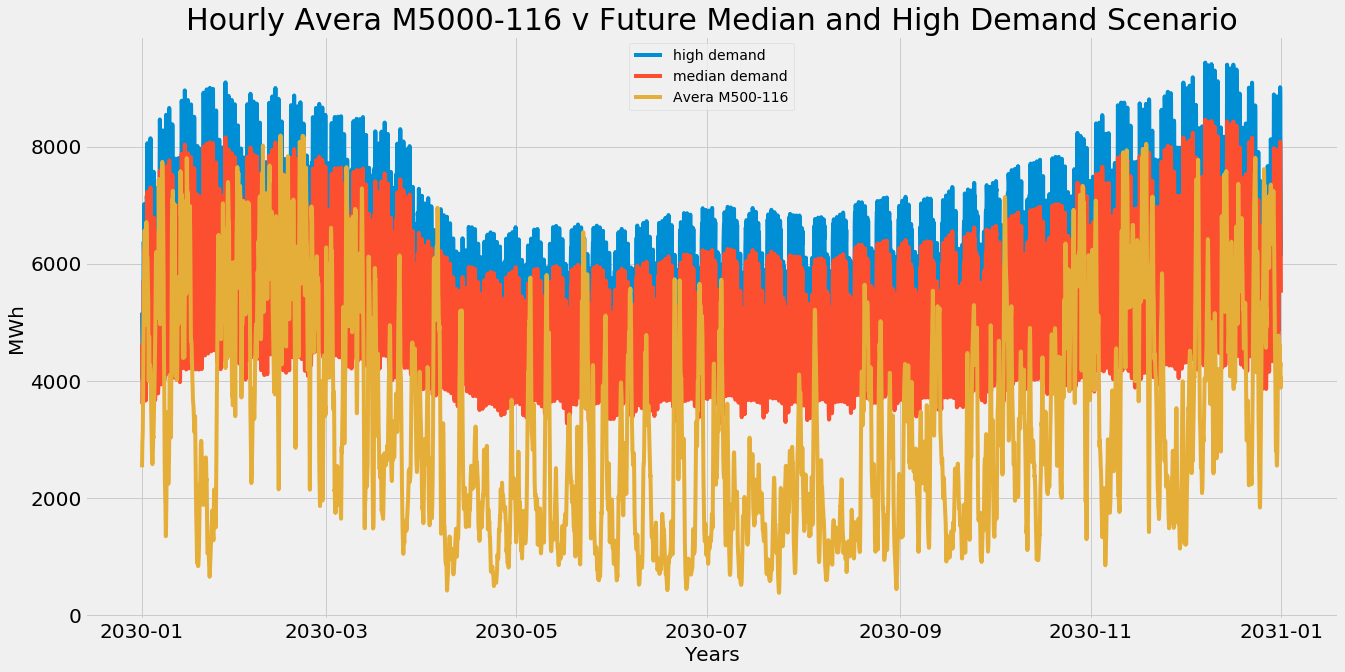

In [35]:
plt.figure(figsize=(20,10))
plt.plot(df_overall)
matplotlib.style.use('fivethirtyeight')
plt.title('Hourly Avera M5000-116 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','Avera M500-116'])
plt.yticks(size=20);

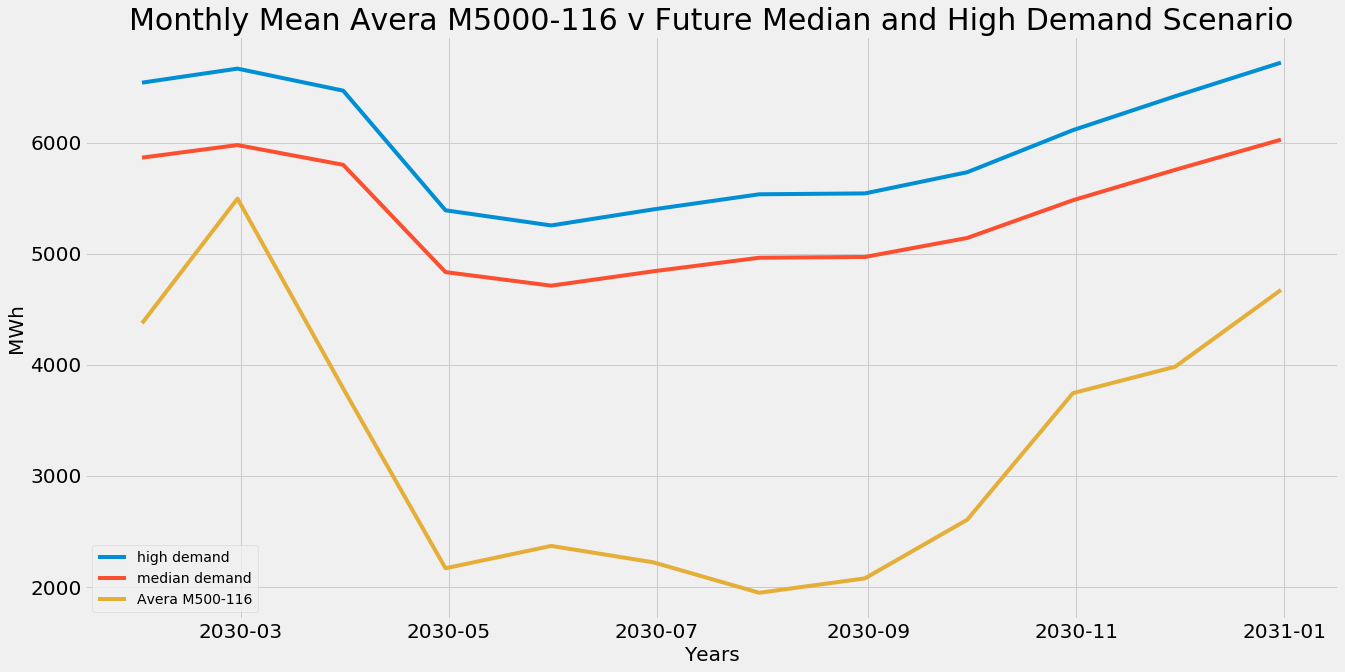

In [36]:
plt.figure(figsize=(20,10))
plt.plot(df_overall.resample('M').mean())
plt.title('Monthly Mean Avera M5000-116 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','Avera M500-116'])
plt.yticks(size=20);

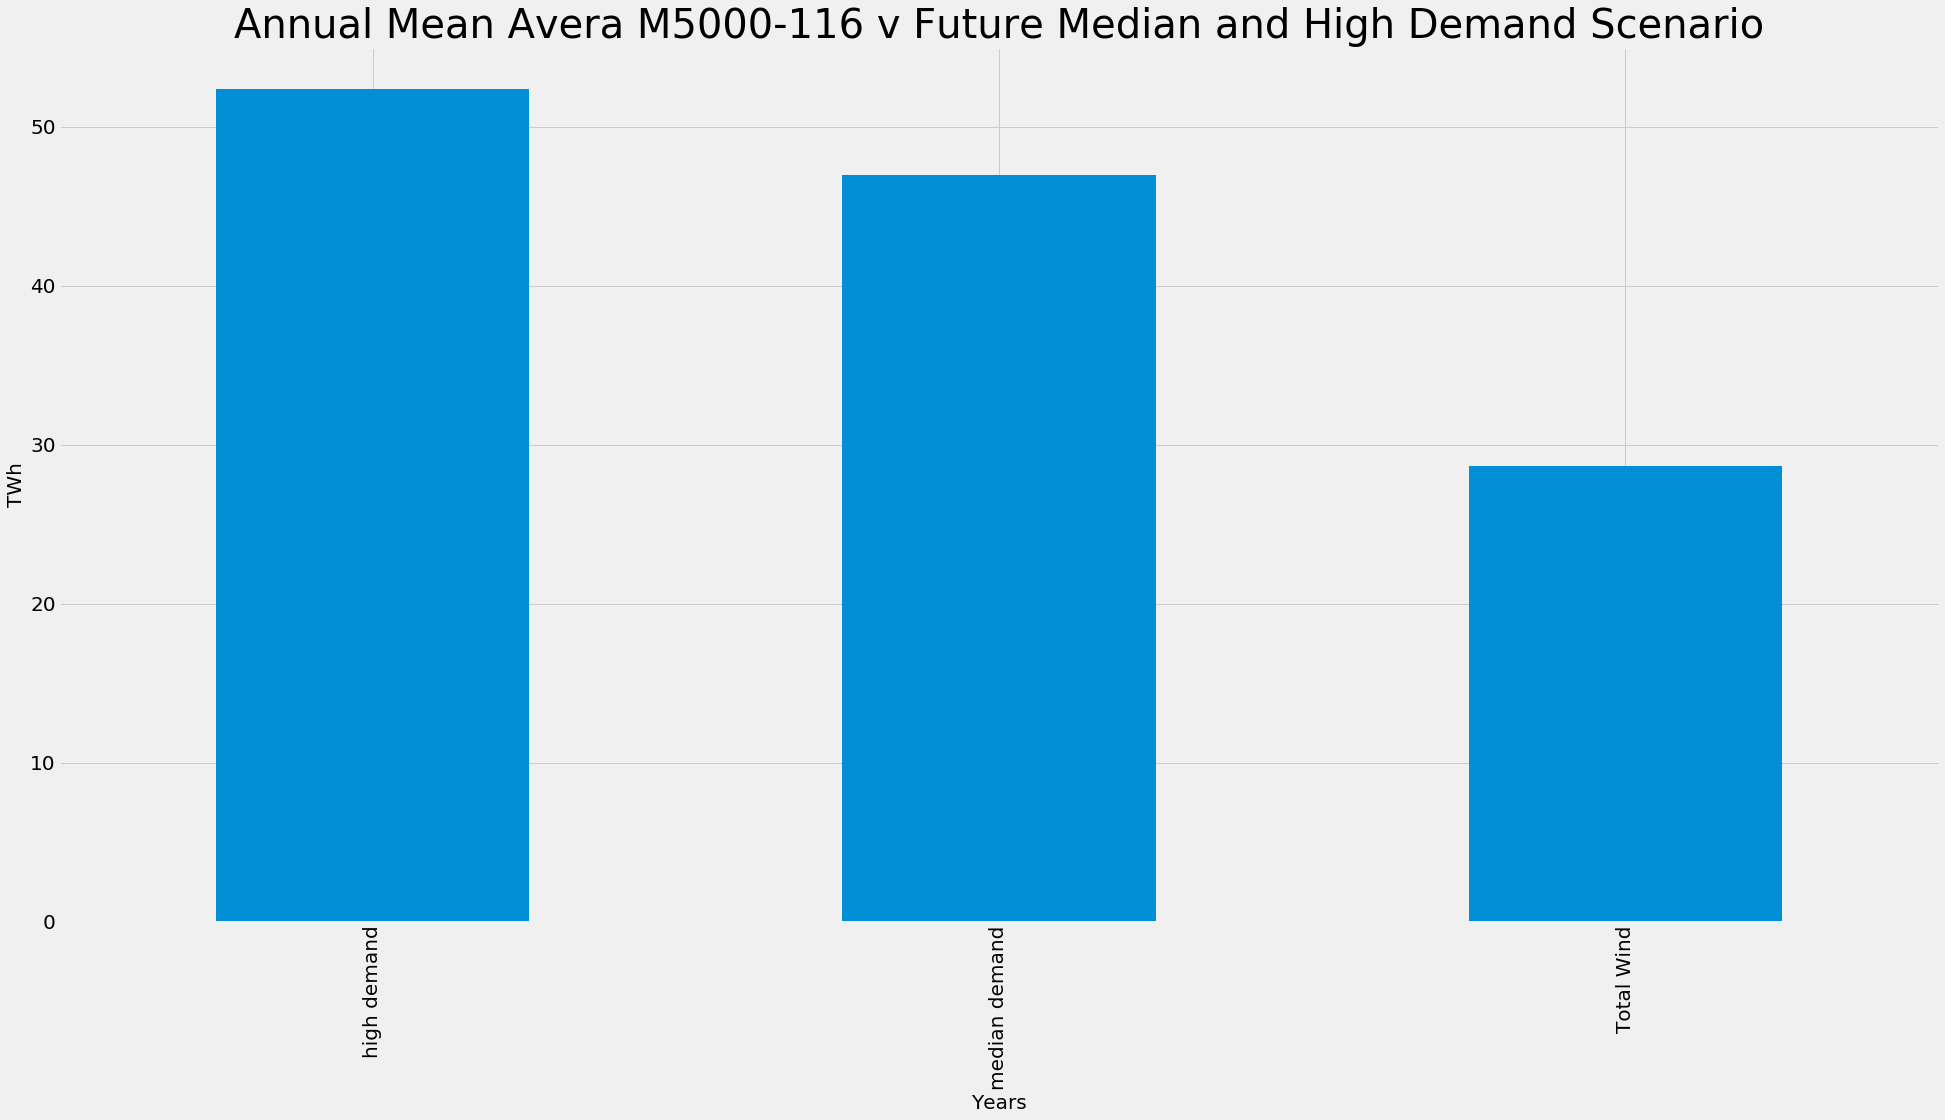

In [37]:
(df_overall.sum()/(1000000)).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Mean Avera M5000-116 v Future Median and High Demand Scenario', size =40)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('TWh',size=20)
plt.yticks(size=20);

In [38]:
(df_overall.sum()/(1000000))

high demand      52.387461
median demand    46.979098
Total Wind       28.691907
dtype: float64

In [39]:
df_wp = pd.DataFrame(df_overall.index)

df_overall['WP Median Forecast'] = df_overall['Total Wind' ]/df_overall['median demand' ]
df_overall['WP High Forecast'] = df_overall['Total Wind' ]/df_overall['high demand' ]

df_wp['WP Median Forecast'] = df_overall['WP Median Forecast'].tolist()
df_wp['WP High Forecast'] = df_overall['WP High Forecast'].tolist()

df_wp = df_wp.set_index('Date')
df_wp

WP Median Forecast  WP High Forecast
Date                                                     
2030-01-01 00:00:00            0.545055          0.488785
2030-01-01 01:00:00            0.617380          0.553643
2030-01-01 02:00:00            0.720561          0.646172
2030-01-01 03:00:00            0.785729          0.704612
2030-01-01 04:00:00            0.821212          0.736432
...                                 ...               ...
2030-12-31 19:00:00            0.577573          0.517946
2030-12-31 20:00:00            0.590903          0.529899
2030-12-31 21:00:00            0.609794          0.546840
2030-12-31 22:00:00            0.643248          0.576841
2030-12-31 23:00:00            0.739902          0.663516

[8760 rows x 2 columns]

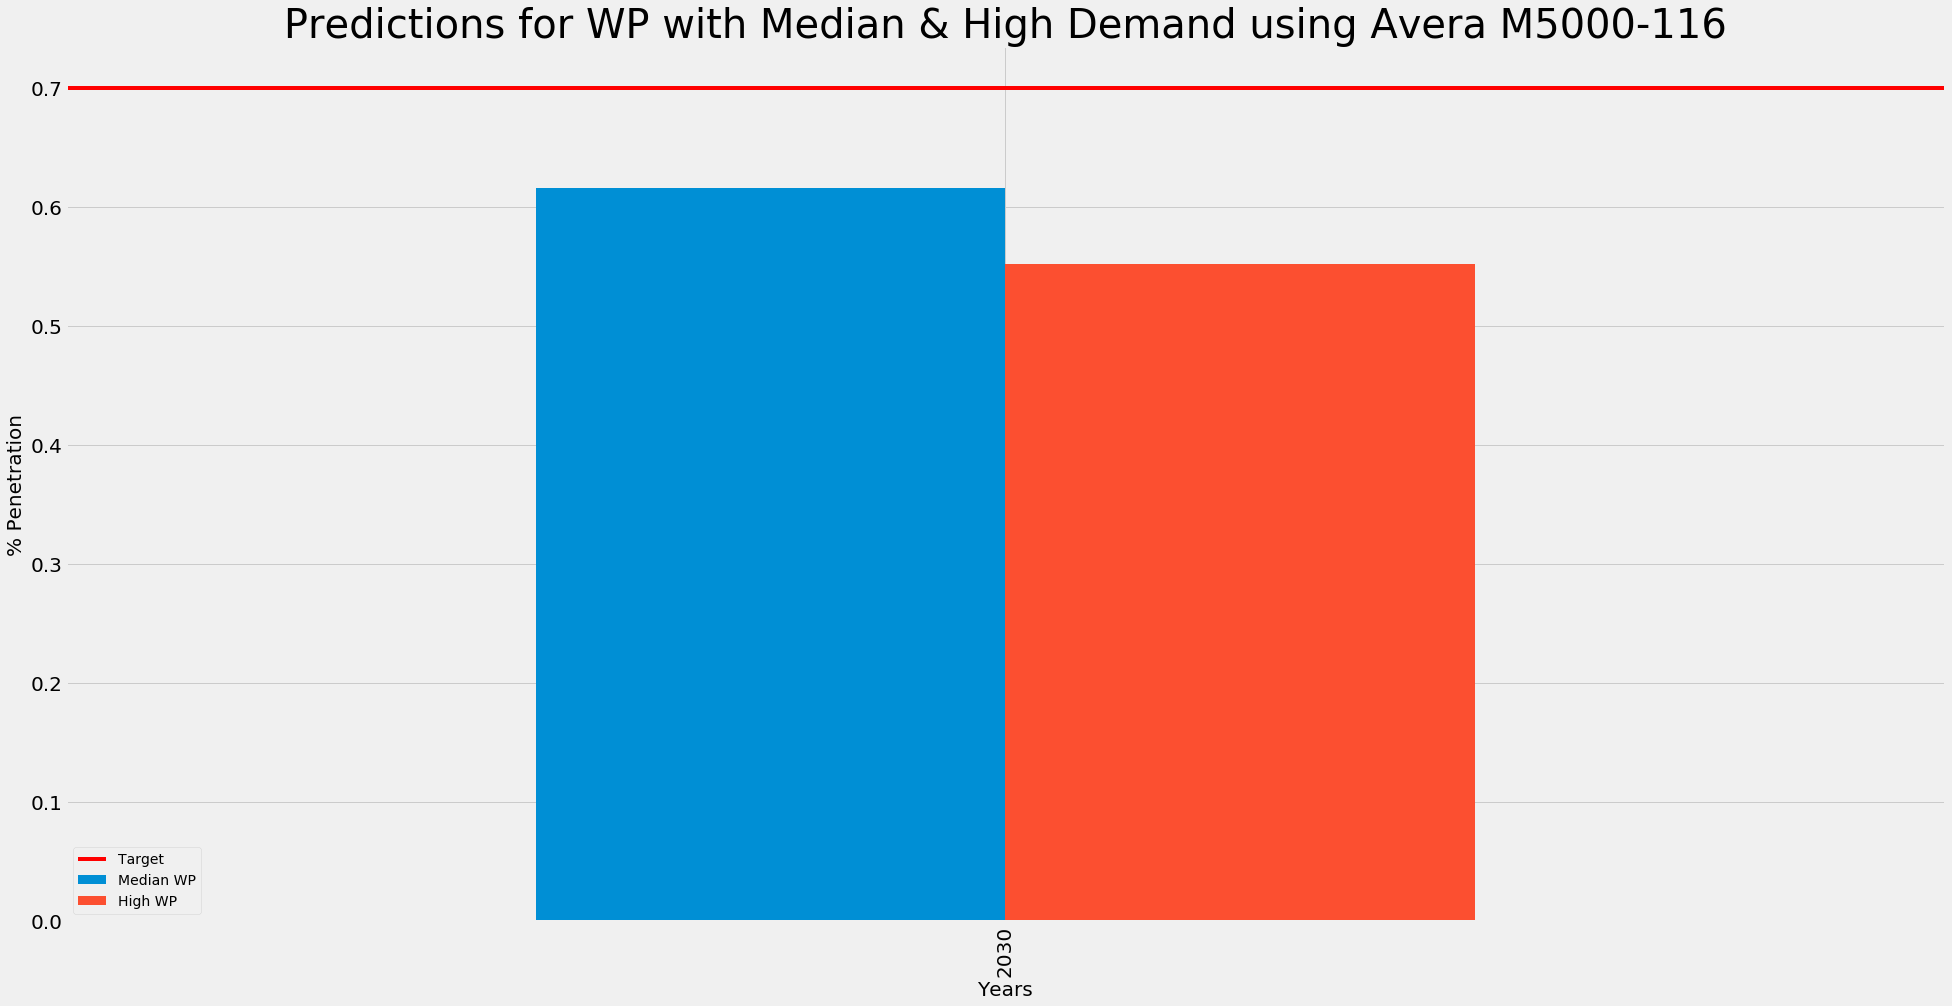

In [40]:
(df_wp.groupby(df_wp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Predictions for WP with Median & High Demand using Avera M5000-116', size =40)
plt.axhline(y=0.7, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('% Penetration',size=20)
plt.yticks(size=20);
plt.legend(labels=['Target','Median WP','High WP'])

In [41]:
df_wp.groupby(df_wp.index.year).mean()

WP Median Forecast  WP High Forecast
Date                                      
2030            0.615683          0.552121

In [42]:
df_snsp = pd.DataFrame(df_overall.index)

df_snsp['SNSP Median Forecast'] = df_analysis['SNSP Median Avera M5000-116 Forecast'].tolist()
df_snsp['SNSP High Forecast'] = df_analysis['SNSP High Avera M5000-116 Forecast'].tolist()

df_snsp = df_snsp.set_index('Date')

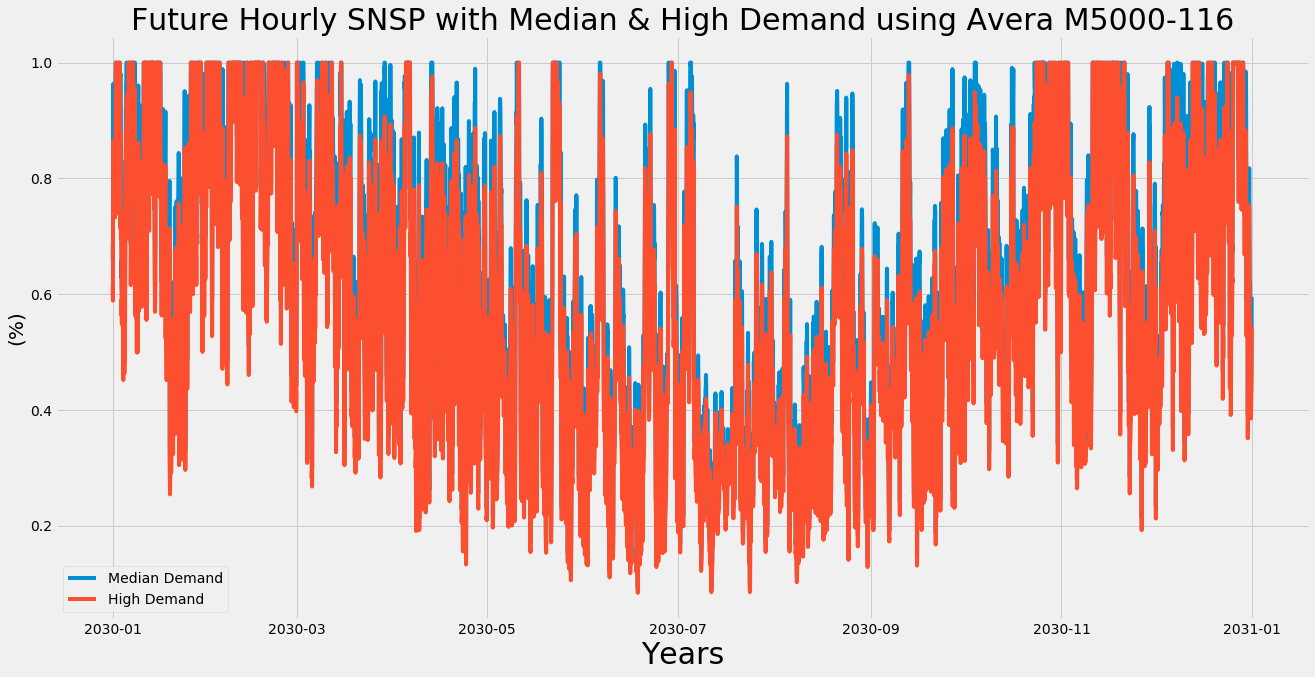

In [43]:
plt.figure(figsize=(20,10))
plt.plot(df_snsp)

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Hourly SNSP with Median & High Demand using Avera M5000-116', size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()

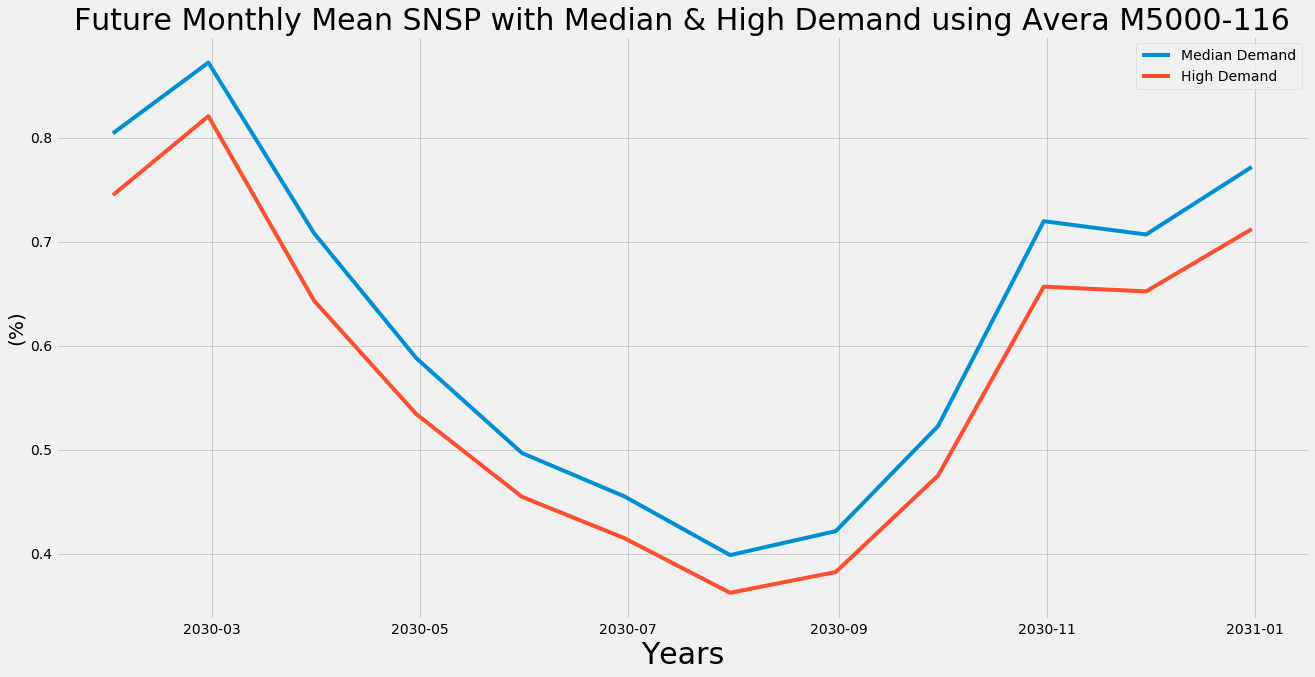

In [44]:
plt.figure(figsize=(20,10))
plt.plot(df_snsp.resample('M').mean())

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Monthly Mean SNSP with Median & High Demand using Avera M5000-116',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()

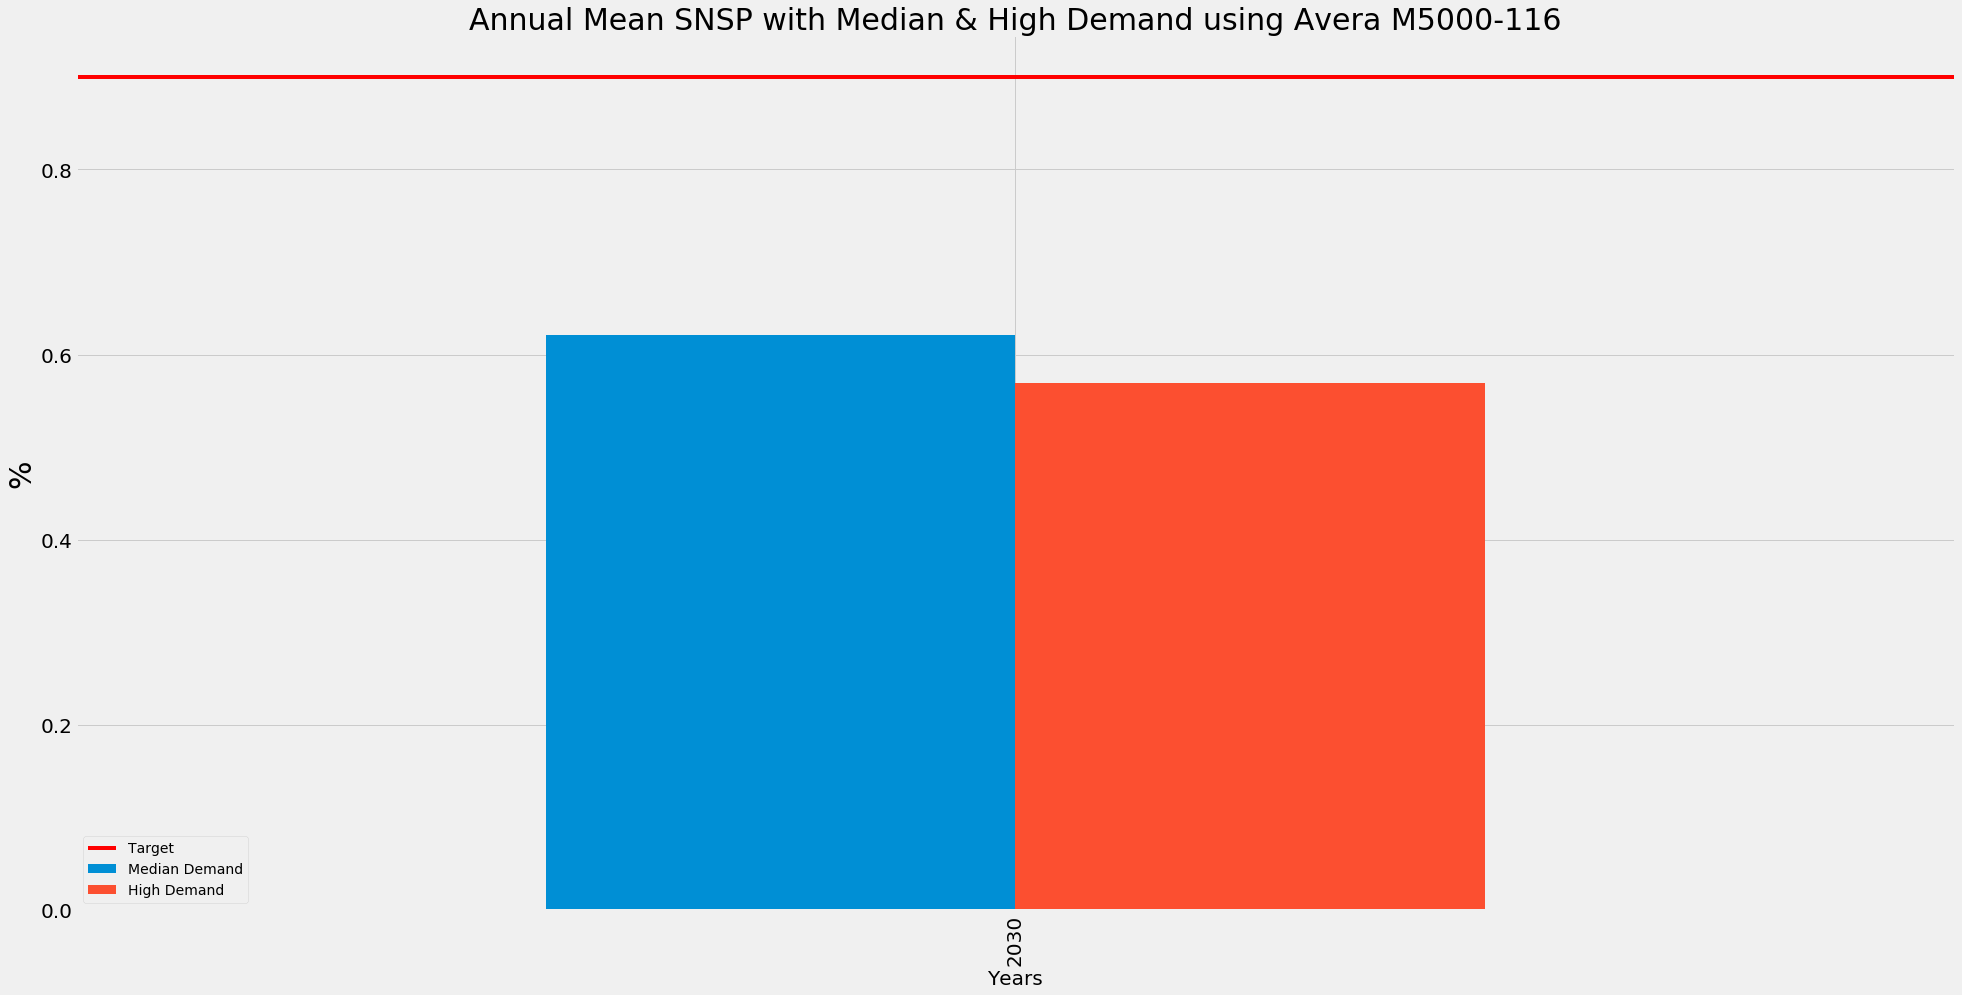

In [45]:
(df_snsp.groupby(df_snsp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Mean SNSP with Median & High Demand using Avera M5000-116', size =30)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('%',size=30)
plt.yticks(size=20);
plt.legend(labels=['Target', 'Median Demand','High Demand'])

In [46]:
(df_snsp.groupby(df_snsp.index.year).mean())

SNSP Median Forecast  SNSP High Forecast
Date                                          
2030               0.62073            0.569653

# MHI Vestas V164/8000

In [47]:
# If SNSP > 1, imports is reduced to 0
df_analysis['imports'] = np.where(df_analysis['SNSP High MHI Vestas V164 8000 Forecast'] > 1, 0, df_analysis['imports'])
df_analysis['SNSP High MHI Vestas V164 8000 Forecast'] = (df_analysis['MHI Vestas V164 8000 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])

df_analysis['imports'] = np.where(df_analysis['SNSP Median MHI Vestas V164 8000 Forecast'] > 1, 0, df_analysis['imports'])
df_analysis['SNSP Median MHI Vestas V164 8000 Forecast'] = (df_analysis['MHI Vestas V164 8000 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])


# If SNSP > 1, wind is reduced to the demand+exports - imports is reduced to 0                                                                                                         
df_analysis['MHI Vestas V164 8000'] = np.where(df_analysis['SNSP High MHI Vestas V164 8000 Forecast'] > 1,(df_analysis['high demand' ] +df_analysis['exports'])-df_analysis['imports'] - df_analysis['wind'] , df_analysis['MHI Vestas V164 8000'])
df_analysis['MHI Vestas V164 8000 Total Wind'] = df_analysis['wind'] + df_analysis['MHI Vestas V164 8000']
df_analysis['SNSP High MHI Vestas V164 8000 Forecast'] = (df_analysis['MHI Vestas V164 8000 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])



df_analysis['MHI Vestas V164 8000'] = np.where(df_analysis['SNSP Median MHI Vestas V164 8000 Forecast'] > 1,(df_analysis['median demand' ] +df_analysis['exports'])-df_analysis['imports'] - df_analysis['wind'] , df_analysis['MHI Vestas V164 8000'])
df_analysis['MHI Vestas V164 8000 Total Wind'] = df_analysis['wind'] + df_analysis['MHI Vestas V164 8000']
df_analysis['SNSP Median MHI Vestas V164 8000 Forecast'] = (df_analysis['MHI Vestas V164 8000 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])


In [48]:
df_overall = pd.DataFrame()
data = pd.date_range('1/1/2030', periods = 8760, freq ='H')
data_list = data.tolist()
df_overall['Date'] = data_list
df_overall = df_overall.set_index('Date')

df_overall['high demand'] = (df_analysis['high demand']).tolist()
df_overall['median demand'] = (df_analysis['median demand']).tolist()
df_overall['Total Wind'] = (df_analysis['MHI Vestas V164 8000 Total Wind']).tolist()

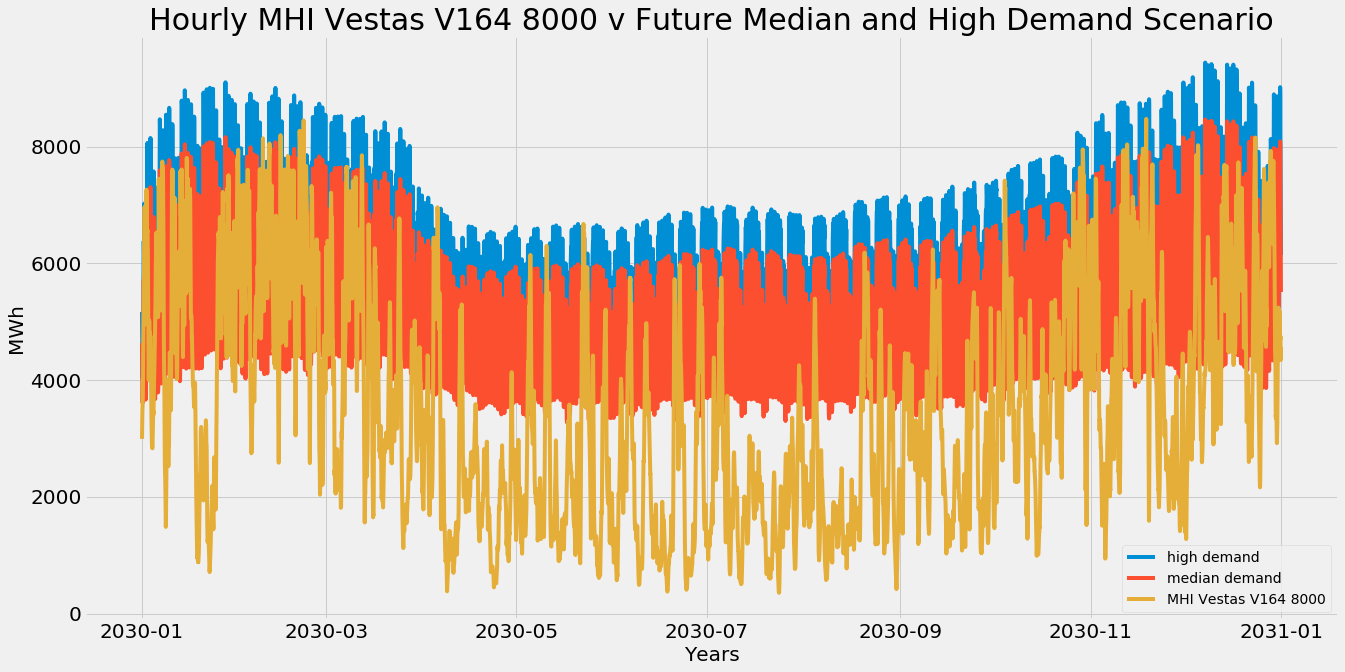

In [49]:
plt.figure(figsize=(20,10))
plt.plot(df_overall)
plt.title('Hourly MHI Vestas V164 8000 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','MHI Vestas V164 8000'])
plt.yticks(size=20);

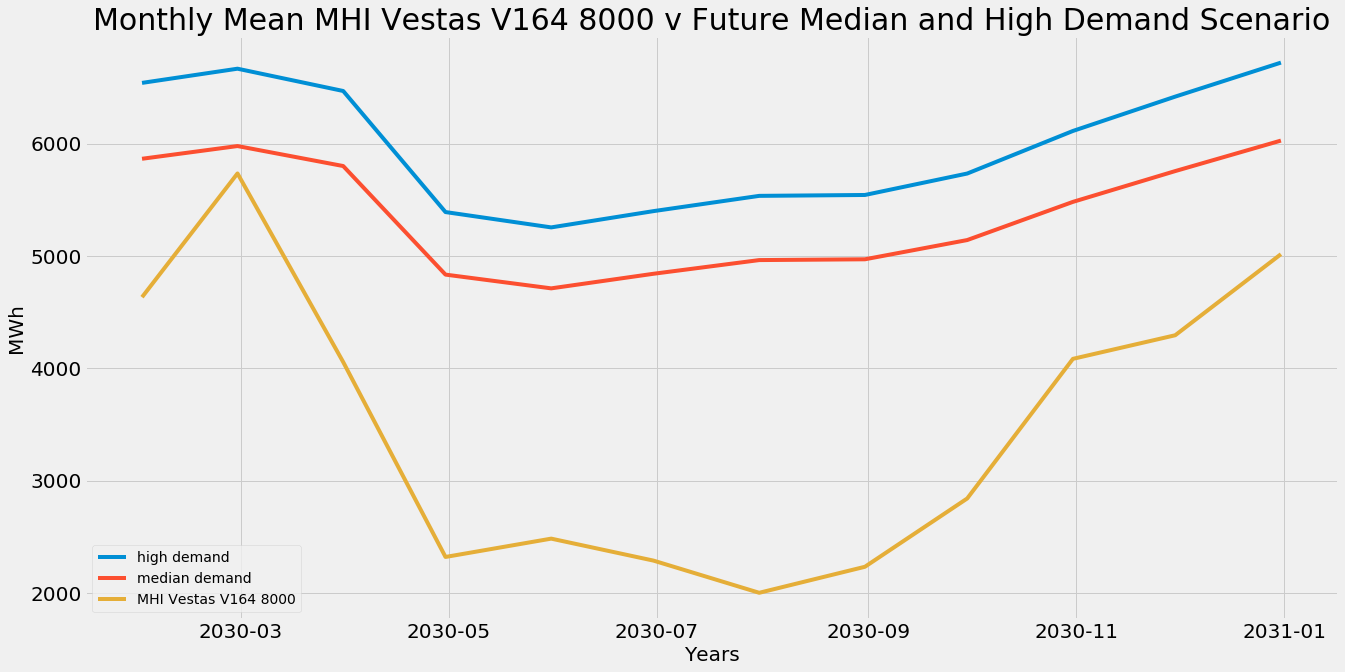

In [50]:
plt.figure(figsize=(20,10))
plt.plot(df_overall.resample('M').mean())
plt.title('Monthly Mean MHI Vestas V164 8000 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','MHI Vestas V164 8000'])
plt.yticks(size=20);

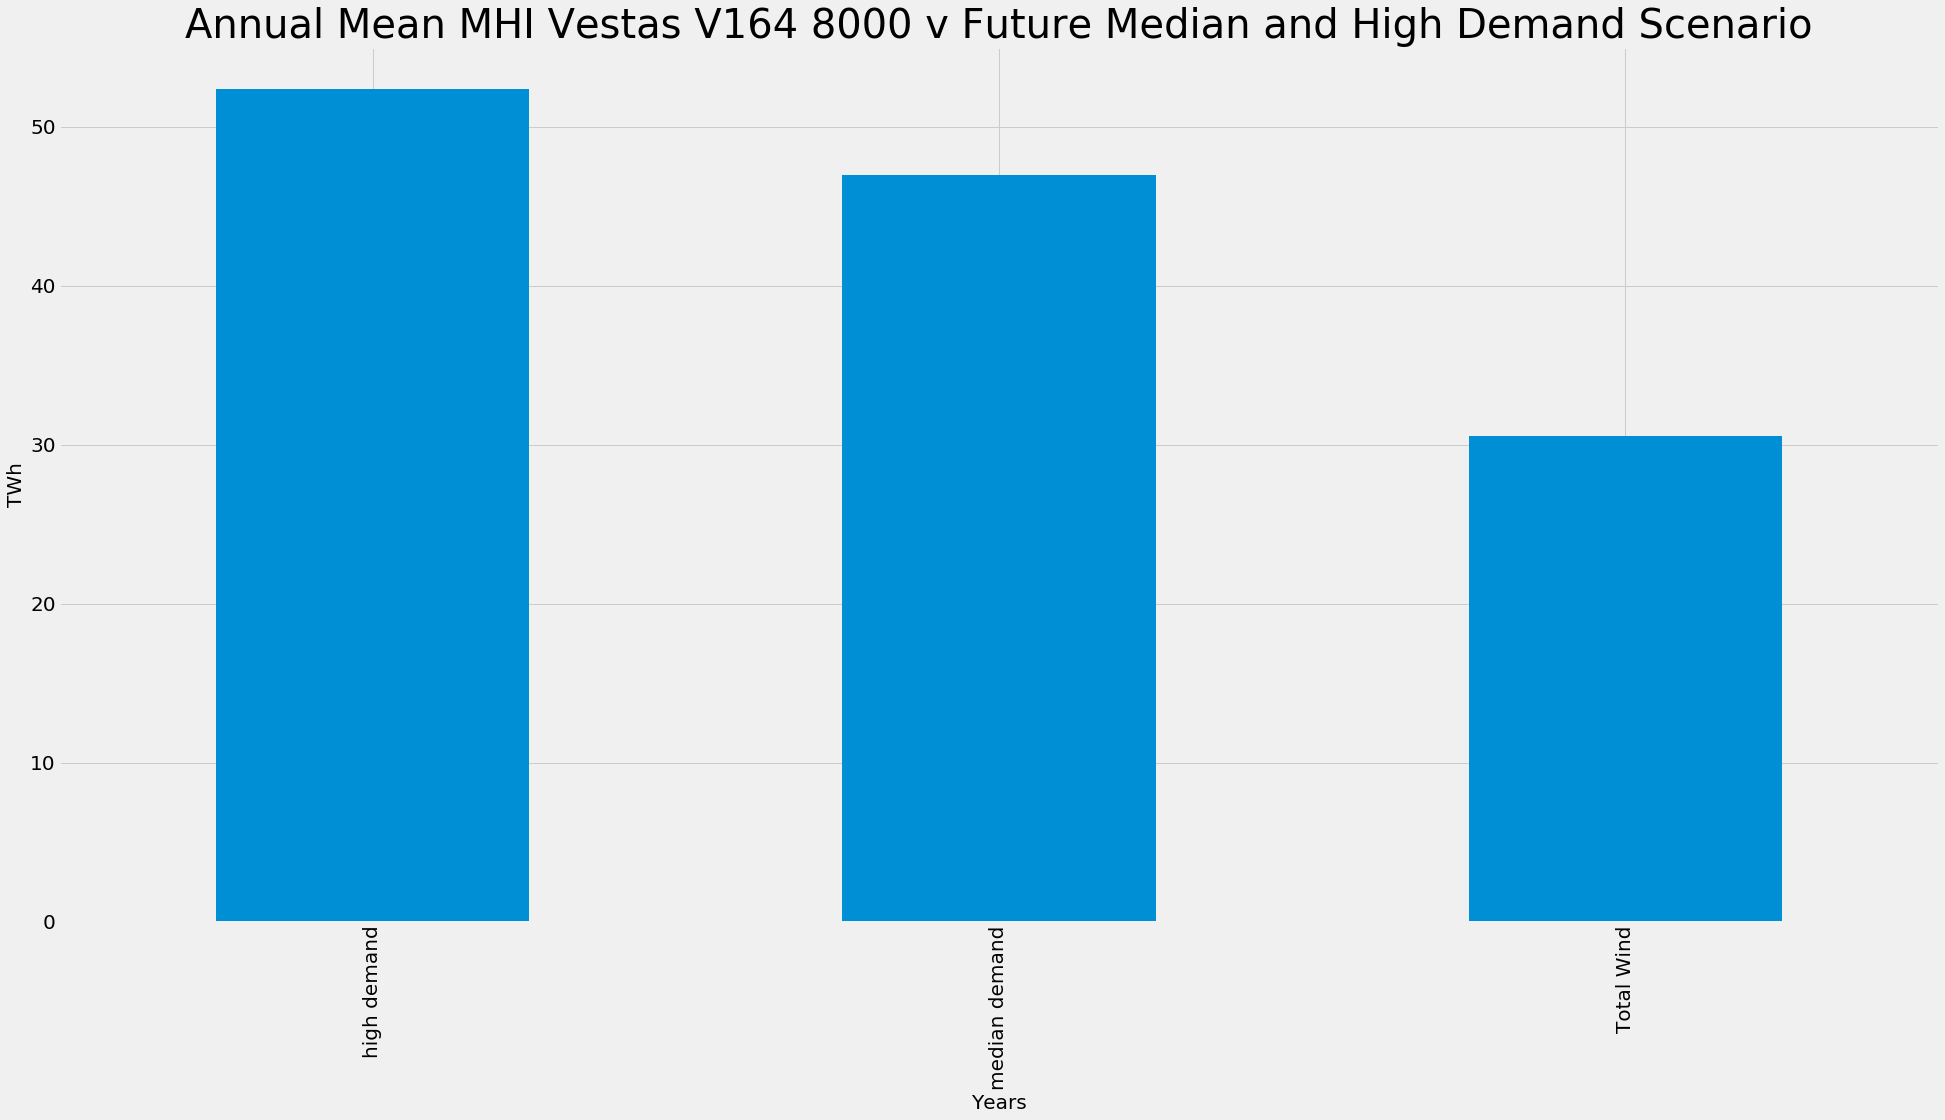

In [51]:
(df_overall.sum()/(1000000)).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Mean MHI Vestas V164 8000 v Future Median and High Demand Scenario', size =40)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('TWh',size=20)
plt.yticks(size=20);


In [52]:
(df_overall.sum()/(1000000))

high demand      52.387461
median demand    46.979098
Total Wind       30.557847
dtype: float64

In [53]:

df_wp = pd.DataFrame(df_overall.index)

df_overall['WP Median Forecast'] = df_overall['Total Wind' ]/df_overall['median demand' ]
df_overall['WP High Forecast'] = df_overall['Total Wind' ]/df_overall['high demand' ]

df_wp['WP Median Forecast'] = df_overall['WP Median Forecast'].tolist()
df_wp['WP High Forecast'] = df_overall['WP High Forecast'].tolist()

df_wp = df_wp.set_index('Date')
df_wp


WP Median Forecast  WP High Forecast
Date                                                     
2030-01-01 00:00:00            0.645902          0.579220
2030-01-01 01:00:00            0.730803          0.655356
2030-01-01 02:00:00            0.847654          0.760144
2030-01-01 03:00:00            0.919953          0.824979
2030-01-01 04:00:00            0.960483          0.861325
...                                 ...               ...
2030-12-31 19:00:00            0.636779          0.571040
2030-12-31 20:00:00            0.653609          0.586132
2030-12-31 21:00:00            0.677124          0.607219
2030-12-31 22:00:00            0.718748          0.644546
2030-12-31 23:00:00            0.827960          0.742484

[8760 rows x 2 columns]

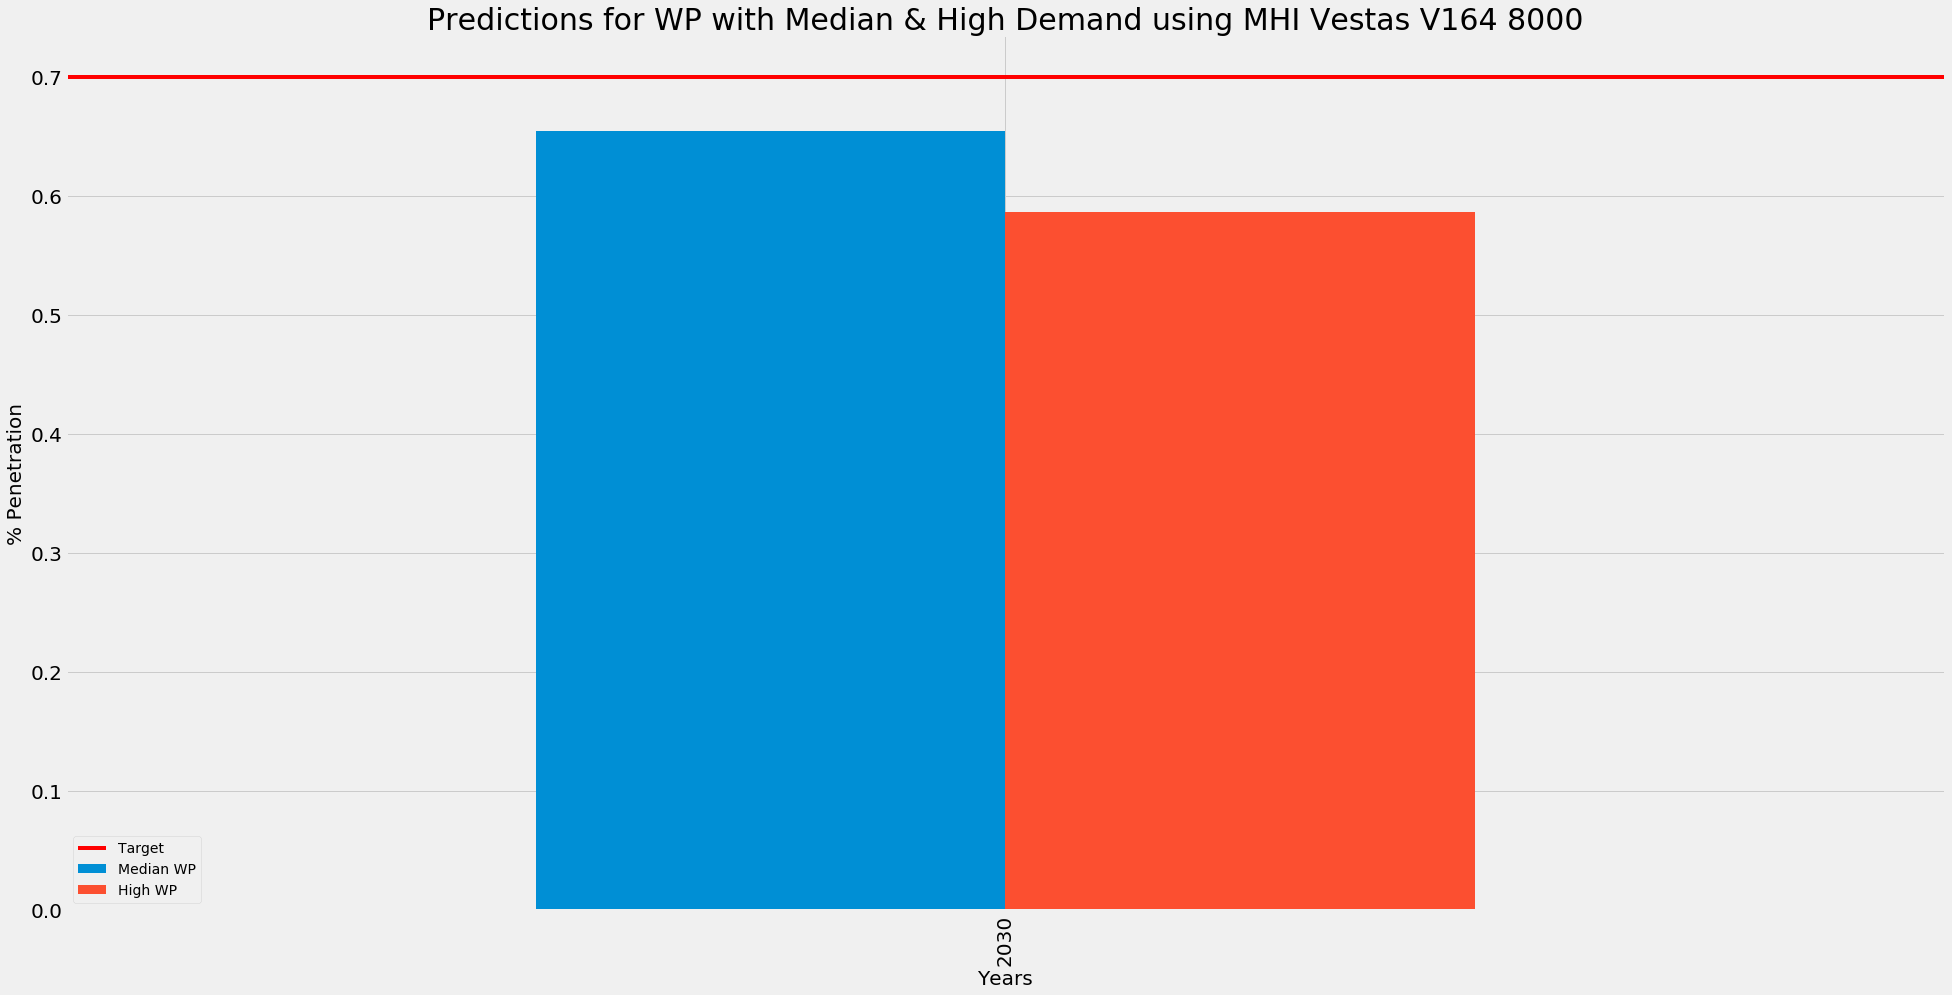

In [54]:

(df_wp.groupby(df_wp.index.year).mean()).plot(kind="bar", figsize=(30,15))
plt.title('Predictions for WP with Median & High Demand using MHI Vestas V164 8000', size =30)
plt.axhline(y=0.7, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('% Penetration',size=20)
plt.yticks(size=20);
plt.legend(labels=['Target','Median WP','High WP'])



In [55]:
df_wp.groupby(df_wp.index.year).mean()

WP Median Forecast  WP High Forecast
Date                                      
2030            0.654183          0.586646

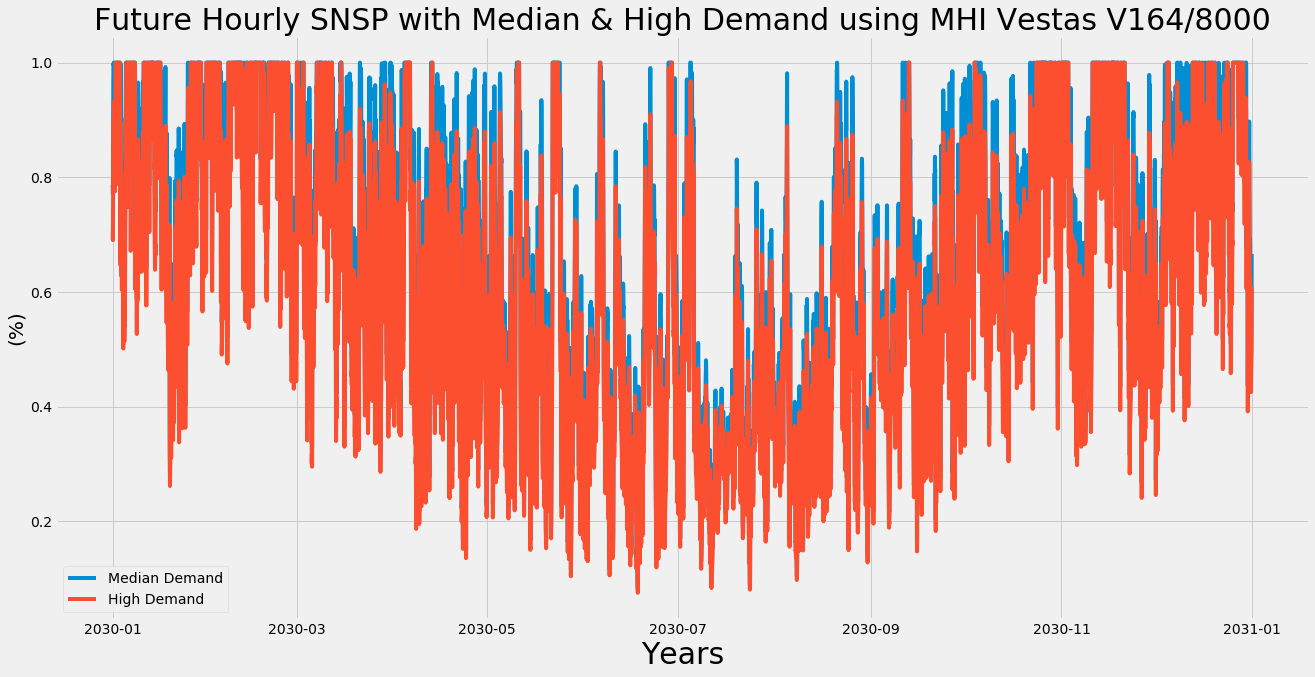

In [56]:
df_snsp = pd.DataFrame(df_overall.index)

df_snsp['SNSP Median Forecast'] = df_analysis['SNSP Median MHI Vestas V164 8000 Forecast'].tolist()
df_snsp['SNSP High Forecast'] = df_analysis['SNSP High MHI Vestas V164 8000 Forecast'].tolist()

df_snsp = df_snsp.set_index('Date')



plt.figure(figsize=(20,10))
plt.plot(df_snsp)

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Hourly SNSP with Median & High Demand using MHI Vestas V164/8000',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()



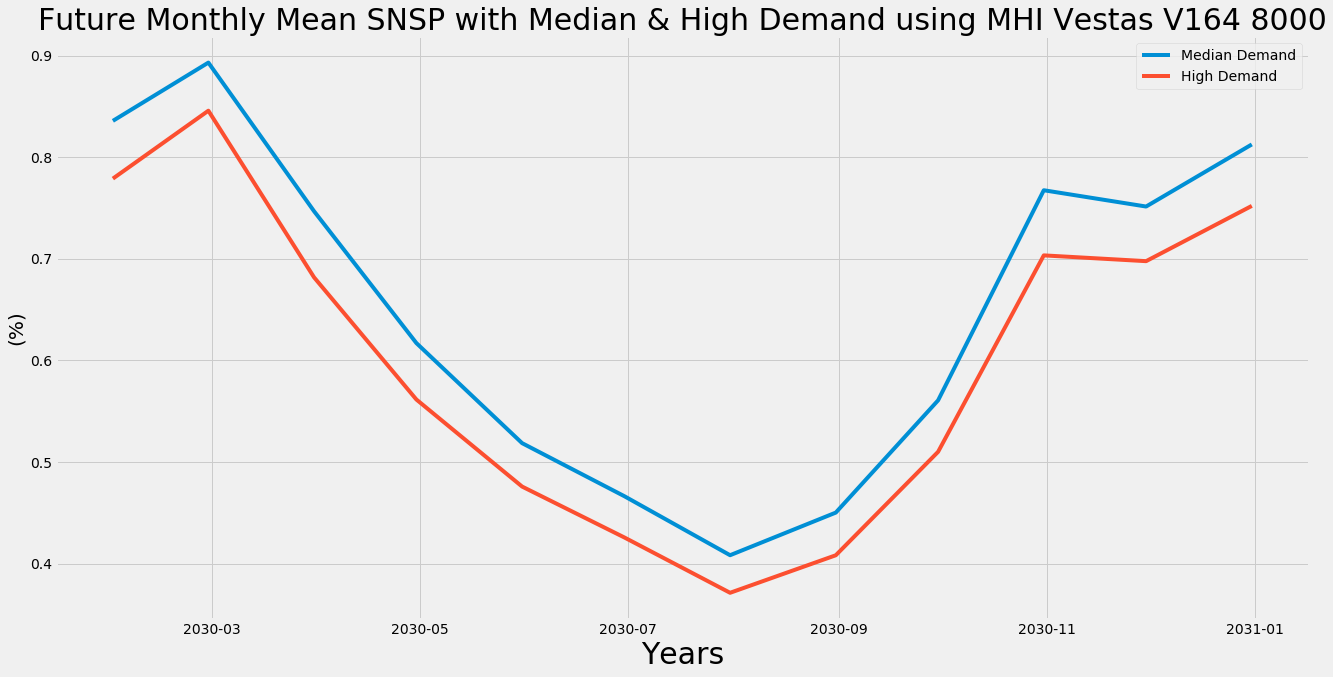

In [57]:
plt.figure(figsize=(20,10))
plt.plot(df_snsp.resample('M').mean())

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Monthly Mean SNSP with Median & High Demand using MHI Vestas V164 8000',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()


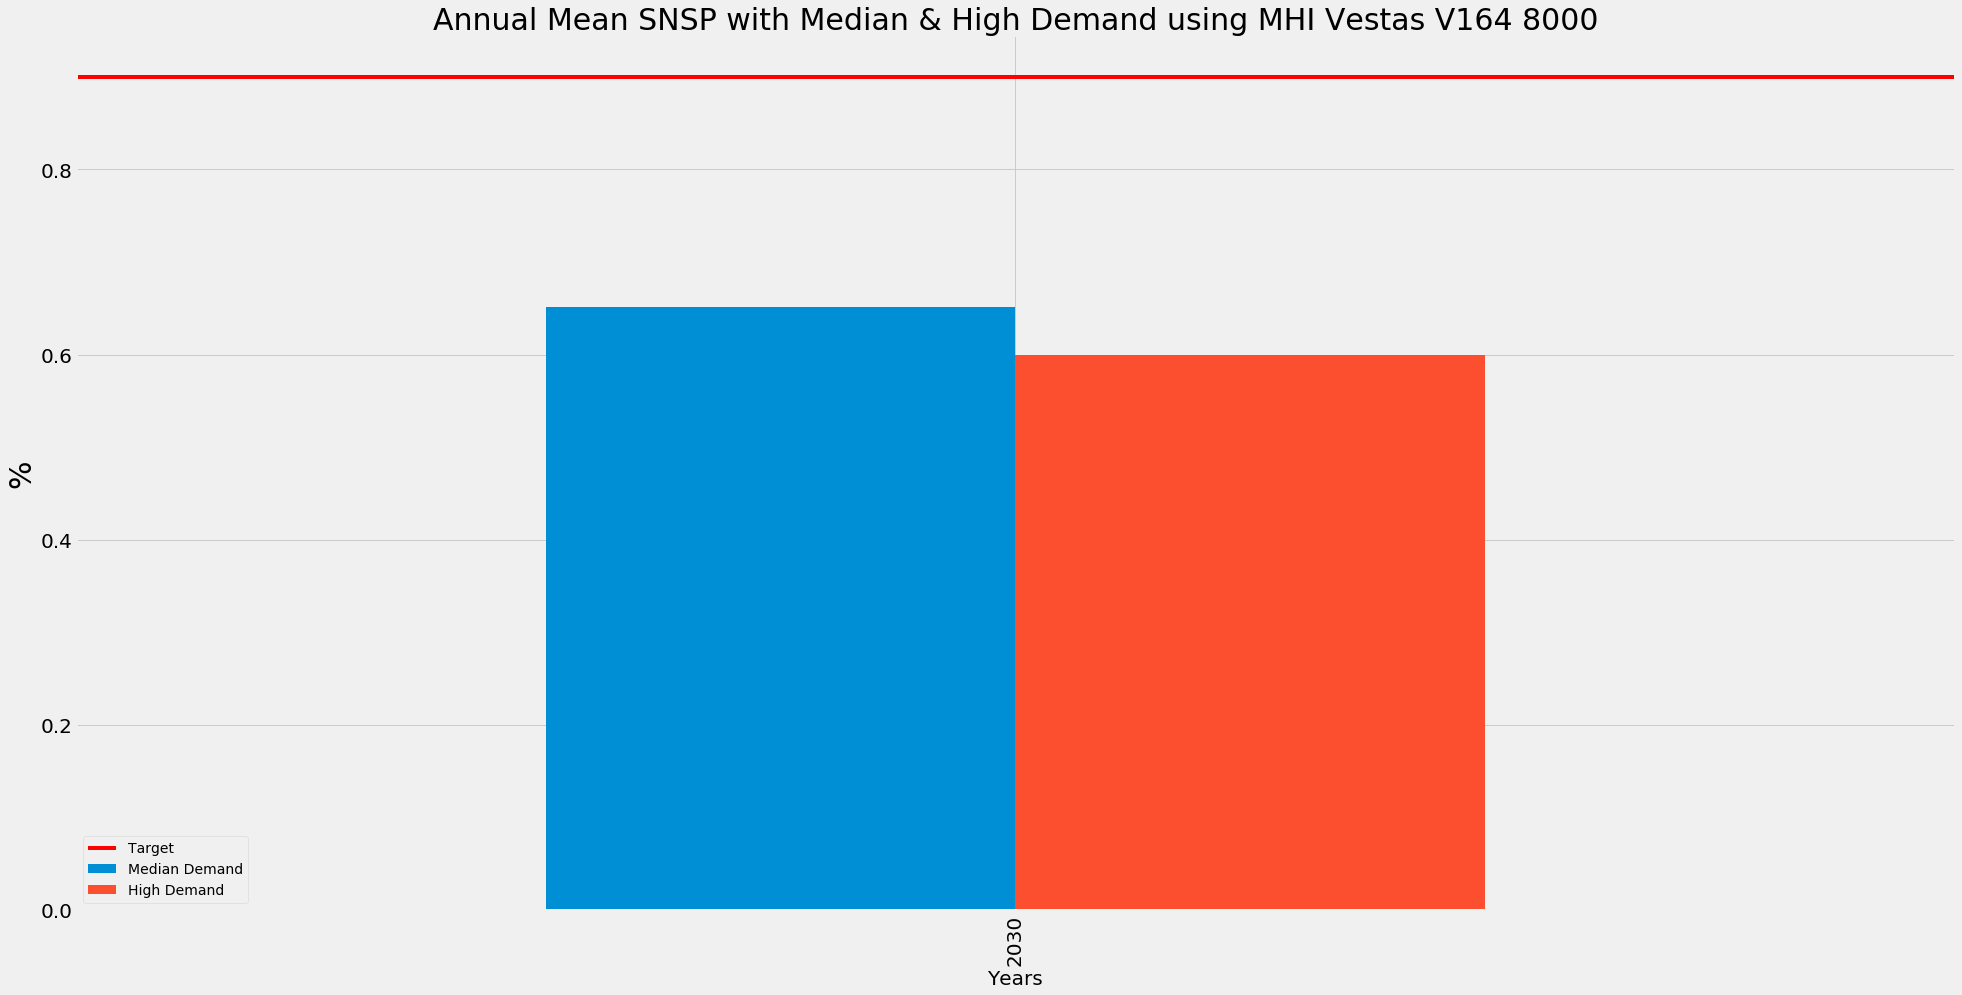

In [58]:
(df_snsp.groupby(df_snsp.index.year).mean()).plot(kind="bar", figsize=(30,15))
plt.title('Annual Mean SNSP with Median & High Demand using MHI Vestas V164 8000', size =30)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('%',size=30)
plt.yticks(size=20);
plt.legend(labels=['Target', 'Median Demand','High Demand'])

In [59]:
(df_snsp.groupby(df_snsp.index.year).mean())

SNSP Median Forecast  SNSP High Forecast
Date                                          
2030              0.650956            0.599565

# MHI Vestas V164/9500

In [60]:
# If SNSP > 1, imports is reduced to 0
df_analysis['imports'] = np.where(df_analysis['SNSP High MHI Vestas V164 9500 Forecast'] > 1, 0, df_analysis['imports'])
df_analysis['SNSP High MHI Vestas V164 9500 Forecast'] = (df_analysis['MHI Vestas V164 9500 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])

df_analysis['imports'] = np.where(df_analysis['SNSP Median MHI Vestas V164 9500 Forecast'] > 1, 0, df_analysis['imports'])
df_analysis['SNSP Median MHI Vestas V164 9500 Forecast'] = (df_analysis['MHI Vestas V164 9500 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])


# If SNSP > 1, wind is reduced to the demand+exports - imports is reduced to 0                                                                                                         
df_analysis['MHI Vestas V164 9500'] = np.where(df_analysis['SNSP High MHI Vestas V164 9500 Forecast'] > 1,(df_analysis['high demand' ] +df_analysis['exports'])-df_analysis['imports'] - df_analysis['wind'] , df_analysis['MHI Vestas V164 9500'])
df_analysis['MHI Vestas V164 9500 Total Wind'] = df_analysis['wind'] + df_analysis['MHI Vestas V164 9500']
df_analysis['SNSP High MHI Vestas V164 9500 Forecast'] = (df_analysis['MHI Vestas V164 9500 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])


df_analysis['MHI Vestas V164 9500'] = np.where(df_analysis['SNSP Median MHI Vestas V164 9500 Forecast'] > 1,(df_analysis['median demand' ] +df_analysis['exports'])-df_analysis['imports'] - df_analysis['wind'] , df_analysis['MHI Vestas V164 9500'])
df_analysis['MHI Vestas V164 9500 Total Wind'] = df_analysis['wind'] + df_analysis['MHI Vestas V164 9500']
df_analysis['SNSP Median MHI Vestas V164 9500 Forecast'] = (df_analysis['MHI Vestas V164 9500 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])


In [61]:
df_overall = pd.DataFrame()
data = pd.date_range('1/1/2030', periods = 8760, freq ='H')
data_list = data.tolist()
df_overall['Date'] = data_list
df_overall = df_overall.set_index('Date')

df_overall['high demand'] = (df_analysis['high demand']).tolist()
df_overall['median demand'] = (df_analysis['median demand']).tolist()
df_overall['Total Wind'] = (df_analysis['MHI Vestas V164 9500 Total Wind']).tolist()

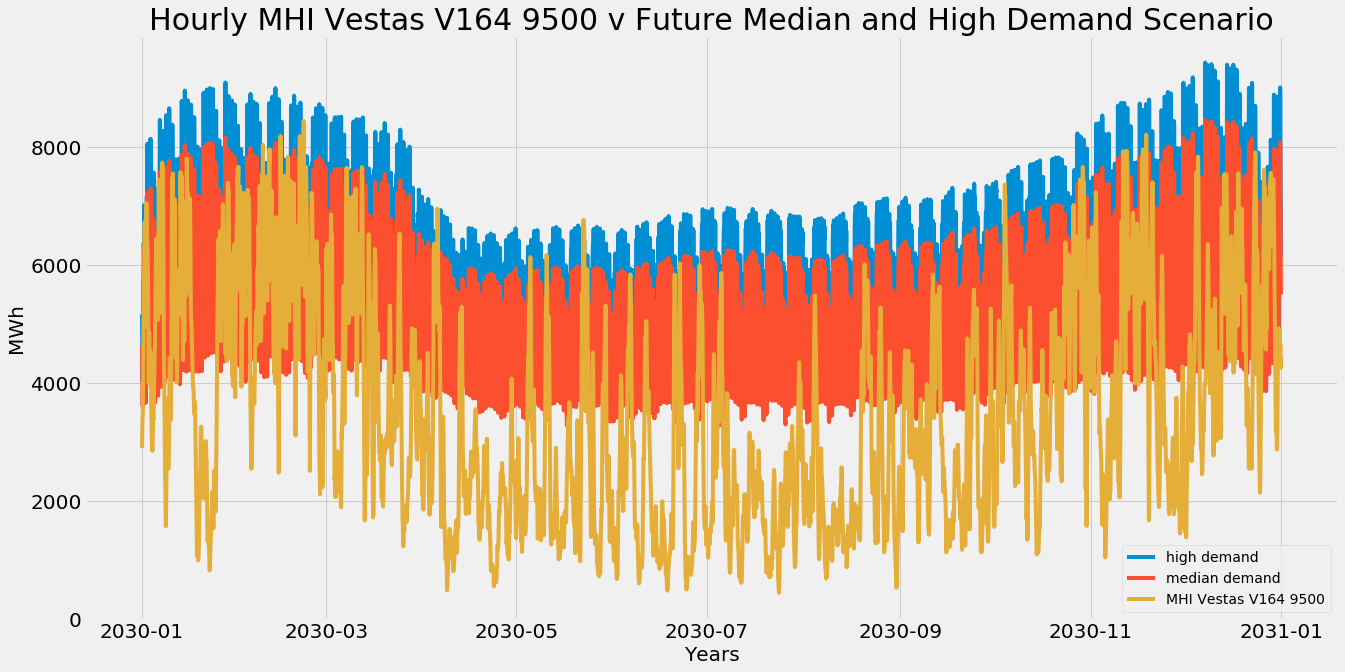

In [62]:
plt.figure(figsize=(20,10))
plt.plot(df_overall)
plt.title('Hourly MHI Vestas V164 9500 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','MHI Vestas V164 9500'])
plt.yticks(size=20);

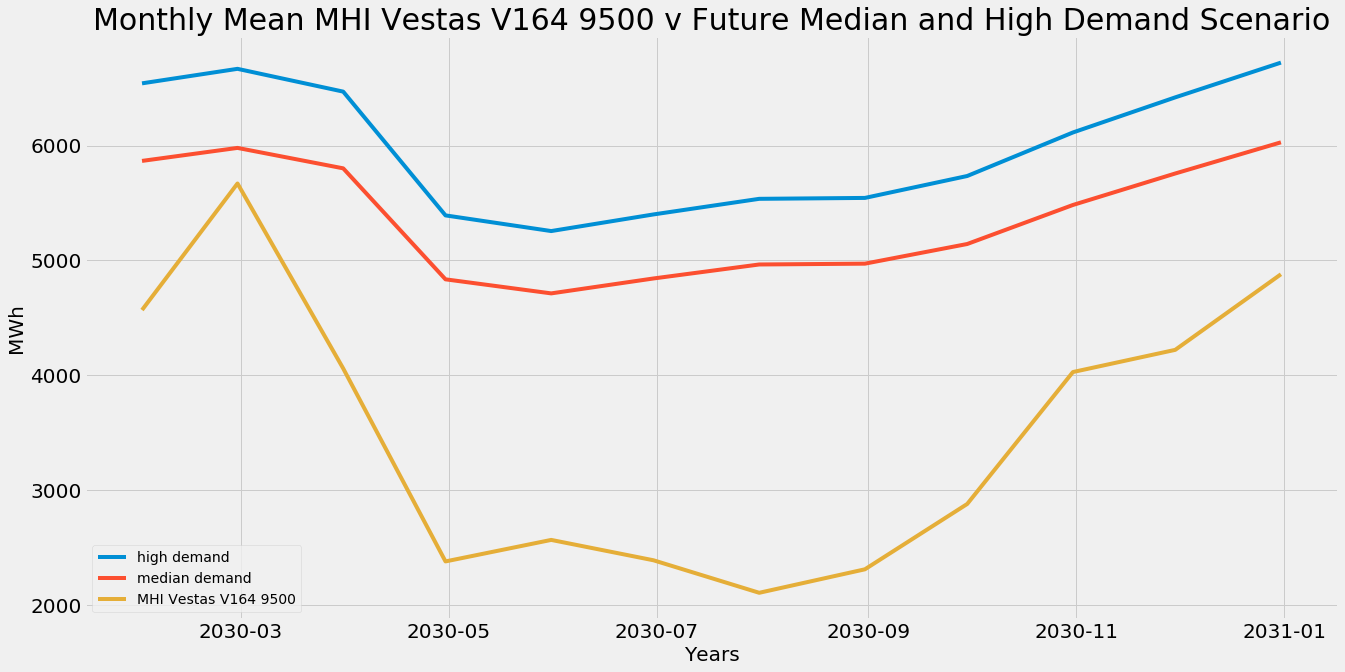

In [63]:
plt.figure(figsize=(20,10))
plt.plot(df_overall.resample('M').mean())
plt.title('Monthly Mean MHI Vestas V164 9500 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','MHI Vestas V164 9500'])
plt.yticks(size=20);

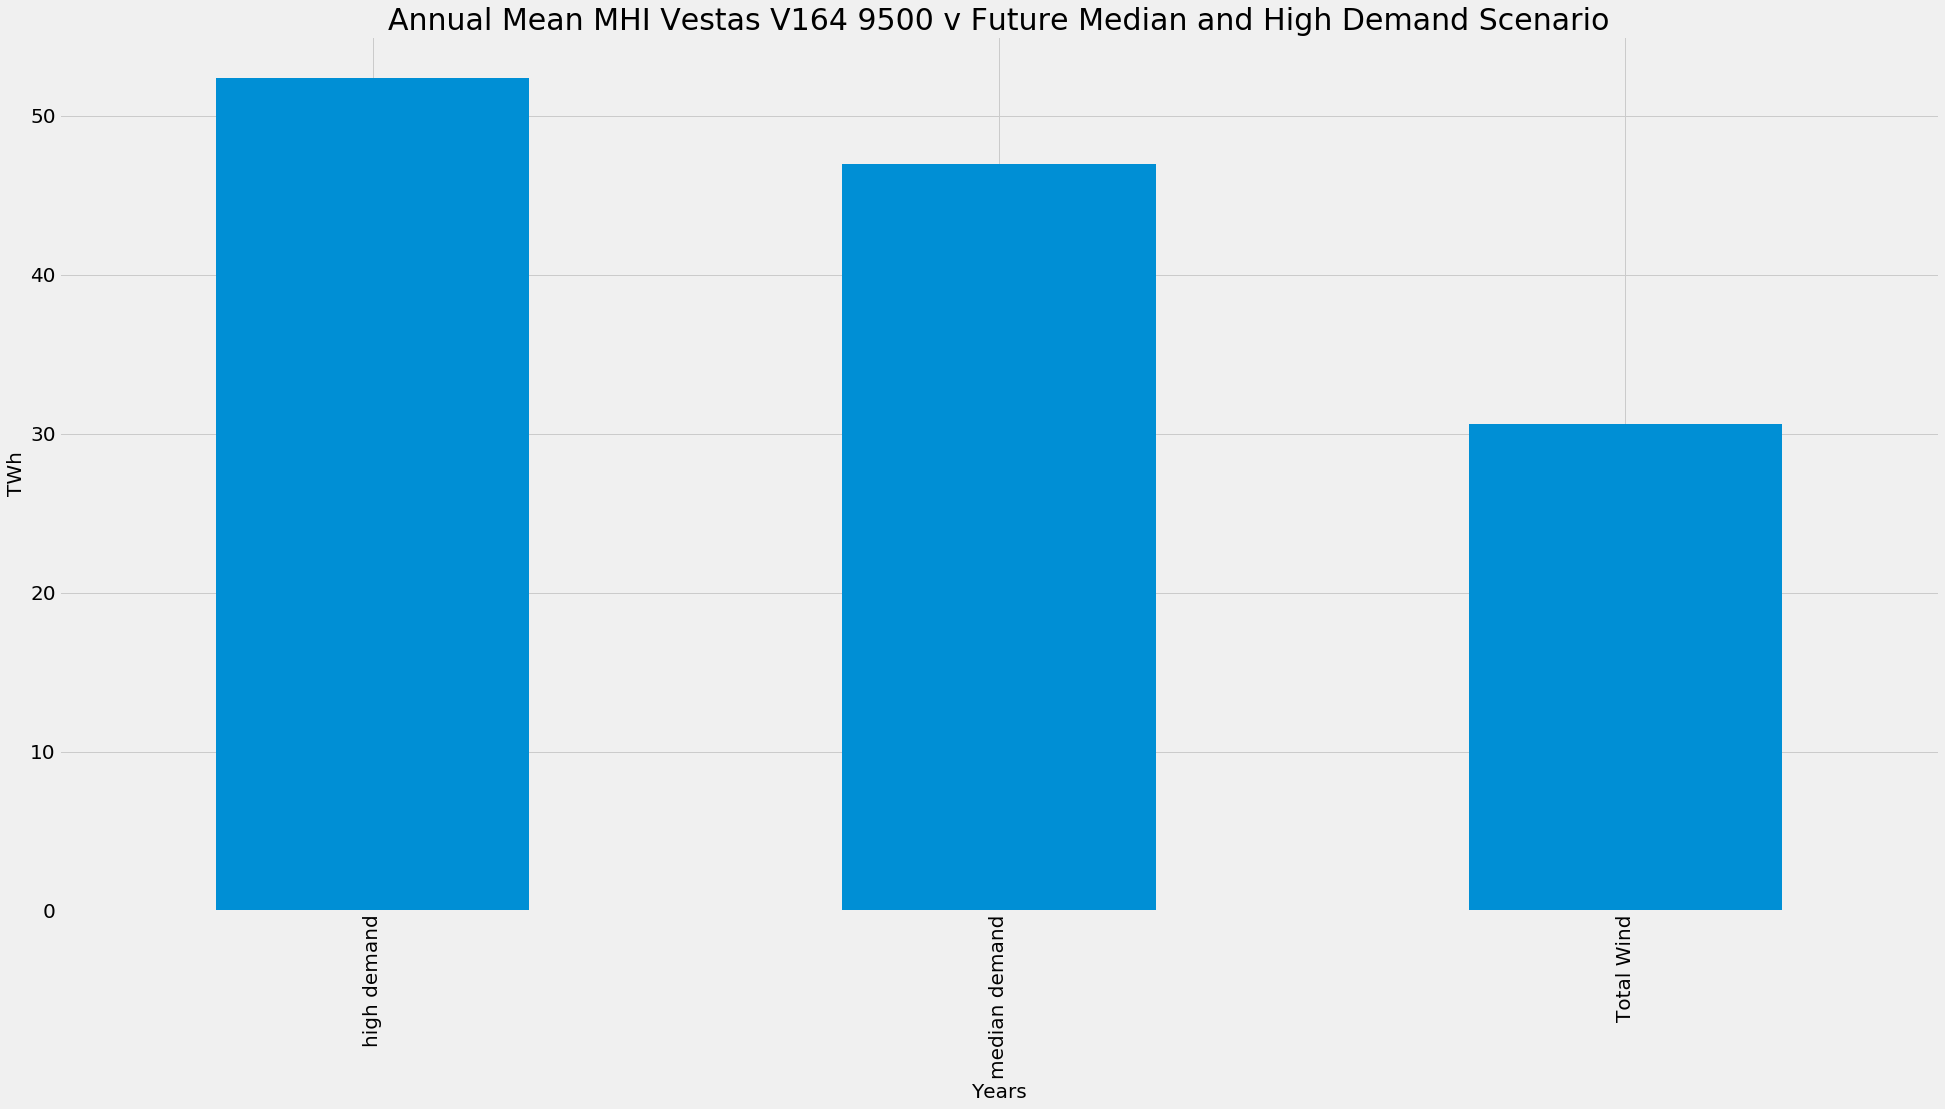

In [64]:
(df_overall.sum()/(1000000)).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Mean MHI Vestas V164 9500 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('TWh',size=20)
plt.yticks(size=20);


In [65]:
(df_overall.sum()/(1000000))

high demand      52.387461
median demand    46.979098
Total Wind       30.598980
dtype: float64

In [66]:
df_wp = pd.DataFrame(df_overall.index)

df_overall['WP Median Forecast'] = df_overall['Total Wind' ]/df_overall['median demand' ]
df_overall['WP High Forecast'] = df_overall['Total Wind' ]/df_overall['high demand' ]

df_wp['WP Median Forecast'] = df_overall['WP Median Forecast'].tolist()
df_wp['WP High Forecast'] = df_overall['WP High Forecast'].tolist()

df_wp = df_wp.set_index('Date')
df_wp




WP Median Forecast  WP High Forecast
Date                                                     
2030-01-01 00:00:00            0.625822          0.561214
2030-01-01 01:00:00            0.703860          0.631195
2030-01-01 02:00:00            0.812703          0.728801
2030-01-01 03:00:00            0.882010          0.790954
2030-01-01 04:00:00            0.919176          0.824282
...                                 ...               ...
2030-12-31 19:00:00            0.623316          0.558966
2030-12-31 20:00:00            0.641546          0.575314
2030-12-31 21:00:00            0.665187          0.596515
2030-12-31 22:00:00            0.705158          0.632359
2030-12-31 23:00:00            0.808384          0.724928

[8760 rows x 2 columns]

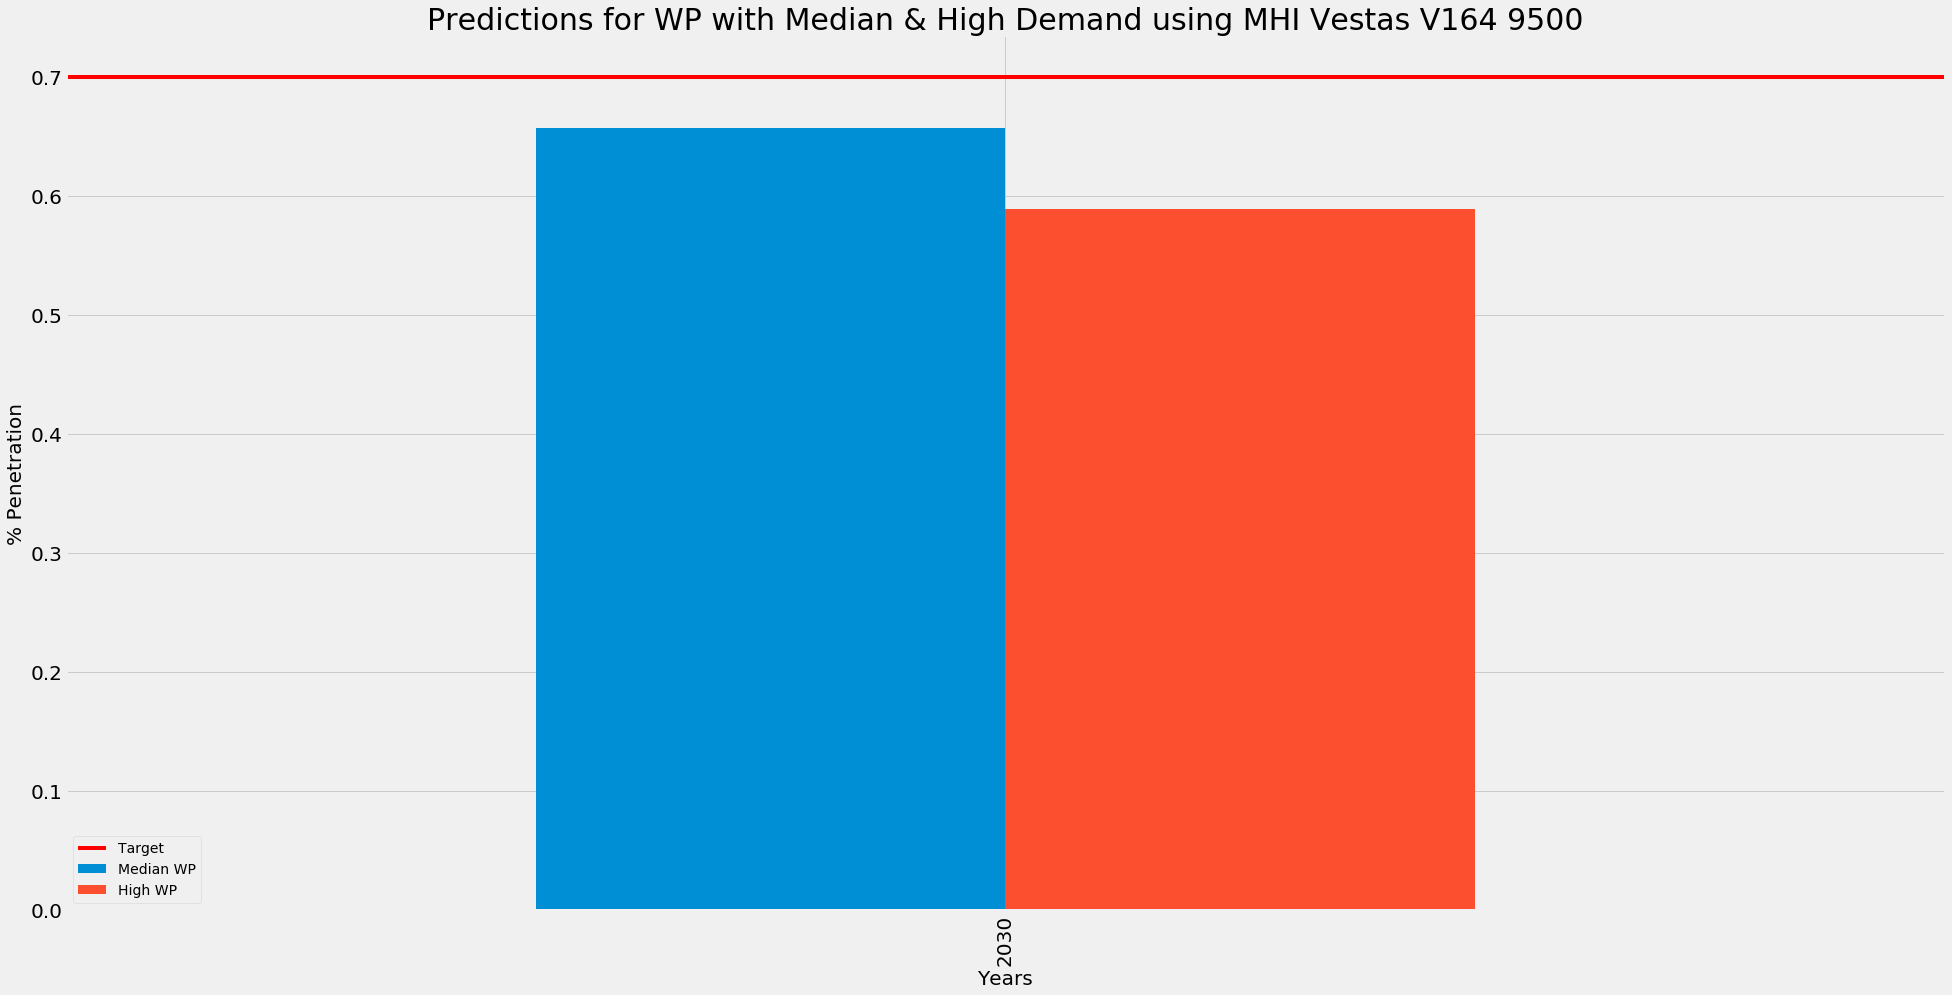

In [67]:
(df_wp.groupby(df_wp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Predictions for WP with Median & High Demand using MHI Vestas V164 9500', size =30)
plt.axhline(y=0.7, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('% Penetration',size=20)
plt.yticks(size=20);
plt.legend(labels=['Target','Median WP','High WP'])



In [68]:
df_wp.groupby(df_wp.index.year).mean()

WP Median Forecast  WP High Forecast
Date                                      
2030             0.65686          0.589048

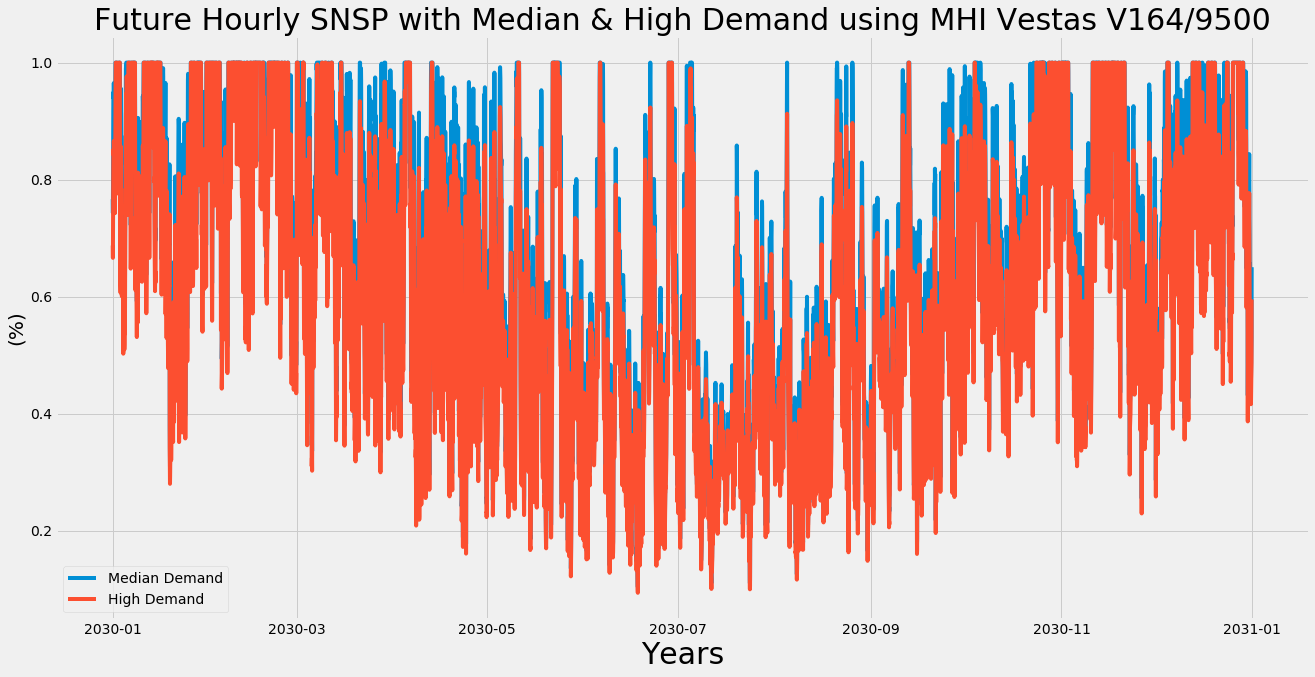

In [69]:
df_snsp = pd.DataFrame(df_overall.index)

df_snsp['SNSP Median Forecast'] = df_analysis['SNSP Median MHI Vestas V164 9500 Forecast'].tolist()
df_snsp['SNSP High Forecast'] = df_analysis['SNSP High MHI Vestas V164 9500 Forecast'].tolist()

df_snsp = df_snsp.set_index('Date')



plt.figure(figsize=(20,10))
plt.plot(df_snsp)

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Hourly SNSP with Median & High Demand using MHI Vestas V164/9500',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()


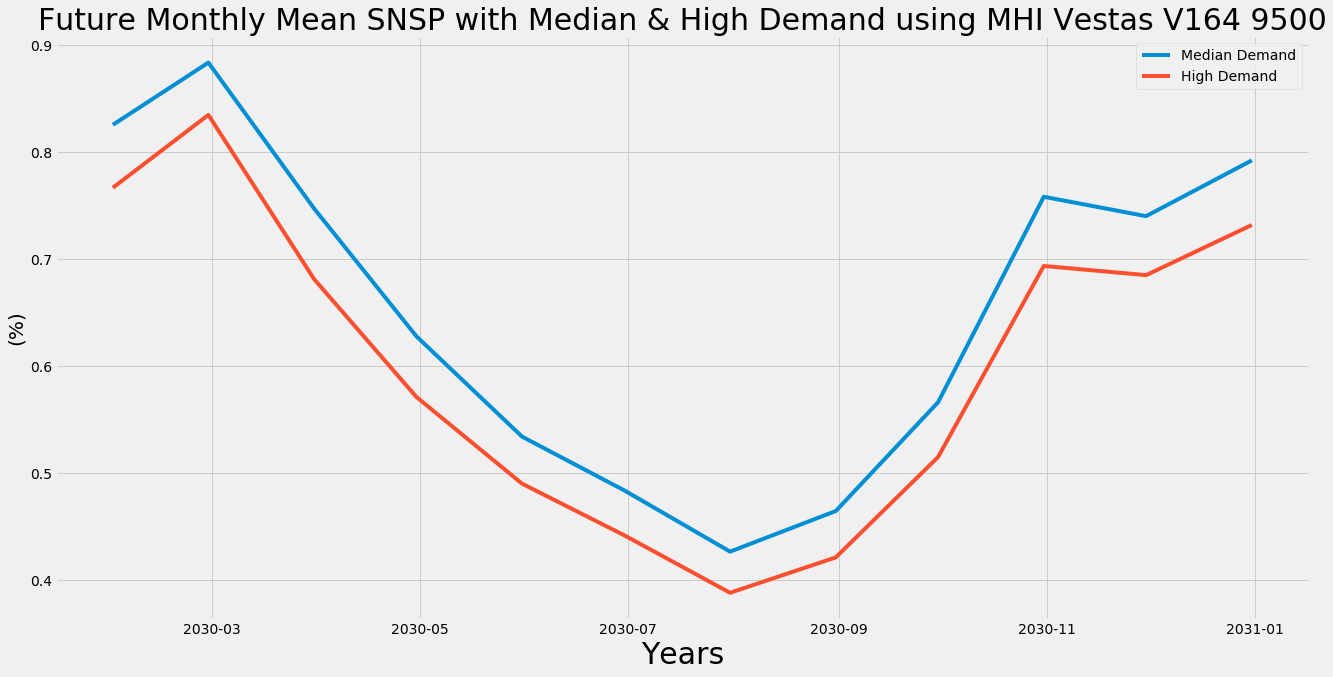

In [70]:
plt.figure(figsize=(20,10))
plt.plot(df_snsp.resample('M').mean())

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Monthly Mean SNSP with Median & High Demand using MHI Vestas V164 9500',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()


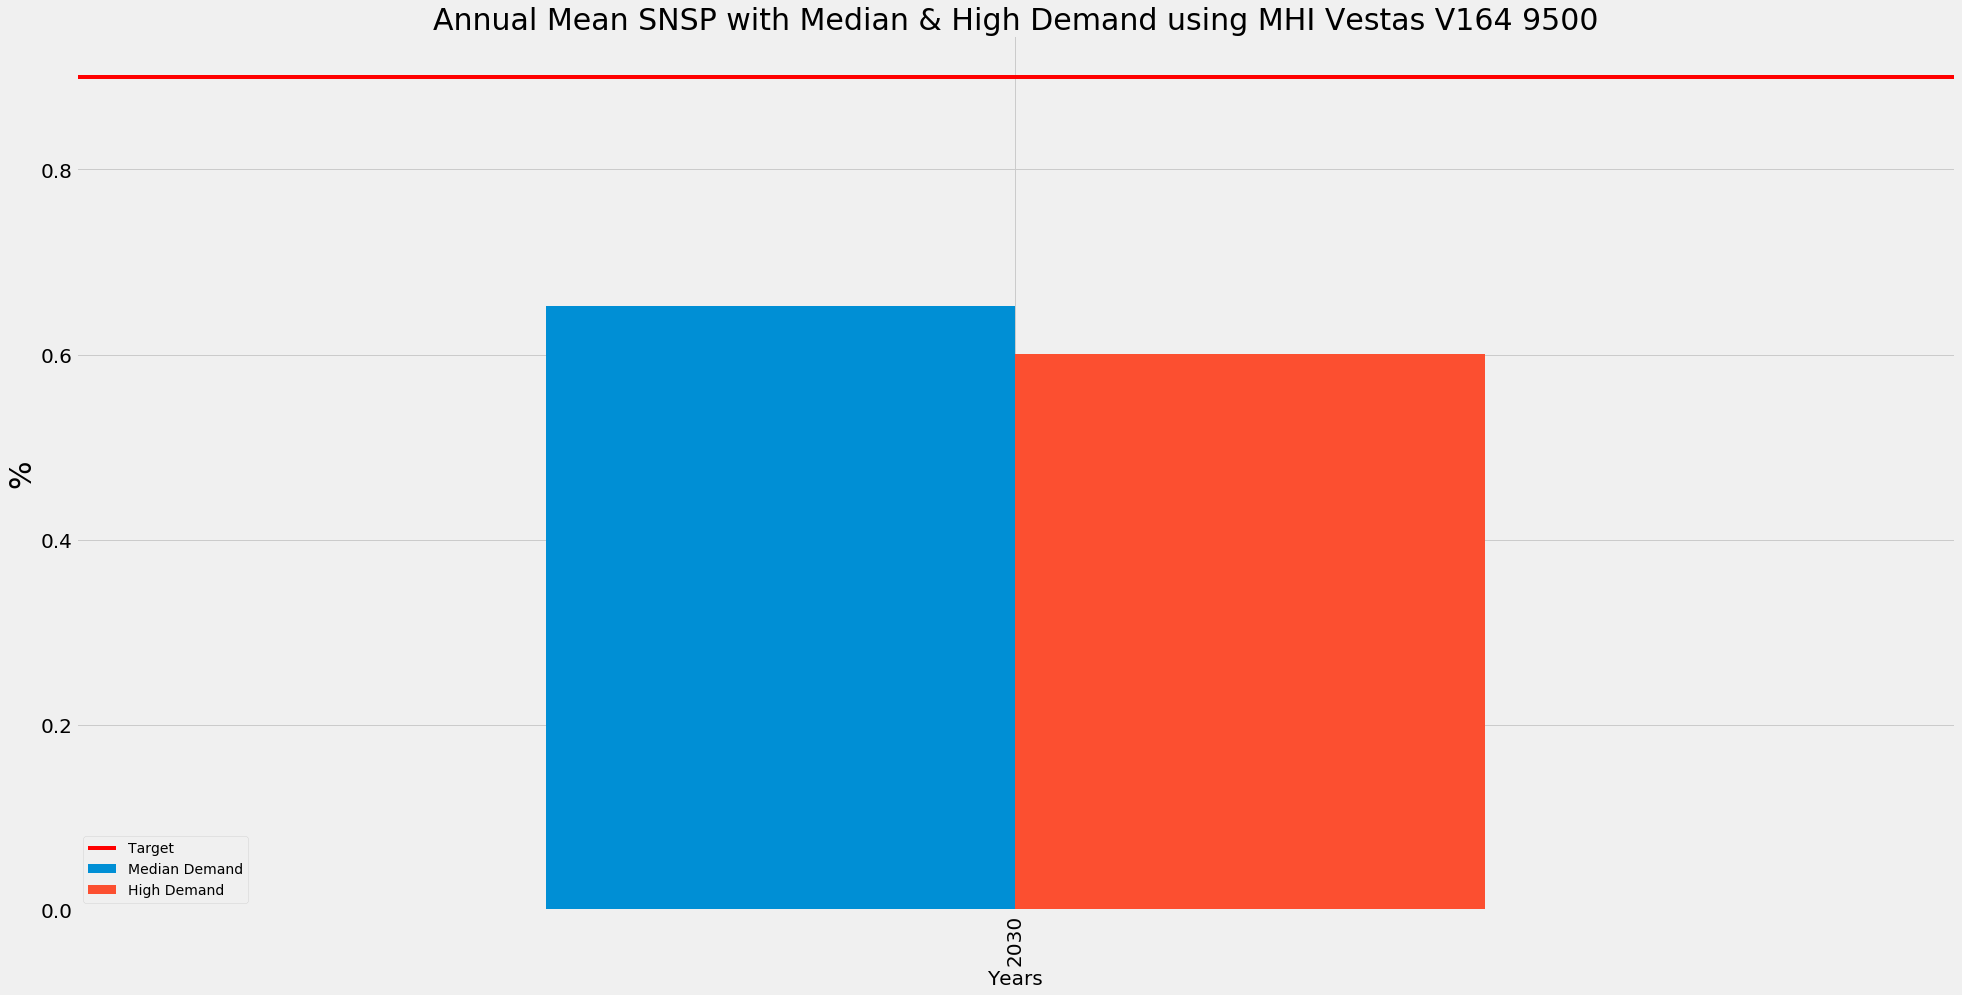

In [71]:
(df_snsp.groupby(df_snsp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Mean SNSP with Median & High Demand using MHI Vestas V164 9500', size =30)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('%',size=30)
plt.yticks(size=20);
plt.legend(labels=['Target', 'Median Demand','High Demand'])

In [72]:
(df_snsp.groupby(df_snsp.index.year).mean())

SNSP Median Forecast  SNSP High Forecast
Date                                          
2030               0.65299            0.600488

# Enercon E126/7580

In [73]:
# If SNSP > 1, imports is reduced to 0
df_analysis['imports'] = np.where(df_analysis['SNSP High Enercon E126 7580 Forecast'] > 1, 0, df_analysis['imports'])
df_analysis['SNSP High Enercon E126 7580 Forecast'] = (df_analysis['Enercon E126 7580 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])

df_analysis['imports'] = np.where(df_analysis['SNSP Median Enercon E126 7580 Forecast'] > 1, 0, df_analysis['imports'])
df_analysis['SNSP Median Enercon E126 7580 Forecast'] = (df_analysis['Enercon E126 7580 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])


# If SNSP > 1, wind is reduced to the demand+exports - imports is reduced to 0                                                                                                         
df_analysis['Enercon E126 7580'] = np.where(df_analysis['SNSP High Enercon E126 7580 Forecast'] > 1,(df_analysis['high demand' ] +df_analysis['exports'])-df_analysis['imports'] - df_analysis['wind'] , df_analysis['Enercon E126 7580'])
df_analysis['Enercon E126 7580 Total Wind'] = df_analysis['wind'] + df_analysis['Enercon E126 7580']
df_analysis['SNSP High Enercon E126 7580 Forecast'] = (df_analysis['Enercon E126 7580 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])


df_analysis['Enercon E126 7580'] = np.where(df_analysis['SNSP Median Enercon E126 7580 Forecast'] > 1,(df_analysis['median demand' ] +df_analysis['exports'])-df_analysis['imports'] - df_analysis['wind'] , df_analysis['Enercon E126 7580'])
df_analysis['Enercon E126 7580 Total Wind'] = df_analysis['wind'] + df_analysis['Enercon E126 7580']
df_analysis['SNSP Median Enercon E126 7580 Forecast'] = (df_analysis['Enercon E126 7580 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])


In [74]:
df_overall = pd.DataFrame()
data = pd.date_range('1/1/2030', periods = 8760, freq ='H')
data_list = data.tolist()
df_overall['Date'] = data_list
df_overall = df_overall.set_index('Date')

df_overall['high demand'] = (df_analysis['high demand']).tolist()
df_overall['median demand'] = (df_analysis['median demand']).tolist()
df_overall['Total Wind'] = (df_analysis['Enercon E126 7580 Total Wind']).tolist()

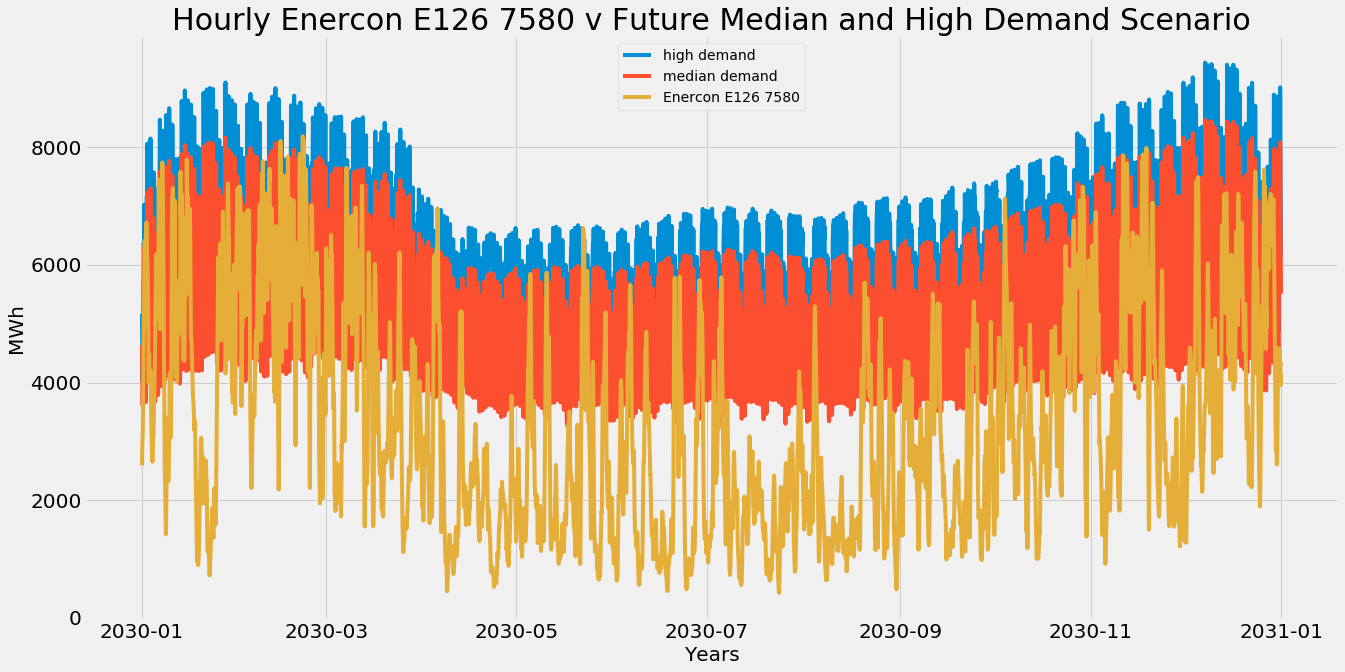

In [75]:
plt.figure(figsize=(20,10))
plt.plot(df_overall)
plt.title('Hourly Enercon E126 7580 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','Enercon E126 7580'])
plt.yticks(size=20);

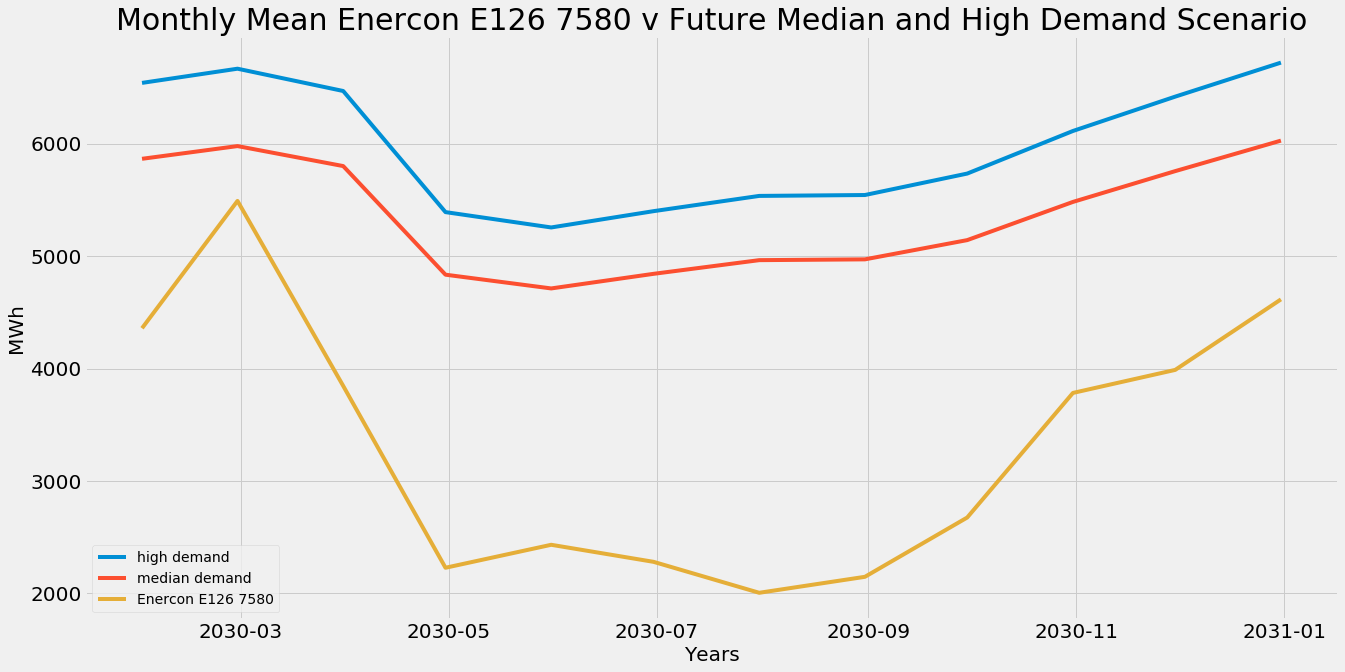

In [76]:
plt.figure(figsize=(20,10))
plt.plot(df_overall.resample('M').mean())
plt.title('Monthly Mean Enercon E126 7580 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','Enercon E126 7580'])
plt.yticks(size=20);

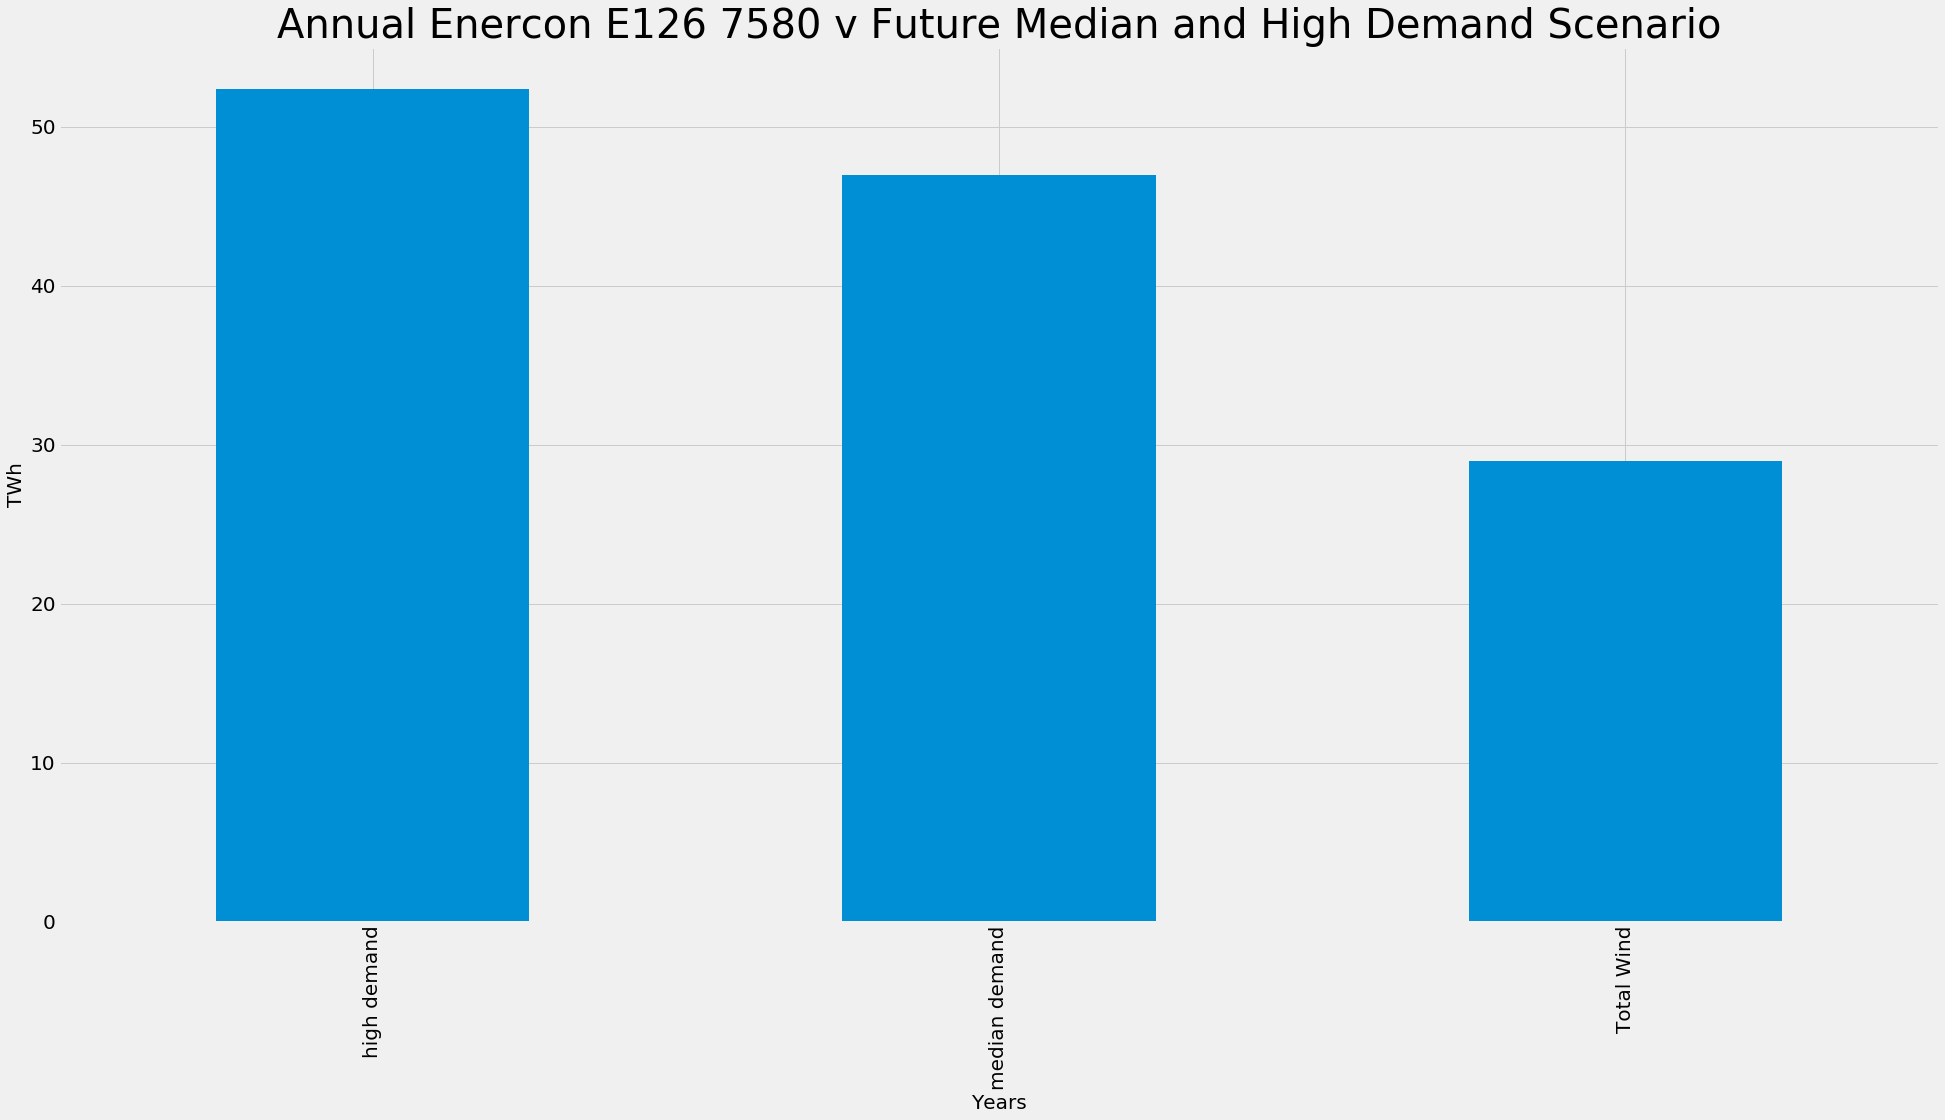

In [77]:
(df_overall.sum()/(1000000)).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Enercon E126 7580 v Future Median and High Demand Scenario', size =40)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('TWh',size=20)
plt.yticks(size=20);



In [78]:
(df_overall.sum()/(1000000))

high demand      52.387461
median demand    46.979098
Total Wind       28.986915
dtype: float64

In [79]:
df_wp = pd.DataFrame(df_overall.index)

df_overall['WP Median Forecast'] = df_overall['Total Wind' ]/df_overall['median demand' ]
df_overall['WP High Forecast'] = df_overall['Total Wind' ]/df_overall['high demand' ]

df_wp['WP Median Forecast'] = df_overall['WP Median Forecast'].tolist()
df_wp['WP High Forecast'] = df_overall['WP High Forecast'].tolist()

df_wp = df_wp.set_index('Date')
df_wp




WP Median Forecast  WP High Forecast
Date                                                     
2030-01-01 00:00:00            0.559189          0.501460
2030-01-01 01:00:00            0.632359          0.567076
2030-01-01 02:00:00            0.733258          0.657559
2030-01-01 03:00:00            0.797574          0.715235
2030-01-01 04:00:00            0.831165          0.745358
...                                 ...               ...
2030-12-31 19:00:00            0.581553          0.521515
2030-12-31 20:00:00            0.598082          0.536337
2030-12-31 21:00:00            0.618909          0.555014
2030-12-31 22:00:00            0.654484          0.586916
2030-12-31 23:00:00            0.751335          0.673769

[8760 rows x 2 columns]

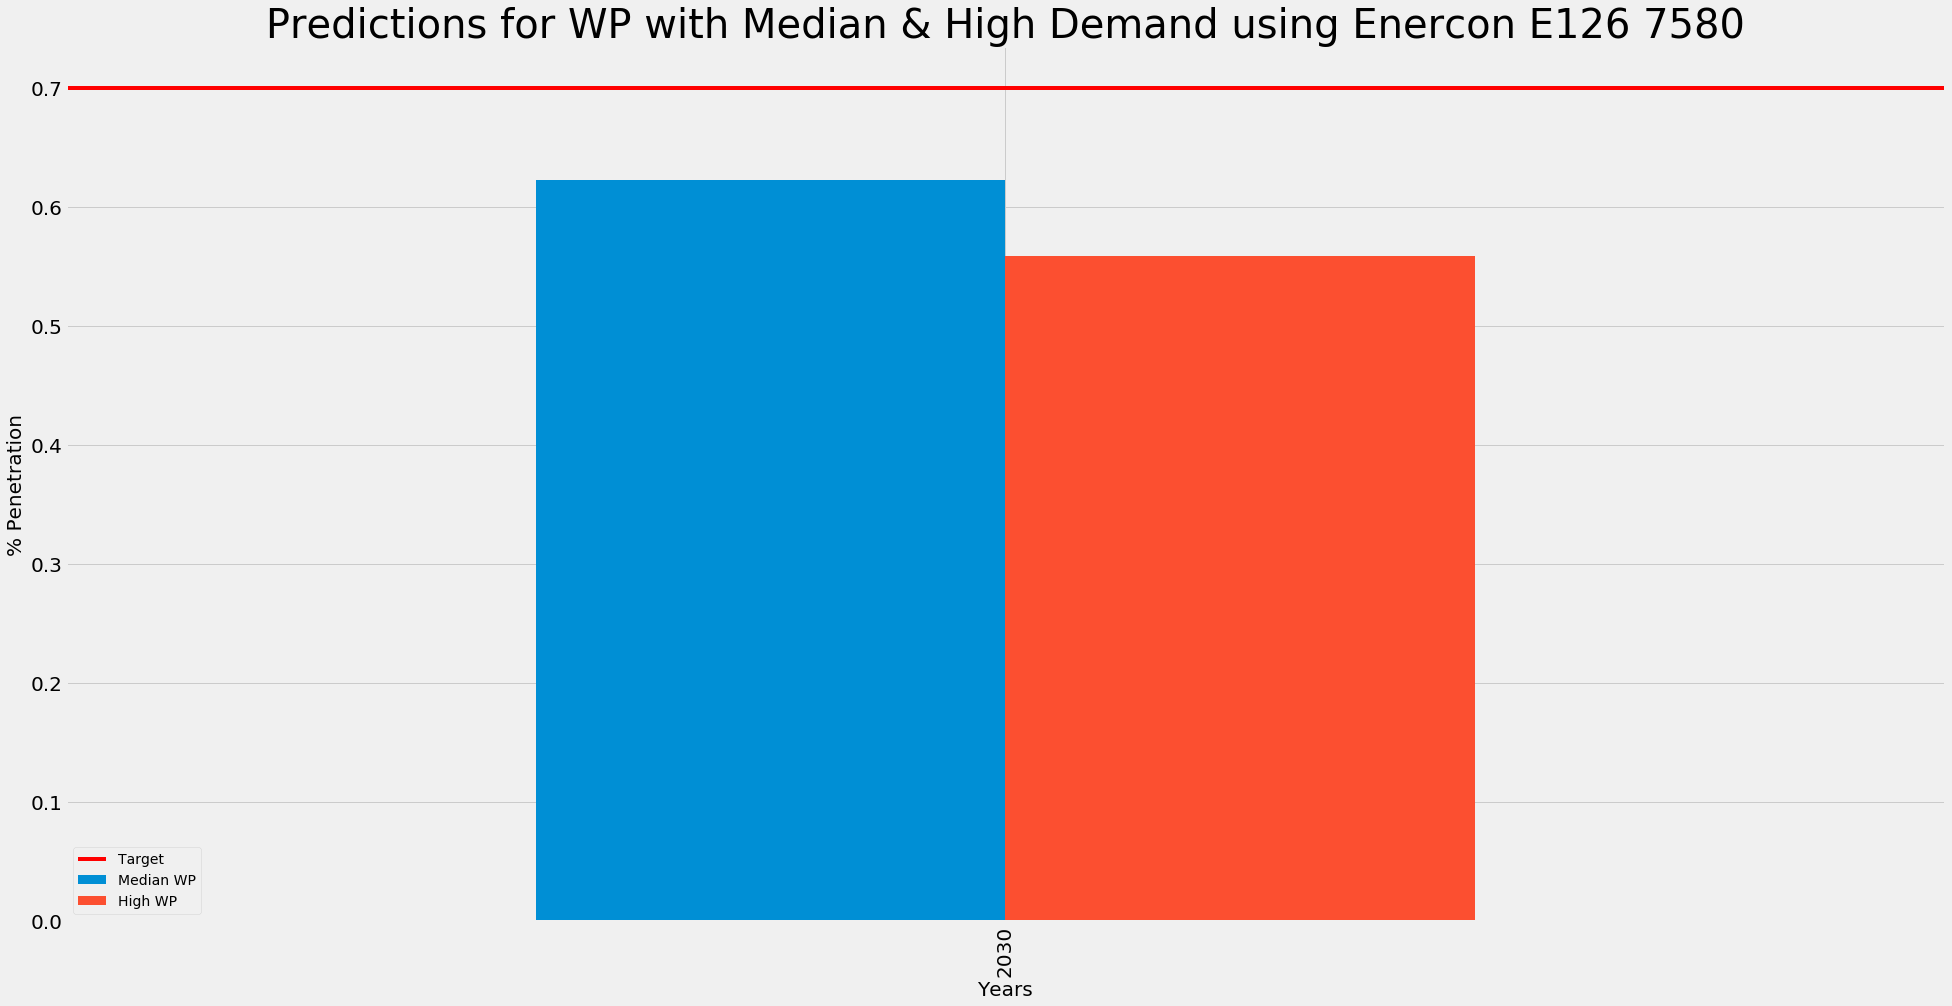

In [80]:
(df_wp.groupby(df_wp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Predictions for WP with Median & High Demand using Enercon E126 7580', size =40)
plt.axhline(y=0.7, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('% Penetration',size=20)
plt.yticks(size=20);
plt.legend(labels=['Target','Median WP','High WP'])



In [81]:
df_wp.groupby(df_wp.index.year).mean()

WP Median Forecast  WP High Forecast
Date                                      
2030            0.622841           0.55854

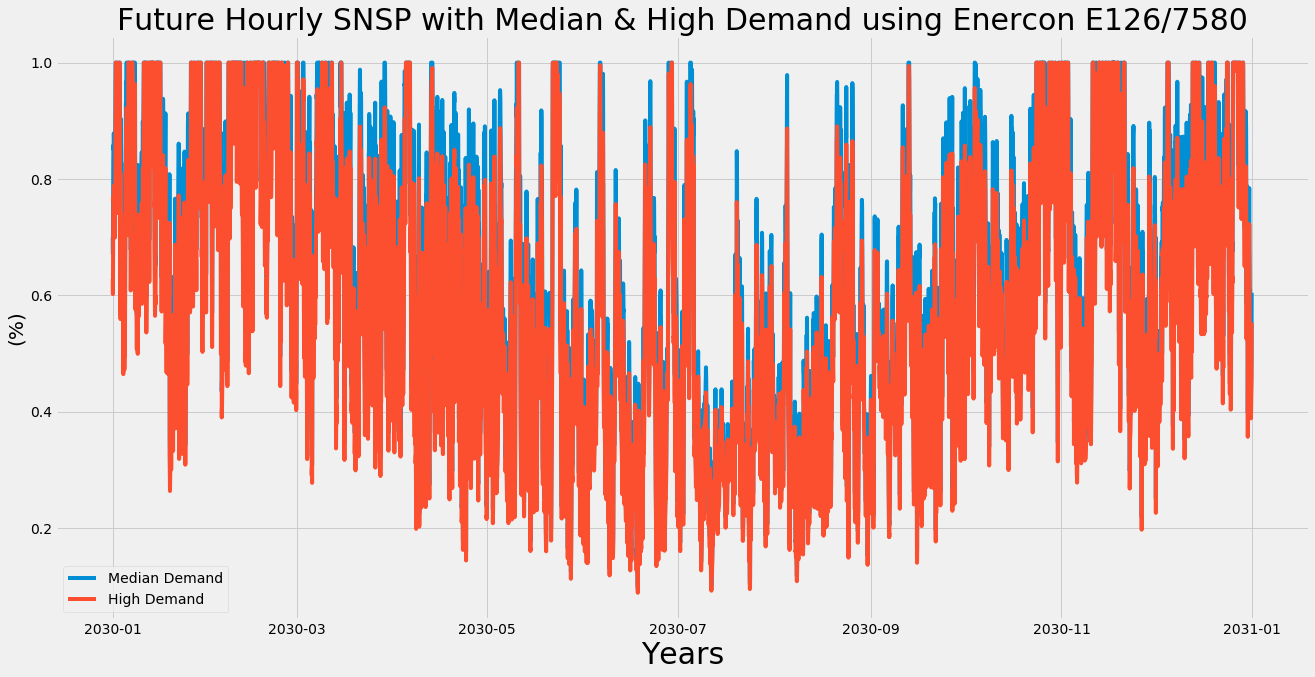

In [82]:
df_snsp = pd.DataFrame(df_overall.index)

df_snsp['SNSP Median Forecast'] = df_analysis['SNSP Median Enercon E126 7580 Forecast'].tolist()
df_snsp['SNSP High Forecast'] = df_analysis['SNSP High Enercon E126 7580 Forecast'].tolist()

df_snsp = df_snsp.set_index('Date')



plt.figure(figsize=(20,10))
plt.plot(df_snsp)

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Hourly SNSP with Median & High Demand using Enercon E126/7580',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()



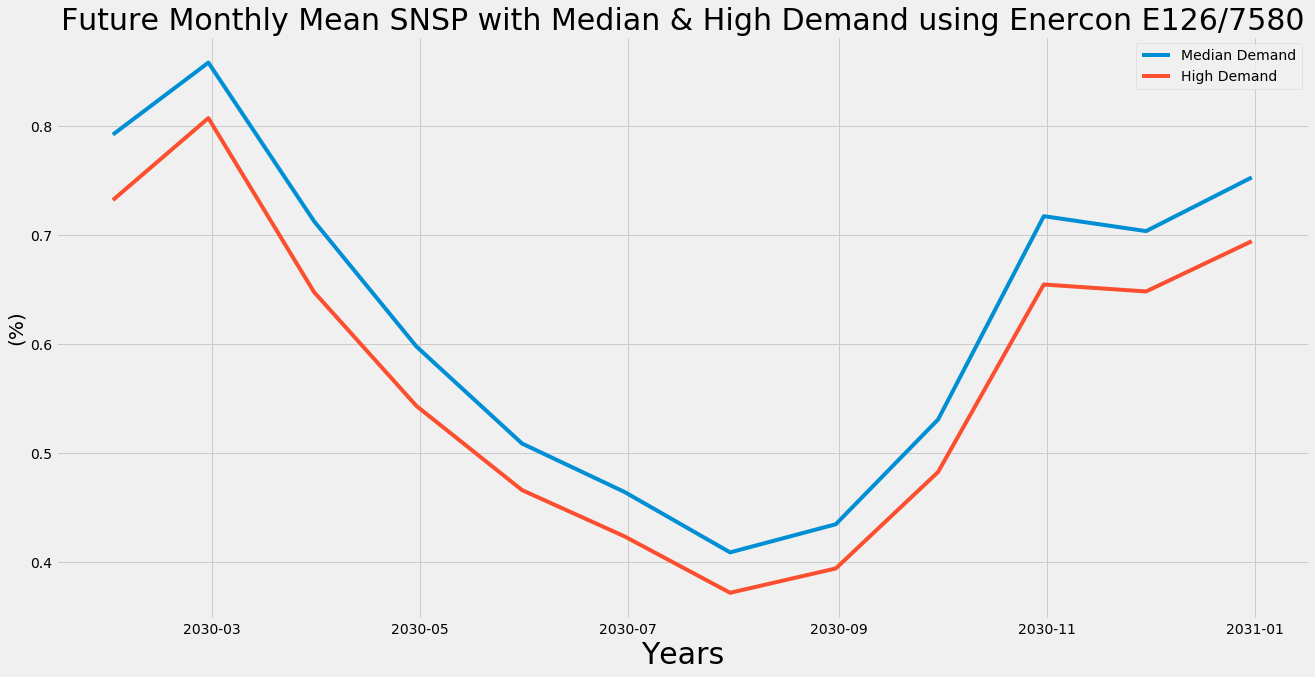

In [83]:
plt.figure(figsize=(20,10))
plt.plot(df_snsp.resample('M').mean())

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Monthly Mean SNSP with Median & High Demand using Enercon E126/7580',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()



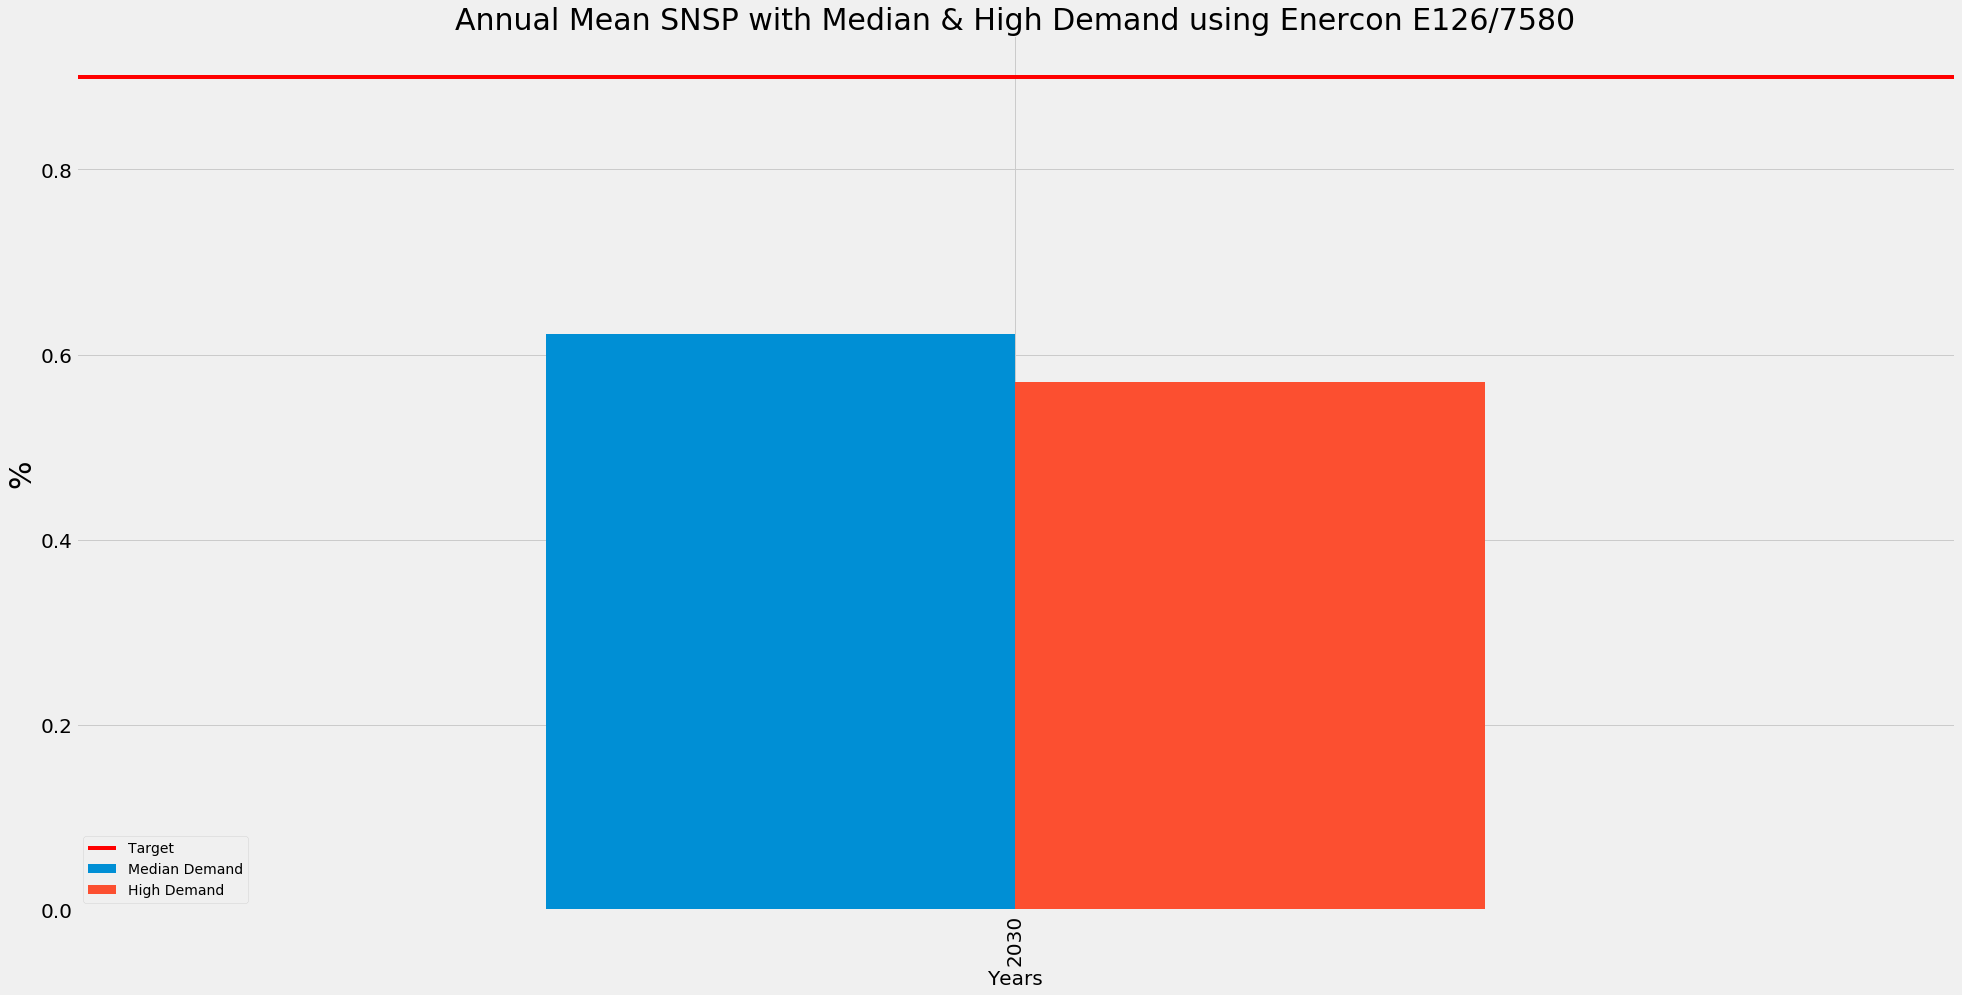

In [84]:
(df_snsp.groupby(df_snsp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Mean SNSP with Median & High Demand using Enercon E126/7580', size =30)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('%',size=30)
plt.yticks(size=20);
plt.legend(labels=['Target', 'Median Demand','High Demand'])

In [85]:
(df_snsp.groupby(df_snsp.index.year).mean())

SNSP Median Forecast  SNSP High Forecast
Date                                          
2030              0.622164            0.570759

In [86]:
df_analysis.mean()

wind                                         2229.540492
low demand                                   4846.042744
median demand                                5362.910748
high demand                                  5980.303747
imports                                       446.753756
exports                                       616.594437
Avera M5000-116                              1045.791335
MHI Vestas V164 8000                         1258.798189
MHI Vestas V164 9500                         1263.493708
Enercon E126 7580                            1079.468090
MHI Vestas V164 9500 Total Wind              3493.034200
MHI Vestas V164 8000 Total Wind              3488.338682
Enercon E126 7580 Total Wind                 3309.008583
Avera M5000-116 Total Wind                   3275.331827
SNSP Median Avera M5000-116 Forecast            0.620730
SNSP High Avera M5000-116 Forecast              0.569653
SNSP Median MHI Vestas V164 8000 Forecast       0.650956
SNSP High MHI Vestas V164 8000 

In [87]:
df_analysis[['Avera M5000-116','MHI Vestas V164 8000','MHI Vestas V164 9500','Enercon E126 7580']].mean()

Avera M5000-116         1045.791335
MHI Vestas V164 8000    1258.798189
MHI Vestas V164 9500    1263.493708
Enercon E126 7580       1079.468090
dtype: float64

In [88]:
df_analysis[['Avera M5000-116','MHI Vestas V164 8000','MHI Vestas V164 9500','Enercon E126 7580']].max()

Avera M5000-116         3456.790538
MHI Vestas V164 8000    3480.781240
MHI Vestas V164 9500    3408.145561
Enercon E126 7580       3114.216863
dtype: float64

In [89]:
df_analysis[['Avera M5000-116','MHI Vestas V164 8000','MHI Vestas V164 9500','Enercon E126 7580']].sum()

Avera M5000-116         9.161132e+06
MHI Vestas V164 8000    1.102707e+07
MHI Vestas V164 9500    1.106820e+07
Enercon E126 7580       9.456140e+06
dtype: float64

In [131]:
df_analysis[['Avera M5000-116','MHI Vestas V164 8000','MHI Vestas V164 9500','Enercon E126 7580']].min()

Avera M5000-116          65.581248
MHI Vestas V164 8000     50.003390
MHI Vestas V164 9500    109.651947
Enercon E126 7580       107.619283
dtype: float64

In [90]:
df1

wind   low demand  median demand  high demand  \
date                                                                        
2013-01-01 00:00:00  1042.239000  3803.080000    3803.080000  3803.080000   
2013-01-01 01:00:00  1092.219000  3518.080000    3518.080000  3518.080000   
2013-01-01 02:00:00  1140.414000  3221.360000    3221.360000  3221.360000   
2013-01-01 03:00:00  1175.463000  2994.740000    2994.740000  2994.740000   
2013-01-01 04:00:00  1173.676000  2900.830000    2900.830000  2900.830000   
...                          ...          ...            ...          ...   
2030-12-31 19:00:00  2811.135582  6743.171918    7462.383448  8321.473504   
2030-12-31 20:00:00  2742.682013  6341.996235    7018.419269  7826.398951   
2030-12-31 21:00:00  2636.921362  5964.866993    6601.066272  7360.999132   
2030-12-31 22:00:00  2511.155155  5459.665856    6041.981520  6737.551009   
2030-12-31 23:00:00  2634.727929  4977.102127    5507.948630  6142.038788   

                     imports      exports  SNSP Low Forecast  \
date                                                           
2013-01-01 00:00:00      0.0     0.000000           0.274051   
2013-01-01 01:00:00      0.0     0.000000           0.310459   
2013-01-01 02:00:00      0.0     0.000000           0.354016   
2013-01-01 03:00:00      0.0     0.000000           0.392509   
2013-01-01 04:00:00      0.0     0.000000           0.404600   
...                      ...          ...                ...   
2030-12-31 19:00:00      0.0  1995.679758           0.321682   
2030-12-31 20:00:00      0.0  2000.124479           0.328775   
2030-12-31 21:00:00      0.0  2000.124479           0.331064   
2030-12-31 22:00:00      0.0  2000.124479           0.336625   
2030-12-31 23:00:00      0.0  1337.861041           0.417220   

                     SNSP Median Forecast  SNSP High Forecast  
date                                                           
2013-01-01 00:00:00              0.274051            0.274051  
2013-01-01 01:00:00              0.310459            0.310459  
2013-01-01 02:00:00              0.354016            0.354016  
2013-01-01 03:00:00              0.392509            0.392509  
2013-01-01 04:00:00              0.404600            0.404600  
...                                   ...                 ...  
2030-12-31 19:00:00              0.297221            0.272472  
2030-12-31 20:00:00              0.304116            0.279110  
2030-12-31 21:00:00              0.306576            0.281689  
2030-12-31 22:00:00              0.312251            0.287394  
2030-12-31 23:00:00              0.384867            0.352241  

[157776 rows x 9 columns]

# Section 6

In [91]:
start_len = len(df1.loc[df1.index >= dt.datetime(2021,1,1)])
end_len = len(df1.loc[df1.index >= dt.datetime(2026,1,1)])
t_len =  start_len - end_len

j = 0
windlist = []

for year in range(0, len(df)):
    windlist.append(0.0)
    
for year in range(0, t_len):
    windlist.append(0.0)
    
for year in range(2026, 2031):
    j += 2
    if year%4 == 0:
        for k in range(0,len(df_analysis)+24):
            
            if k >= 1441:
                x = (df_analysis['Avera M5000-116'][k-24]) * j/10.0
                windlist.append(x)
                
            else:
                x = (df_analysis['Avera M5000-116'][k]) * j/10.0
                windlist.append(x)
        
    elif year%4 != 0:
        for k in range(0,len(df_analysis)):
            x = (df_analysis['Avera M5000-116'][k]) * j/10.0
            windlist.append(x)
            
df1['Total Wind Avera M5000-116'] = windlist       
df1['Total Wind Avera M5000-116'] = df1['Total Wind Avera M5000-116'] + df1['wind']


j = 0
windlist = []

for year in range(0, len(df)):
    windlist.append(0.0)
    
for year in range(0, t_len):
    windlist.append(0.0)
    
    
for year in range(2026, 2031):
    j += 2
    if year%4 == 0:
        for k in range(0,len(df_analysis)+24):
            
            if k >= 1441:
                x = (df_analysis['MHI Vestas V164 8000'][k-24]) * j/10.0
                windlist.append(x)
                
            else:
                x = (df_analysis['MHI Vestas V164 8000'][k]) * j/10.0
                windlist.append(x)
        
    elif year%4 != 0:
        for k in range(0,len(df_analysis)):
            x = (df_analysis['MHI Vestas V164 8000'][k]) * j/10.0
            windlist.append(x)
            
df1['Total Wind MHI Vestas V164 8000'] = windlist       
df1['Total Wind MHI Vestas V164 8000'] = df1['Total Wind MHI Vestas V164 8000'] + df1['wind']


j = 0
windlist = []

for year in range(0, len(df)):
    windlist.append(0.0)
    
for year in range(0, t_len):
    windlist.append(0.0)
    
    
for year in range(2026, 2031):
    j += 2
    if year%4 == 0:
        for k in range(0,len(df_analysis)+24):
            
            if k >= 1441:
                x = (df_analysis['MHI Vestas V164 9500'][k-24]) * j/10.0
                windlist.append(x)
                
            else:
                x = (df_analysis['MHI Vestas V164 9500'][k]) * j/10.0
                windlist.append(x)
        
    elif year%4 != 0:
        for k in range(0,len(df_analysis)):
            x = (df_analysis['MHI Vestas V164 9500'][k]) * j/10.0
            windlist.append(x)
            
df1['Total Wind MHI Vestas V164 9500'] = windlist       
df1['Total Wind MHI Vestas V164 9500'] = df1['Total Wind MHI Vestas V164 9500'] + df1['wind']


j = 0
windlist = []

for year in range(0, len(df)):
    windlist.append(0.0)
    
for year in range(0, t_len):
    windlist.append(0.0)
    
    
for year in range(2026, 2031):
    j += 2
    if year%4 == 0:
        for k in range(0,len(df_analysis)+24):
            
            if k >= 1441:
                x = (df_analysis['Enercon E126 7580'][k-24]) * j/10.0
                windlist.append(x)
                
            else:
                x = (df_analysis['Enercon E126 7580'][k]) * j/10.0
                windlist.append(x)
        
    elif year%4 != 0:
        for k in range(0,len(df_analysis)):
            x = (df_analysis['Enercon E126 7580'][k]) * j/10.0
            windlist.append(x)
            
df1['Total Wind Enercon E126 7580'] = windlist       
df1['Total Wind Enercon E126 7580'] = df1['Total Wind Enercon E126 7580'] + df1['wind']


In [142]:
df1#.loc[df1.index >= dt.datetime(2030,1,1)]

wind   low demand  median demand  high demand  \
date                                                                        
2013-01-01 00:00:00  1042.239000  3803.080000    3803.080000  3803.080000   
2013-01-01 01:00:00  1092.219000  3518.080000    3518.080000  3518.080000   
2013-01-01 02:00:00  1140.414000  3221.360000    3221.360000  3221.360000   
2013-01-01 03:00:00  1175.463000  2994.740000    2994.740000  2994.740000   
2013-01-01 04:00:00  1173.676000  2900.830000    2900.830000  2900.830000   
...                          ...          ...            ...          ...   
2030-12-31 19:00:00  2811.135582  6743.171918    7462.383448  8321.473504   
2030-12-31 20:00:00  2742.682013  6341.996235    7018.419269  7826.398951   
2030-12-31 21:00:00  2636.921362  5964.866993    6601.066272  7360.999132   
2030-12-31 22:00:00  2511.155155  5459.665856    6041.981520  6737.551009   
2030-12-31 23:00:00  2634.727929  4977.102127    5507.948630  6142.038788   

                     imports      exports  SNSP Low Forecast  \
date                                                           
2013-01-01 00:00:00      0.0     0.000000           0.274051   
2013-01-01 01:00:00      0.0     0.000000           0.310459   
2013-01-01 02:00:00      0.0     0.000000           0.354016   
2013-01-01 03:00:00      0.0     0.000000           0.392509   
2013-01-01 04:00:00      0.0     0.000000           0.404600   
...                      ...          ...                ...   
2030-12-31 19:00:00      0.0  1995.679758           0.321682   
2030-12-31 20:00:00      0.0  2000.124479           0.328775   
2030-12-31 21:00:00      0.0  2000.124479           0.331064   
2030-12-31 22:00:00      0.0  2000.124479           0.336625   
2030-12-31 23:00:00      0.0  1337.861041           0.417220   

                     SNSP Median Forecast  SNSP High Forecast  \
date                                                            
2013-01-01 00:00:00              0.274051            0.274051   
2013-01-01 01:00:00              0.310459            0.310459   
2013-01-01 02:00:00              0.354016            0.354016   
2013-01-01 03:00:00              0.392509            0.392509   
2013-01-01 04:00:00              0.404600            0.404600   
...                                   ...                 ...   
2030-12-31 19:00:00              0.297221            0.272472   
2030-12-31 20:00:00              0.304116            0.279110   
2030-12-31 21:00:00              0.306576            0.281689   
2030-12-31 22:00:00              0.312251            0.287394   
2030-12-31 23:00:00              0.384867            0.352241   

                     Total Wind Avera M5000-116  \
date                                              
2013-01-01 00:00:00                 1042.239000   
2013-01-01 01:00:00                 1092.219000   
2013-01-01 02:00:00                 1140.414000   
2013-01-01 03:00:00                 1175.463000   
2013-01-01 04:00:00                 1173.676000   
...                                         ...   
2030-12-31 19:00:00                 4310.073552   
2030-12-31 20:00:00                 4147.202690   
2030-12-31 21:00:00                 4025.288410   
2030-12-31 22:00:00                 3886.493459   
2030-12-31 23:00:00                 4075.341063   

                     Total Wind MHI Vestas V164 8000  \
date                                                   
2013-01-01 00:00:00                      1042.239000   
2013-01-01 01:00:00                      1092.219000   
2013-01-01 02:00:00                      1140.414000   
2013-01-01 03:00:00                      1175.463000   
2013-01-01 04:00:00                      1173.676000   
...                                              ...   
2030-12-31 19:00:00                      4751.891556   
2030-12-31 20:00:00                      4587.301843   
2030-12-31 21:00:00                      4469.741036   
2030-12-31 22:00:00                      4342.661805   
2030-12-31 

### The Multivariable Polynomial Regression is taken from Ahmed (2020)

Ahmed, M. 'Polynomial Regression in Python, Step-by-step follow along|Data Science|Episode 4.7',28th August 2020. https://ai.plainenglish.io/implementing-polynomial-regression-in-python-d9aedf520d56


### Degree = 1 

In [95]:
dfA = df.copy()
dfA = dfA.loc[dfA.index >= dt.datetime(2018,1,1)]

df1A = df1.copy()
df1A = df1A.loc[df1A.index >= dt.datetime(2018,1,1)]

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array(dfA[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(dfA.DA_Prices)

pre_process = PolynomialFeatures(degree=1)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)

#degree = 1
theta0 = pr_model.intercept_
_, theta1, theta2 = pr_model.coef_
theta0, theta1, theta2 

(-5.351520616057492, -0.00989827113878432, 0.0158203155821)

In [97]:
df_d1= pd.DataFrame(df1A.index)
df_d1 = df_d1.set_index('date')
newlist = []
wd = df1A['Total Wind Avera M5000-116']
dmd = df1A['median demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1['DA Ahead on Median Demand 1 degree using Avera M5000-116'] = newlist

newlist = []
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1['DA Ahead on High Demand 1 degree using Avera M5000-116'] = newlist


newlist = []
wd = df1A['Total Wind MHI Vestas V164 8000']
dmd = df1A['median demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1['DA Ahead on Median Demand 1 degree using MHI Vestas V164 8000'] = newlist

newlist = []
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1['DA Ahead on High Demand 1 degree using MHI Vestas V164 8000'] = newlist

newlist = []
wd = df1A['Total Wind MHI Vestas V164 9500']
dmd = df1A['median demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1['DA Ahead on Median Demand 1 degree using MHI Vestas V164 9500'] = newlist

newlist = []
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1['DA Ahead on High Demand 1 degree using MHI Vestas V164 9500'] = newlist

newlist = []
wd = df1A['Total Wind Enercon E126 7580']
dmd = df1A['median demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1['DA Ahead on Median Demand 1 degree using Enercon E126 7580'] = newlist

newlist = []
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1['DA Ahead on High Demand 1 degree using Enercon E126 7580'] = newlist

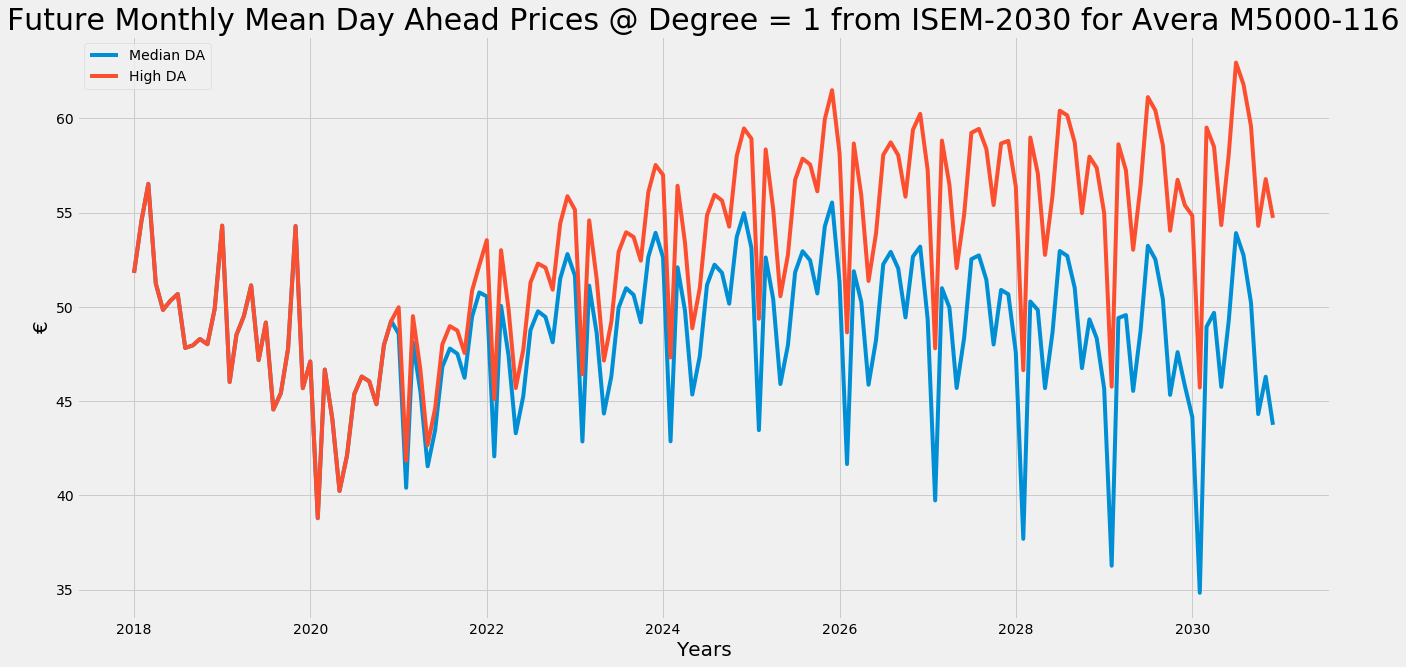

In [98]:
#df_d1 = df_d1.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d1['DA Ahead on Median Demand 1 degree using Avera M5000-116'].resample('MS').mean())
plt.plot(df_d1['DA Ahead on High Demand 1 degree using Avera M5000-116'].resample('MS').mean())
plt.legend(labels=['Median DA','High DA'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 1 from ISEM-2030 for Avera M5000-116', size = 30)

plt.show()

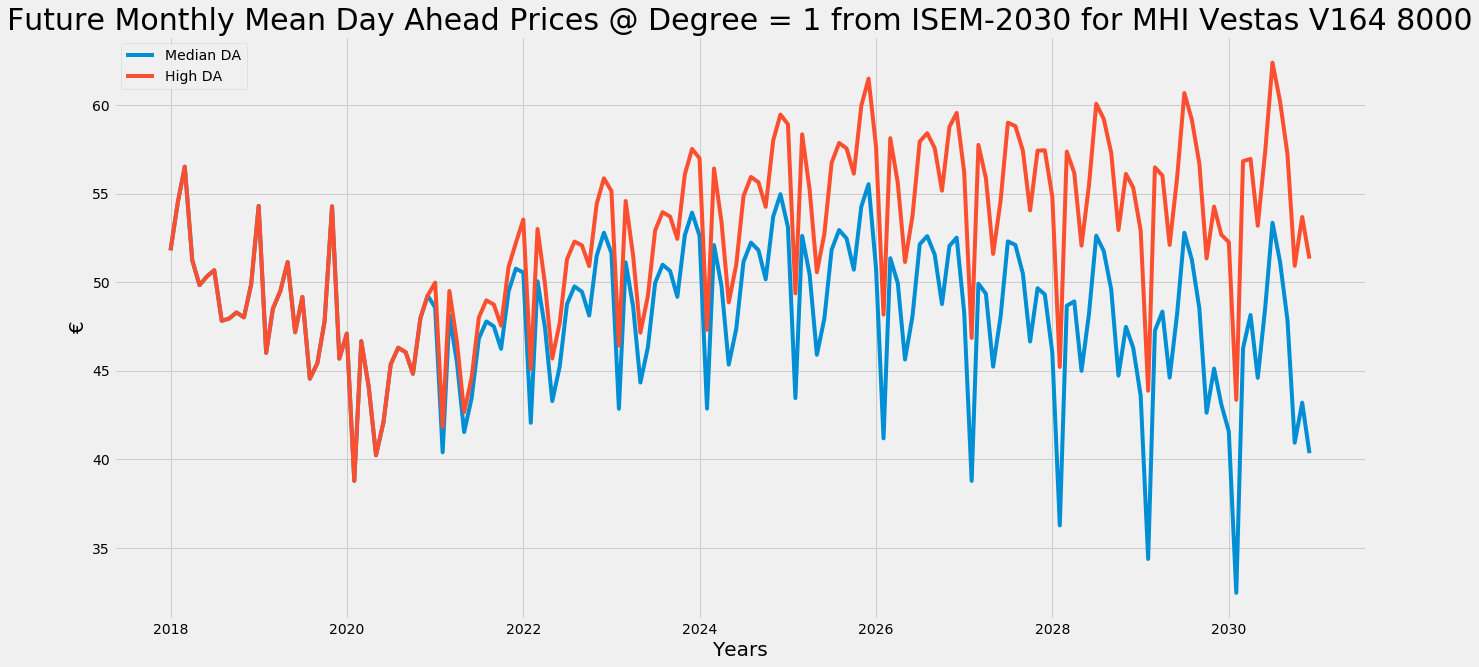

In [99]:
#df_d1 = df_d1.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d1['DA Ahead on Median Demand 1 degree using MHI Vestas V164 8000'].resample('MS').mean())
plt.plot(df_d1['DA Ahead on High Demand 1 degree using MHI Vestas V164 8000'].resample('MS').mean())
plt.legend(labels=['Median DA','High DA'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 1 from ISEM-2030 for MHI Vestas V164 8000', size = 30)

plt.show()

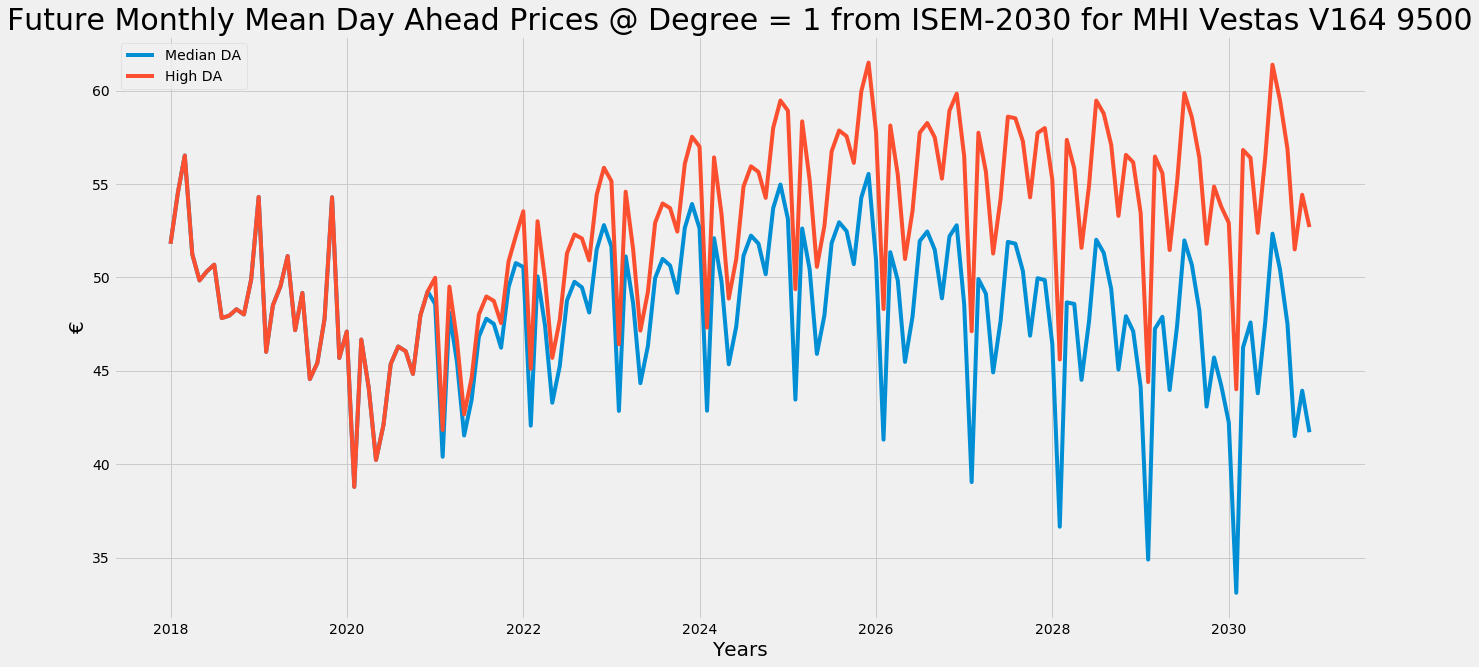

In [100]:
#df_d1 = df_d1.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d1['DA Ahead on Median Demand 1 degree using MHI Vestas V164 9500'].resample('MS').mean())
plt.plot(df_d1['DA Ahead on High Demand 1 degree using MHI Vestas V164 9500'].resample('MS').mean())
plt.legend(labels=['Median DA','High DA'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 1 from ISEM-2030 for MHI Vestas V164 9500', size = 30)

plt.show()

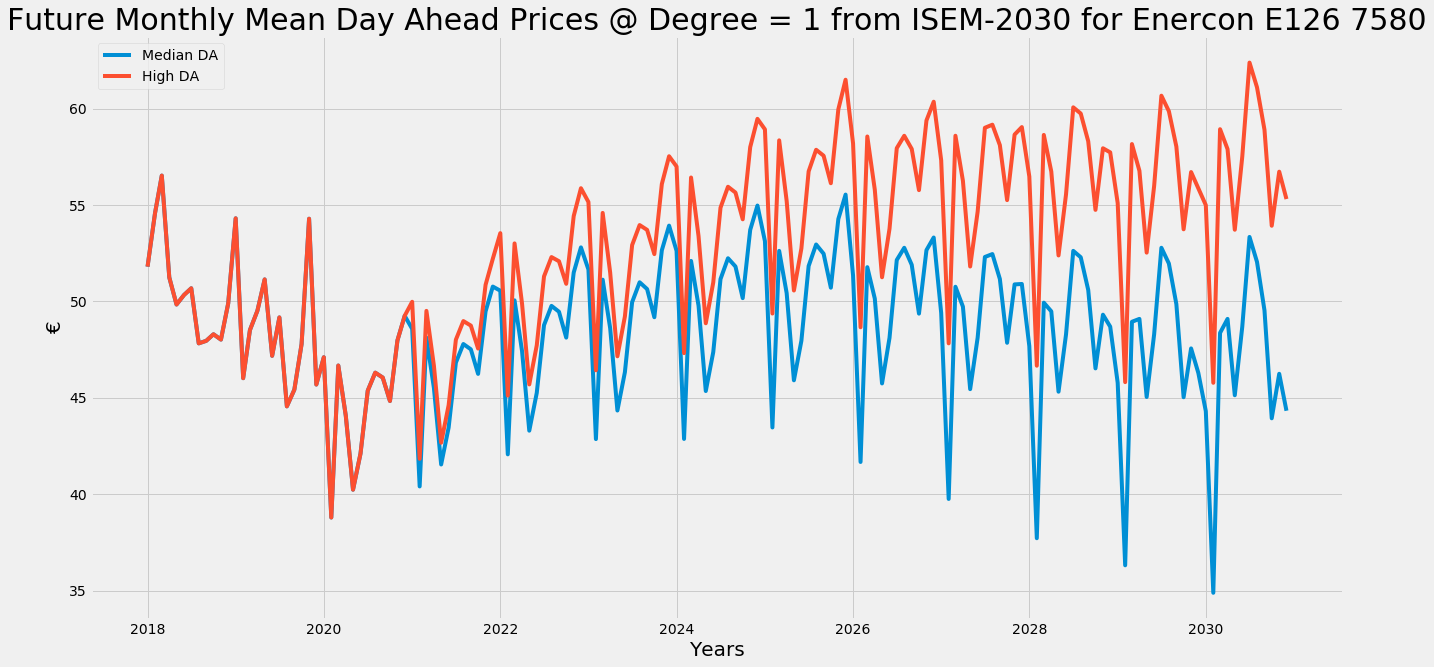

In [101]:
#df_d1 = df_d1.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d1['DA Ahead on Median Demand 1 degree using Enercon E126 7580'].resample('MS').mean())
plt.plot(df_d1['DA Ahead on High Demand 1 degree using Enercon E126 7580'].resample('MS').mean())
plt.legend(labels=['Median DA','High DA'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 1 from ISEM-2030 for Enercon E126 7580', size = 30)

plt.show()

### Degree = 2

In [102]:
X = np.array(dfA[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(dfA.DA_Prices)

pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)

#degree = 2
theta0 = pr_model.intercept_
_, theta1, theta2, theta3, theta4, theta5 = pr_model.coef_
theta0, theta1, theta2, theta3,theta4, theta5

(61.30846597569776,
 -0.007509648751771861,
 -0.0172838531522913,
 -6.728886718198983e-07,
 -1.9988365409021047e-08,
 3.8803461070418405e-06)

In [103]:
df_d2A= pd.DataFrame(df1A.index)
df_d2A = df_d2A.set_index('date')

newlist = []
wd = df1A['Total Wind Avera M5000-116']
dmd = df1A['median demand']
for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2A['DA Ahead on Median Demand 2 degree using Avera M5000-116'] = newlist

newlist = []
dmd = df1A['high demand']
for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2A['DA Ahead on High Demand 2 degree using Avera M5000-116'] = newlist



newlist = []
wd = df1A['Total Wind MHI Vestas V164 8000']
dmd = df1A['median demand']
for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2A['DA Ahead on Median Demand 2 degree using MHI Vestas V164 8000'] = newlist

newlist = []
dmd = df1A['high demand']
for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2A['DA Ahead on High Demand 2 degree using MHI Vestas V164 8000'] = newlist



newlist = []
wd = df1A['Total Wind MHI Vestas V164 9500']
dmd = df1A['median demand']
for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2A['DA Ahead on Median Demand 2 degree using MHI Vestas V164 9500'] = newlist

newlist = []
dmd = df1A['high demand']
for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2A['DA Ahead on High Demand 2 degree using MHI Vestas V164 9500'] = newlist


newlist = []
wd = df1A['Total Wind Enercon E126 7580']
dmd = df1A['median demand']
for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2A['DA Ahead on Median Demand 2 degree using Enercon E126 7580'] = newlist

newlist = []
dmd = df1A['high demand']
for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2A['DA Ahead on High Demand 2 degree using Enercon E126 7580'] = newlist

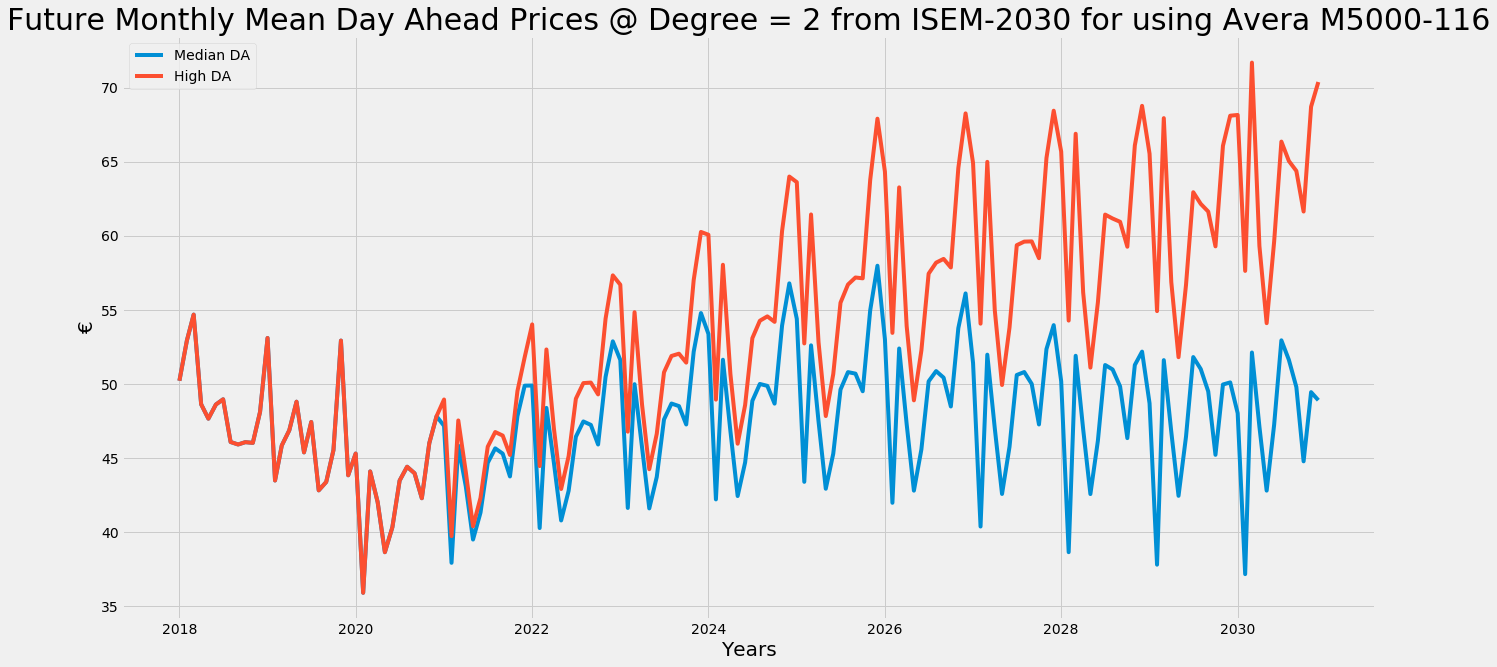

In [104]:
#df_d2A = df_d2A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d2A['DA Ahead on Median Demand 2 degree using Avera M5000-116'].resample('MS').mean())
plt.plot(df_d2A['DA Ahead on High Demand 2 degree using Avera M5000-116'].resample('MS').mean())
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 2 from ISEM-2030 for using Avera M5000-116',size = 30)
plt.show()

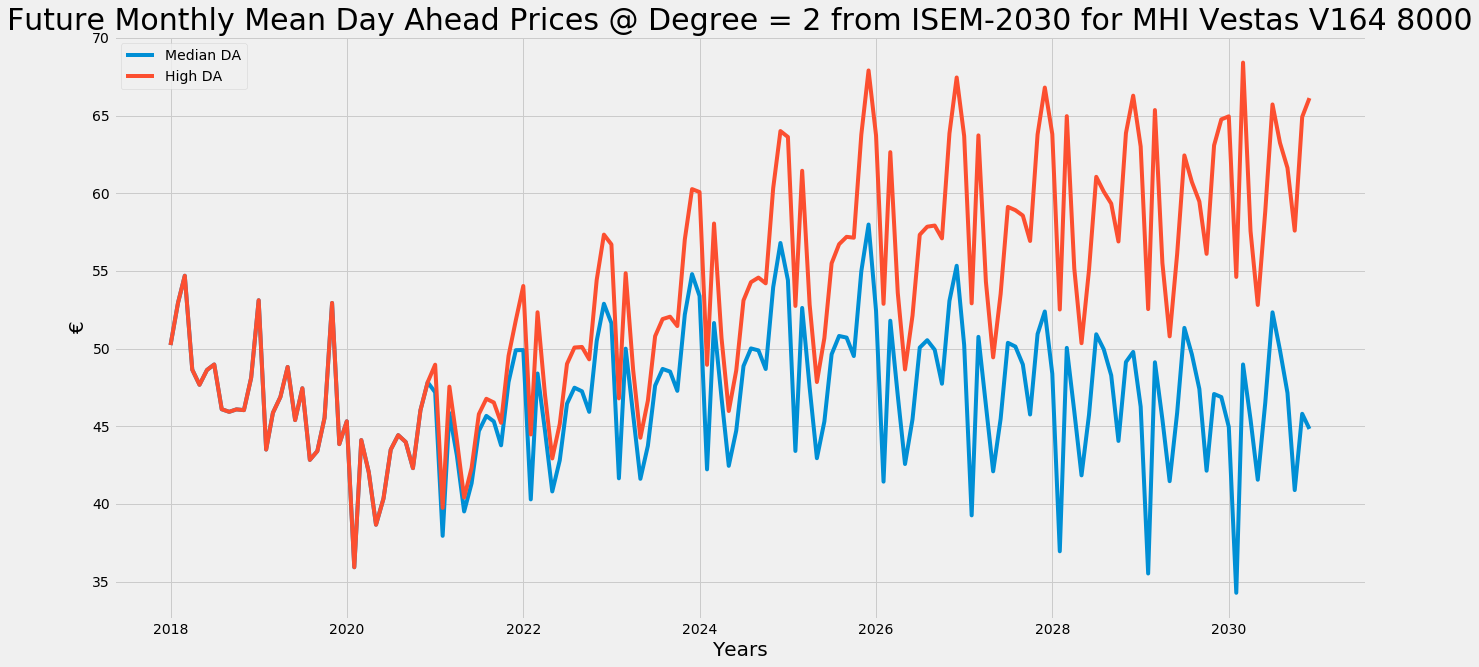

In [105]:
#df_d2A = df_d2A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d2A['DA Ahead on Median Demand 2 degree using MHI Vestas V164 8000'].resample('MS').mean())
plt.plot(df_d2A['DA Ahead on High Demand 2 degree using MHI Vestas V164 8000'].resample('MS').mean())
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 2 from ISEM-2030 for MHI Vestas V164 8000',size = 30)
plt.show()

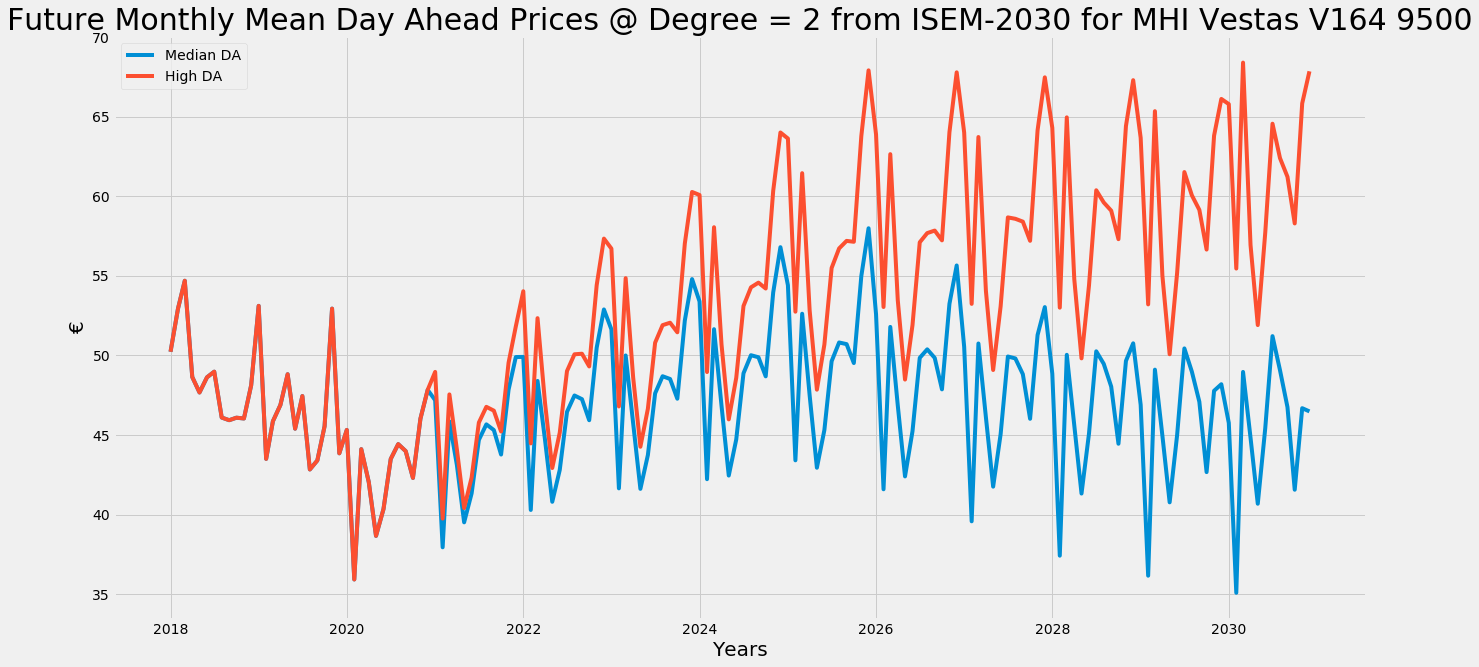

In [106]:
#df_d2A = df_d2A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d2A['DA Ahead on Median Demand 2 degree using MHI Vestas V164 9500'].resample('MS').mean())
plt.plot(df_d2A['DA Ahead on High Demand 2 degree using MHI Vestas V164 9500'].resample('MS').mean())
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 2 from ISEM-2030 for MHI Vestas V164 9500',size = 30)
plt.show()

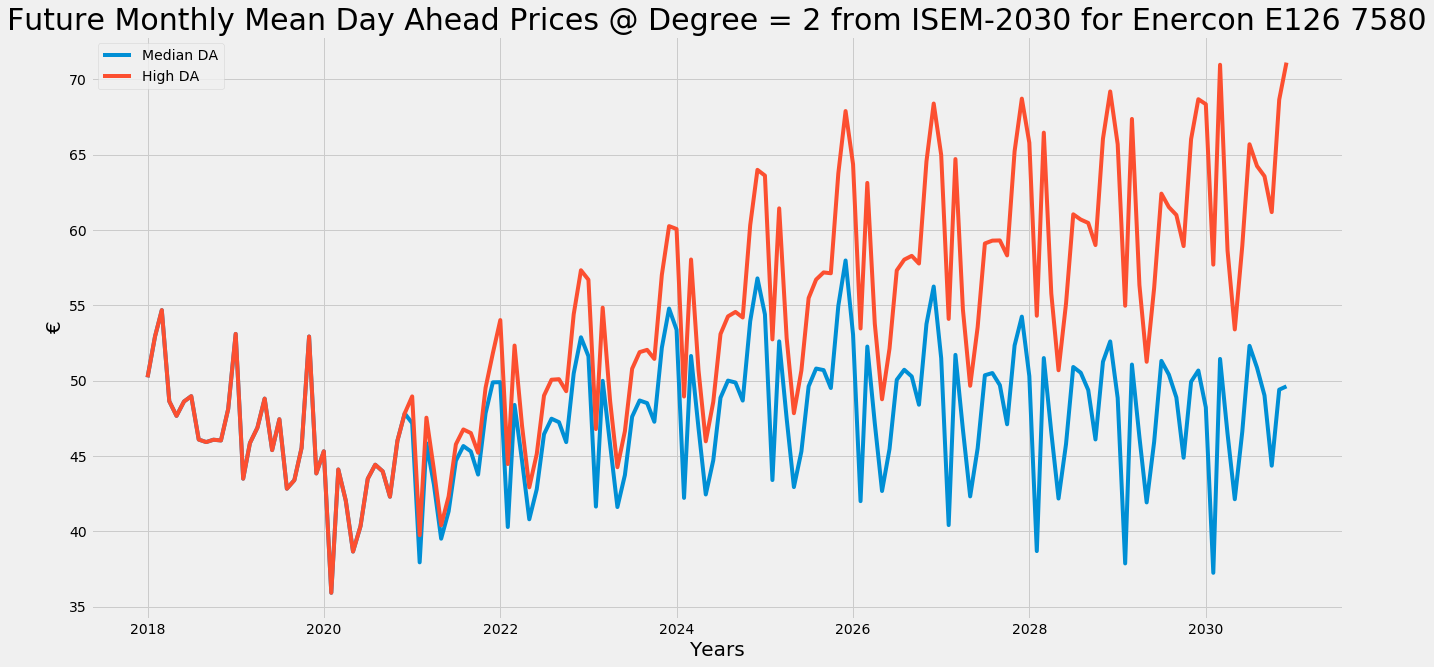

In [107]:
#df_d2A = df_d2A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d2A['DA Ahead on Median Demand 2 degree using Enercon E126 7580'].resample('MS').mean())
plt.plot(df_d2A['DA Ahead on High Demand 2 degree using Enercon E126 7580'].resample('MS').mean())
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 2 from ISEM-2030 for Enercon E126 7580',size = 30)
plt.show()

### Degree = 3

In [108]:
X = np.array(dfA[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(dfA.DA_Prices)

pre_process = PolynomialFeatures(degree=3)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)


#degree = 3
theta0 = pr_model.intercept_
_, theta1, theta2, theta3, theta4, theta5, theta6, theta7,theta8, theta9 = pr_model.coef_
theta0, theta1, theta2, theta3,theta4, theta5, theta6, theta7,theta8, theta9

(-140.49016219675383,
 -0.048015216697293556,
 0.14378478484276921,
 -8.959401162548335e-06,
 2.745208614513929e-05,
 -3.8633155991085054e-05,
 -9.362586717194532e-10,
 3.232336334355046e-09,
 -4.528142328111273e-09,
 3.7149069098685317e-09)

In [109]:
df_d3A= pd.DataFrame(df1A.index)
df_d3A = df_d3A.set_index('date')

newlist = []
wd = df1A['Total Wind Avera M5000-116']
dmd = df1A['median demand']


for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3A['DA Ahead on Median Demand 3 degree using Avera M5000-116'] = newlist


newlist = []
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3A['DA Ahead on High Demand 3 degree using Avera M5000-116'] = newlist



newlist = []
wd = df1A['Total Wind MHI Vestas V164 8000']
dmd = df1A['median demand']


for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3A['DA Ahead on Median Demand 3 degree using MHI Vestas V164 8000'] = newlist


newlist = []
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3A['DA Ahead on High Demand 3 degree using MHI Vestas V164 8000'] = newlist



newlist = []
wd = df1A['Total Wind MHI Vestas V164 9500']
dmd = df1A['median demand']


for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3A['DA Ahead on Median Demand 3 degree using MHI Vestas V164 9500'] = newlist


newlist = []
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3A['DA Ahead on High Demand 3 degree using MHI Vestas V164 9500'] = newlist



newlist = []
wd = df1A['Total Wind Enercon E126 7580']
dmd = df1A['median demand']


for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3A['DA Ahead on Median Demand 3 degree using Enercon E126 7580'] = newlist


newlist = []
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3A['DA Ahead on High Demand 3 degree using Enercon E126 7580'] = newlist

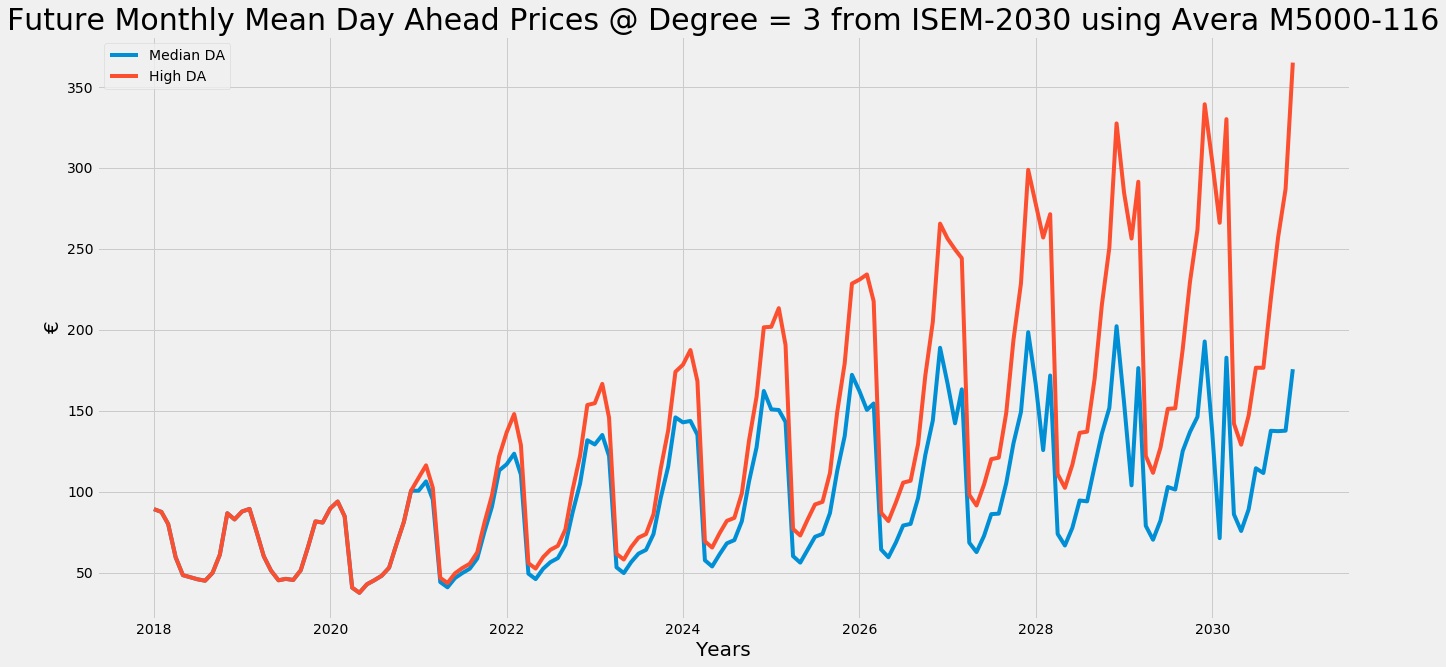

In [110]:
#df_d3A = df_d3A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d3A['DA Ahead on Median Demand 3 degree using Avera M5000-116'].resample('MS').mean())
plt.plot(df_d3A['DA Ahead on High Demand 3 degree using Avera M5000-116'].resample('MS').mean())
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 3 from ISEM-2030 using Avera M5000-116',size = 30)

plt.show()

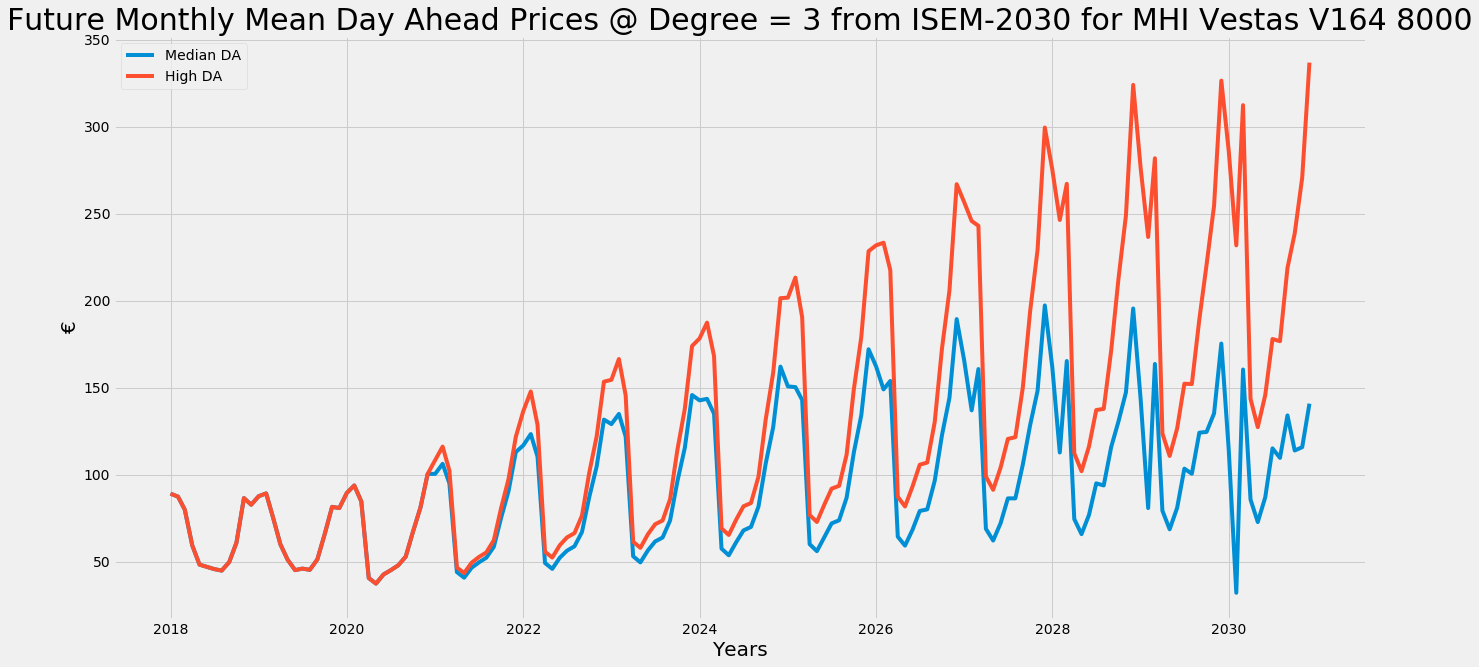

In [111]:
#df_d3A = df_d3A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d3A['DA Ahead on Median Demand 3 degree using MHI Vestas V164 8000'].resample('MS').mean())
plt.plot(df_d3A['DA Ahead on High Demand 3 degree using MHI Vestas V164 8000'].resample('MS').mean())
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 3 from ISEM-2030 for MHI Vestas V164 8000',size = 30)

plt.show()

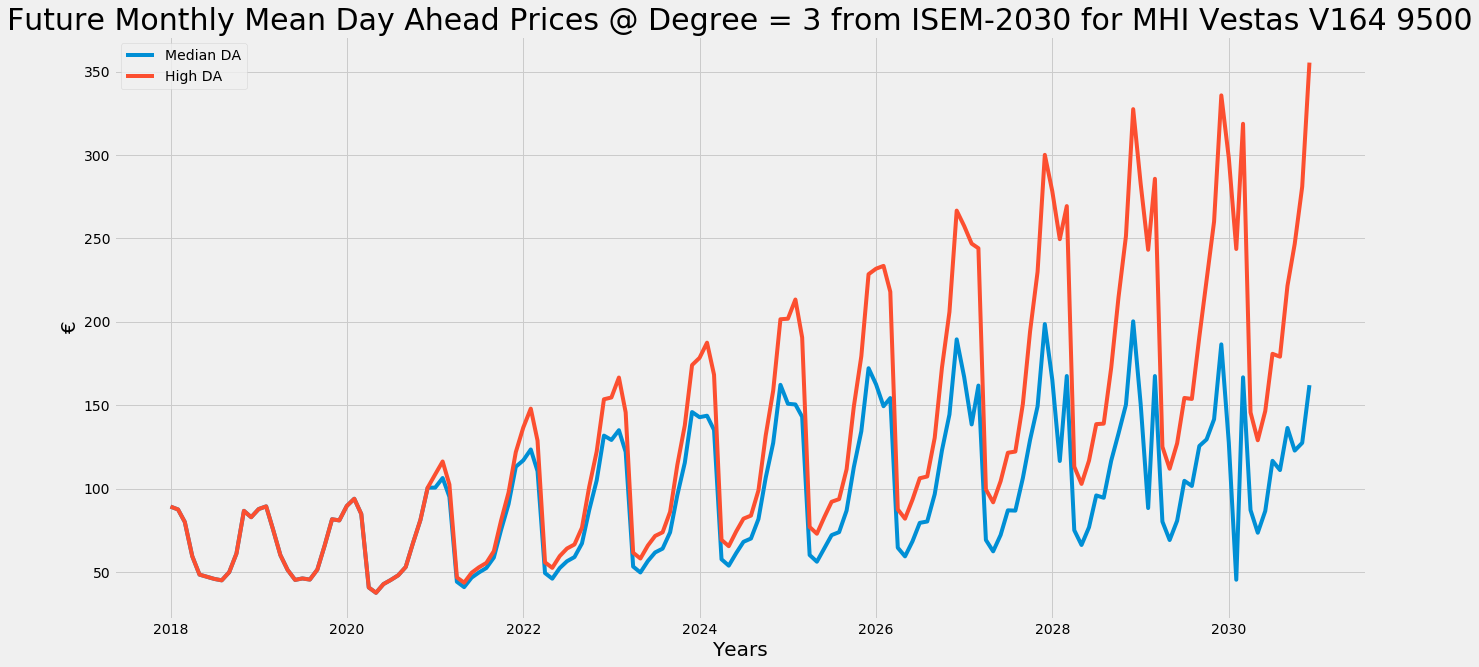

In [112]:
#df_d3A = df_d3A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d3A['DA Ahead on Median Demand 3 degree using MHI Vestas V164 9500'].resample('MS').mean())
plt.plot(df_d3A['DA Ahead on High Demand 3 degree using MHI Vestas V164 9500'].resample('MS').mean())
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 3 from ISEM-2030 for MHI Vestas V164 9500',size = 30)

plt.show()

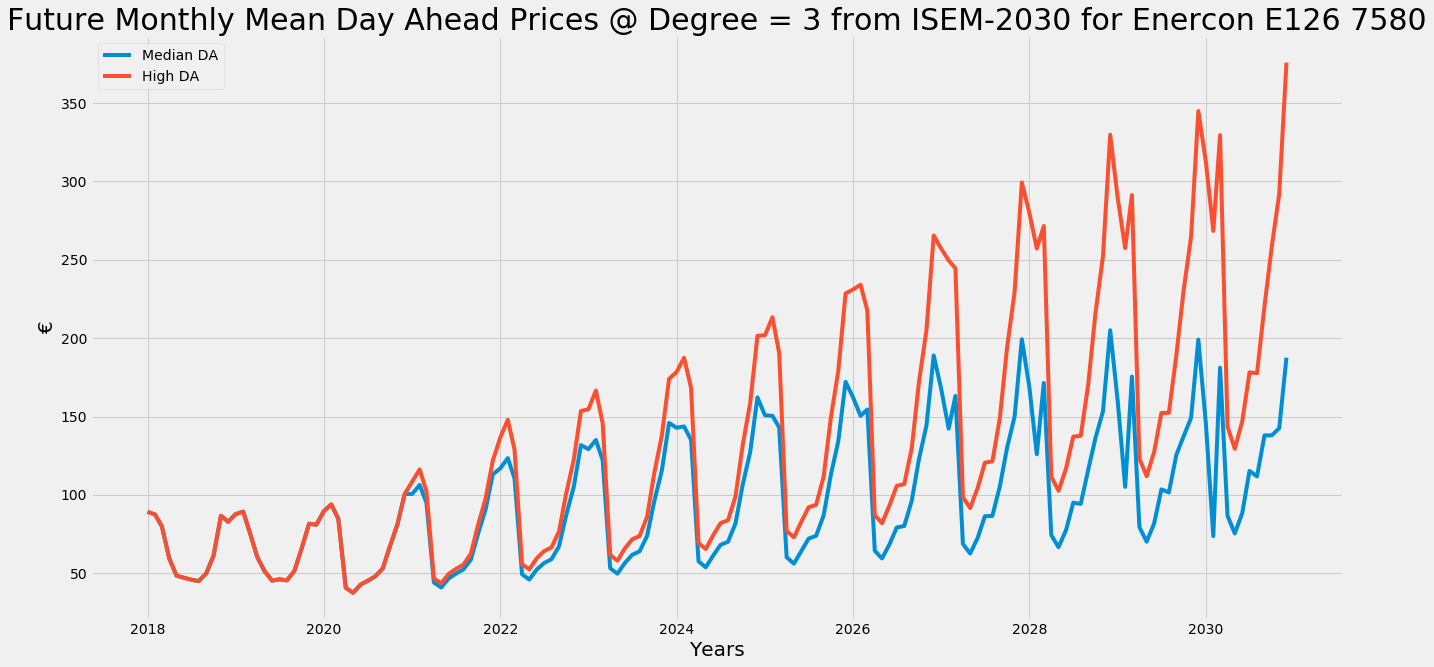

In [113]:
#df_d3A = df_d3A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d3A['DA Ahead on Median Demand 3 degree using Enercon E126 7580'].resample('MS').mean())
plt.plot(df_d3A['DA Ahead on High Demand 3 degree using Enercon E126 7580'].resample('MS').mean())
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 3 from ISEM-2030 for Enercon E126 7580',size = 30)

plt.show()

### Degree = 4

In [114]:
X = np.array(dfA[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(dfA.DA_Prices)

pre_process = PolynomialFeatures(degree=4)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)


#degree = 4
theta0 = pr_model.intercept_
_, theta1, theta2, theta3, theta4, theta5, theta6, theta7,theta8, theta9,theta10,theta11,theta12,theta13,theta14 = pr_model.coef_
theta0, theta1, theta2, theta3,theta4, theta5, theta6, theta7,theta8, theta9,theta10,theta11,theta12,theta13,theta14

(-236.3260577484695,
 0.011575758002052485,
 0.21335185604525095,
 3.577372908760027e-06,
 -2.5577194573802646e-05,
 -5.354028691357817e-05,
 -1.49831615276169e-09,
 -2.4028289040200102e-09,
 1.024793410668057e-08,
 4.2895699394811595e-09,
 3.429759189328696e-13,
 -5.253603541782725e-13,
 9.996389566807595e-13,
 -1.3803087362332378e-12,
 8.00540189693777e-14)

In [115]:
df_d4A= pd.DataFrame(df1A.index)
df_d4A = df_d4A.set_index('date')

newlist = []
wd = df1A['Total Wind Avera M5000-116']
dmd = df1A['median demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4A['DA Ahead on Median Demand 4 degree using Avera M5000-116'] = newlist

newlist = []
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4A['DA Ahead on High Demand 4 degree using Avera M5000-116'] = newlist




newlist = []
wd = df1A['Total Wind MHI Vestas V164 8000']
dmd = df1A['median demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4A['DA Ahead on Median Demand 4 degree using MHI Vestas V164 8000'] = newlist

newlist = []
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4A['DA Ahead on High Demand 4 degree using MHI Vestas V164 8000'] = newlist





newlist = []
wd = df1A['Total Wind MHI Vestas V164 9500']
dmd = df1A['median demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4A['DA Ahead on Median Demand 4 degree using MHI Vestas V164 9500'] = newlist

newlist = []
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4A['DA Ahead on High Demand 4 degree using MHI Vestas V164 9500'] = newlist





newlist = []
wd = df1A['Total Wind Enercon E126 7580']
dmd = df1A['median demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4A['DA Ahead on Median Demand 4 degree using Enercon E126 7580'] = newlist

newlist = []
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4A['DA Ahead on High Demand 4 degree using Enercon E126 7580'] = newlist




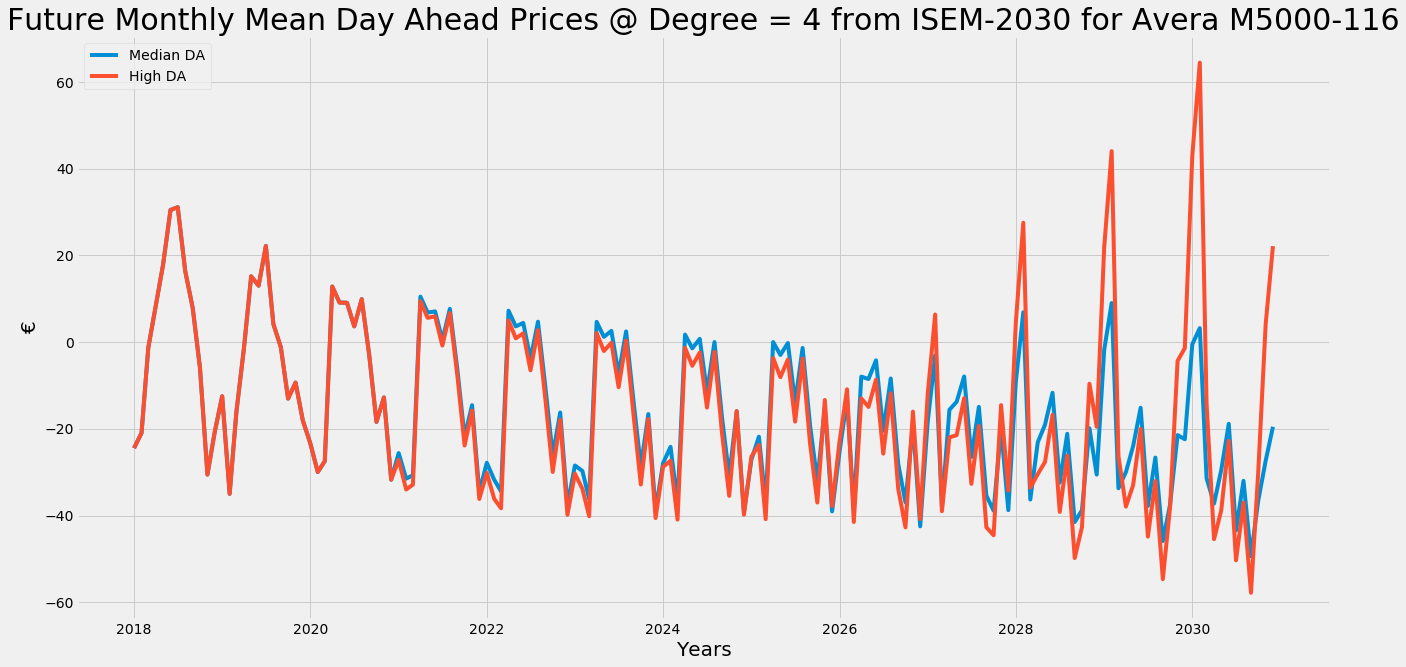

In [116]:
#df_d4A = df_d4A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d4A['DA Ahead on Median Demand 4 degree using Avera M5000-116'].resample('MS').mean())
plt.plot(df_d4A['DA Ahead on High Demand 4 degree using Avera M5000-116'].resample('MS').mean())
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 4 from ISEM-2030 for Avera M5000-116',size = 30)

plt.show()

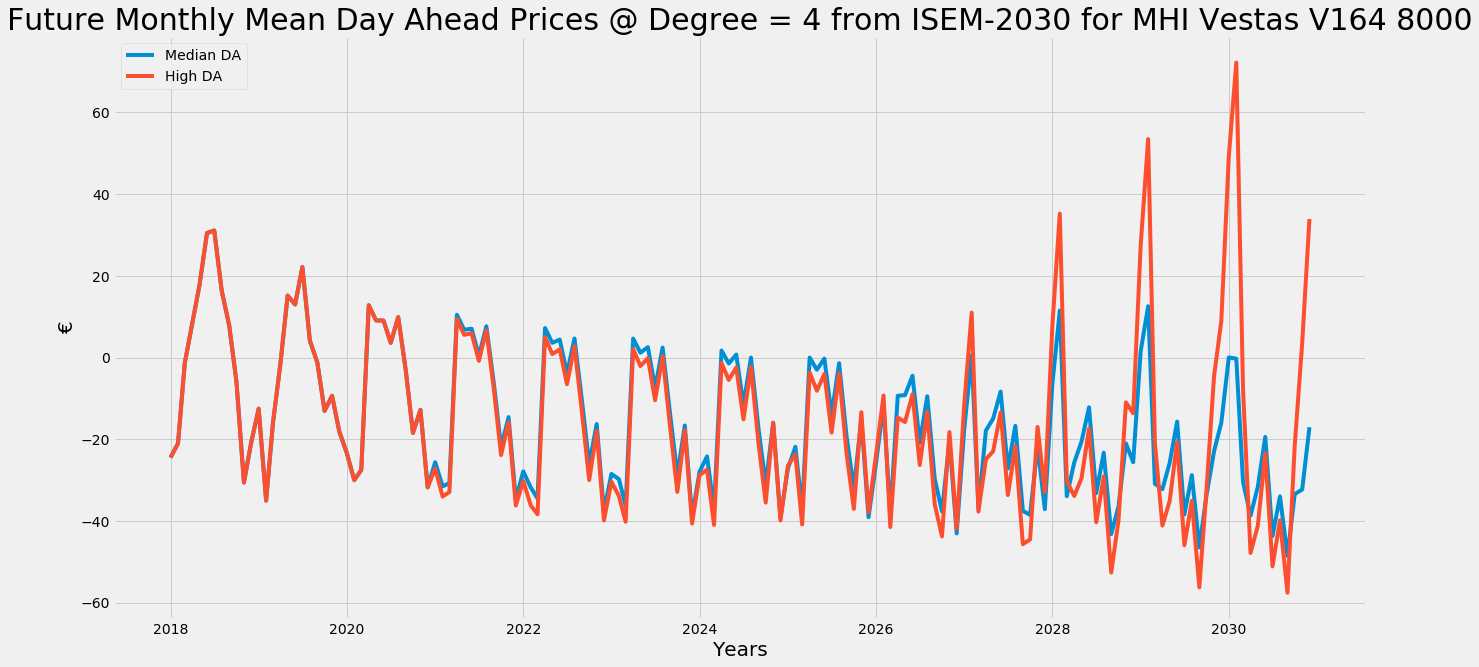

In [117]:
#df_d4A = df_d4A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d4A['DA Ahead on Median Demand 4 degree using MHI Vestas V164 8000'].resample('MS').mean())
plt.plot(df_d4A['DA Ahead on High Demand 4 degree using MHI Vestas V164 8000'].resample('MS').mean())
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 4 from ISEM-2030 for MHI Vestas V164 8000',size = 30)

plt.show()

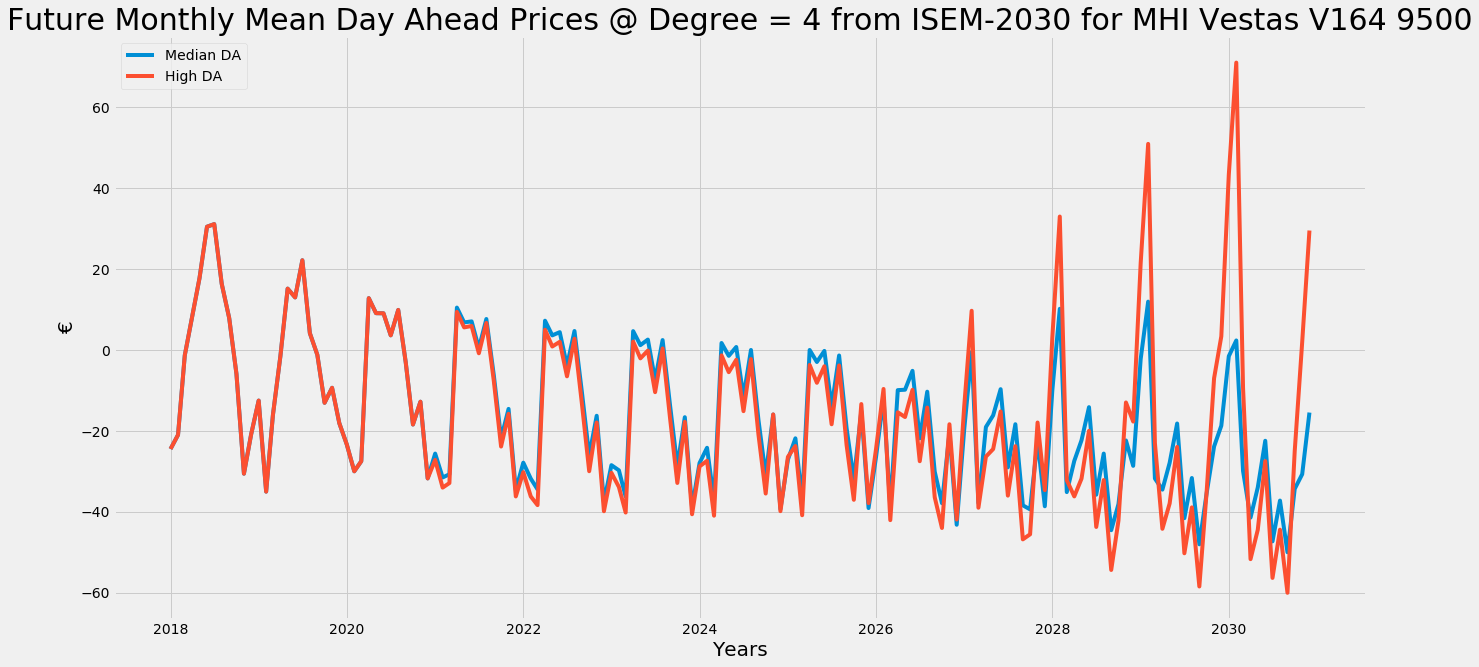

In [118]:
#df_d4A = df_d4A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d4A['DA Ahead on Median Demand 4 degree using MHI Vestas V164 9500'].resample('MS').mean())
plt.plot(df_d4A['DA Ahead on High Demand 4 degree using MHI Vestas V164 9500'].resample('MS').mean())
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 4 from ISEM-2030 for MHI Vestas V164 9500',size = 30)

plt.show()

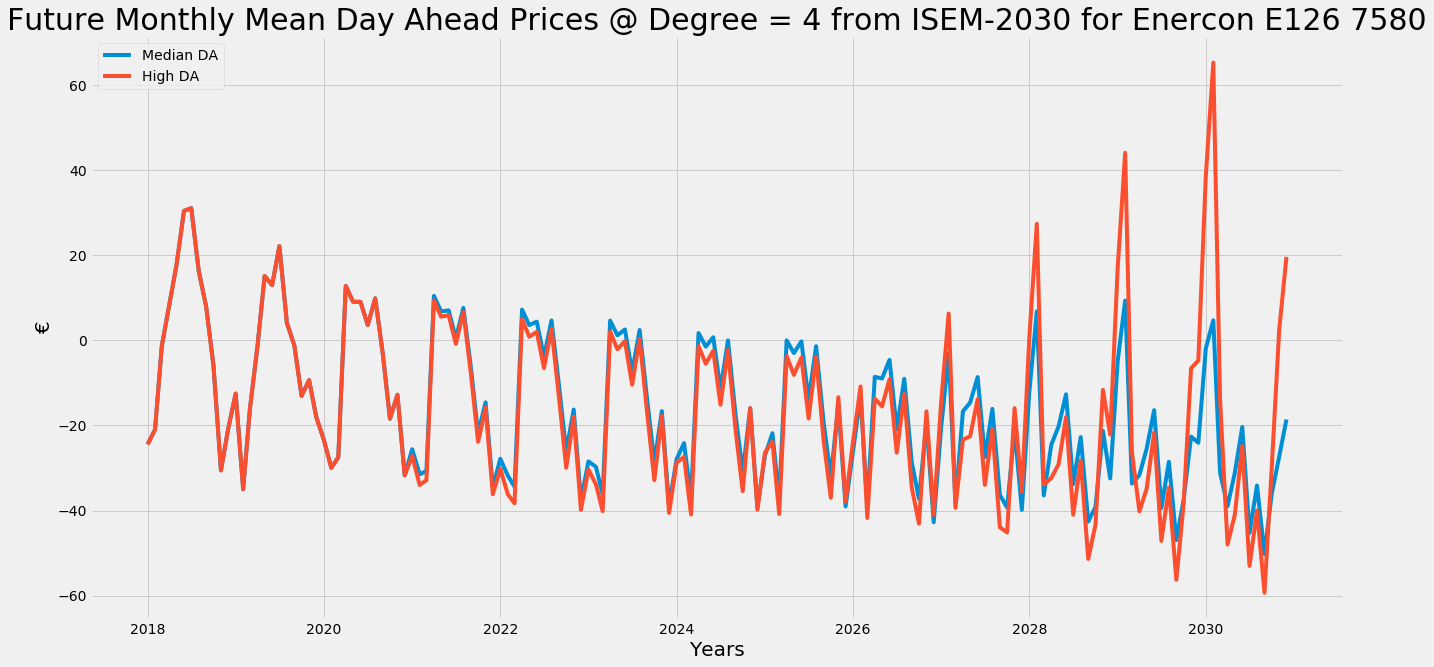

In [119]:
#df_d4A = df_d4A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d4A['DA Ahead on Median Demand 4 degree using Enercon E126 7580'].resample('MS').mean())
plt.plot(df_d4A['DA Ahead on High Demand 4 degree using Enercon E126 7580'].resample('MS').mean())
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 4 from ISEM-2030 for Enercon E126 7580',size = 30)

plt.show()

In [120]:
df_corr = pd.DataFrame()
df_corr['Actual'] = (dfA['DA_Prices'].resample('MS').mean()).tolist()
df_corr['D=1'] = (df_d1['DA Ahead on High Demand 1 degree using Avera M5000-116'].loc[df_d1.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()
df_corr['D=2'] = (df_d2A['DA Ahead on High Demand 2 degree using Avera M5000-116'].loc[df_d2A.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()
df_corr['D=3'] = (df_d3A['DA Ahead on High Demand 3 degree using Avera M5000-116'].loc[df_d3A.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()
df_corr['D=4'] = (df_d4A['DA Ahead on High Demand 4 degree using Avera M5000-116'].loc[df_d4A.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()

(df_corr.corr()).Actual

Actual    1.000000
D=1       0.549152
D=2       0.547460
D=3       0.330770
D=4      -0.167553
Name: Actual, dtype: float64

In [121]:
df_corr = pd.DataFrame()
df_corr['Actual'] = (dfA['DA_Prices'].resample('MS').mean()).tolist()
df_corr['D=1'] = (df_d1['DA Ahead on High Demand 1 degree using MHI Vestas V164 8000'].loc[df_d1.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()
df_corr['D=2'] = (df_d2A['DA Ahead on High Demand 2 degree using MHI Vestas V164 8000'].loc[df_d2A.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()
df_corr['D=3'] = (df_d3A['DA Ahead on High Demand 3 degree using MHI Vestas V164 8000'].loc[df_d3A.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()
df_corr['D=4'] = (df_d4A['DA Ahead on High Demand 4 degree using MHI Vestas V164 8000'].loc[df_d4A.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()

(df_corr.corr()).Actual

Actual    1.000000
D=1       0.549152
D=2       0.547460
D=3       0.330770
D=4      -0.167553
Name: Actual, dtype: float64

In [122]:
df_corr = pd.DataFrame()
df_corr['Actual'] = (dfA['DA_Prices'].resample('MS').mean()).tolist()
df_corr['D=1'] = (df_d1['DA Ahead on High Demand 1 degree using MHI Vestas V164 9500'].loc[df_d1.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()
df_corr['D=2'] = (df_d2A['DA Ahead on High Demand 2 degree using MHI Vestas V164 9500'].loc[df_d2A.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()
df_corr['D=3'] = (df_d3A['DA Ahead on High Demand 3 degree using MHI Vestas V164 9500'].loc[df_d3A.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()
df_corr['D=4'] = (df_d4A['DA Ahead on High Demand 4 degree using MHI Vestas V164 9500'].loc[df_d4A.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()

(df_corr.corr()).Actual

Actual    1.000000
D=1       0.549152
D=2       0.547460
D=3       0.330770
D=4      -0.167553
Name: Actual, dtype: float64

In [123]:
df_corr = pd.DataFrame()
df_corr['Actual'] = (dfA['DA_Prices'].resample('MS').mean()).tolist()
df_corr['D=1'] = (df_d1['DA Ahead on High Demand 1 degree using Enercon E126 7580'].loc[df_d1.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()
df_corr['D=2'] = (df_d2A['DA Ahead on High Demand 2 degree using Enercon E126 7580'].loc[df_d2A.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()
df_corr['D=3'] = (df_d3A['DA Ahead on High Demand 3 degree using Enercon E126 7580'].loc[df_d3A.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()
df_corr['D=4'] = (df_d4A['DA Ahead on High Demand 4 degree using Enercon E126 7580'].loc[df_d4A.index < dt.datetime(2021,1,1)].resample('M').mean()).tolist()

(df_corr.corr()).Actual

Actual    1.000000
D=1       0.549152
D=2       0.547460
D=3       0.330770
D=4      -0.167553
Name: Actual, dtype: float64

### Best Results  REDO

C:\Users\09ant\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


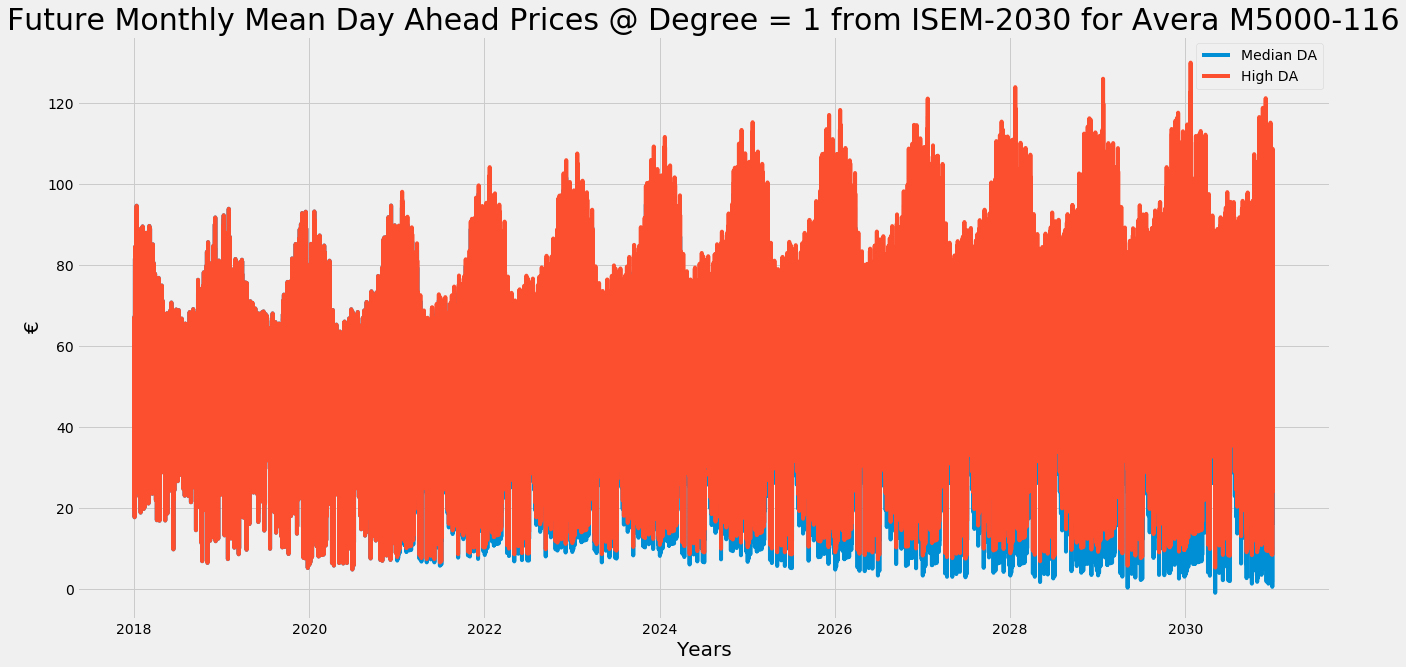

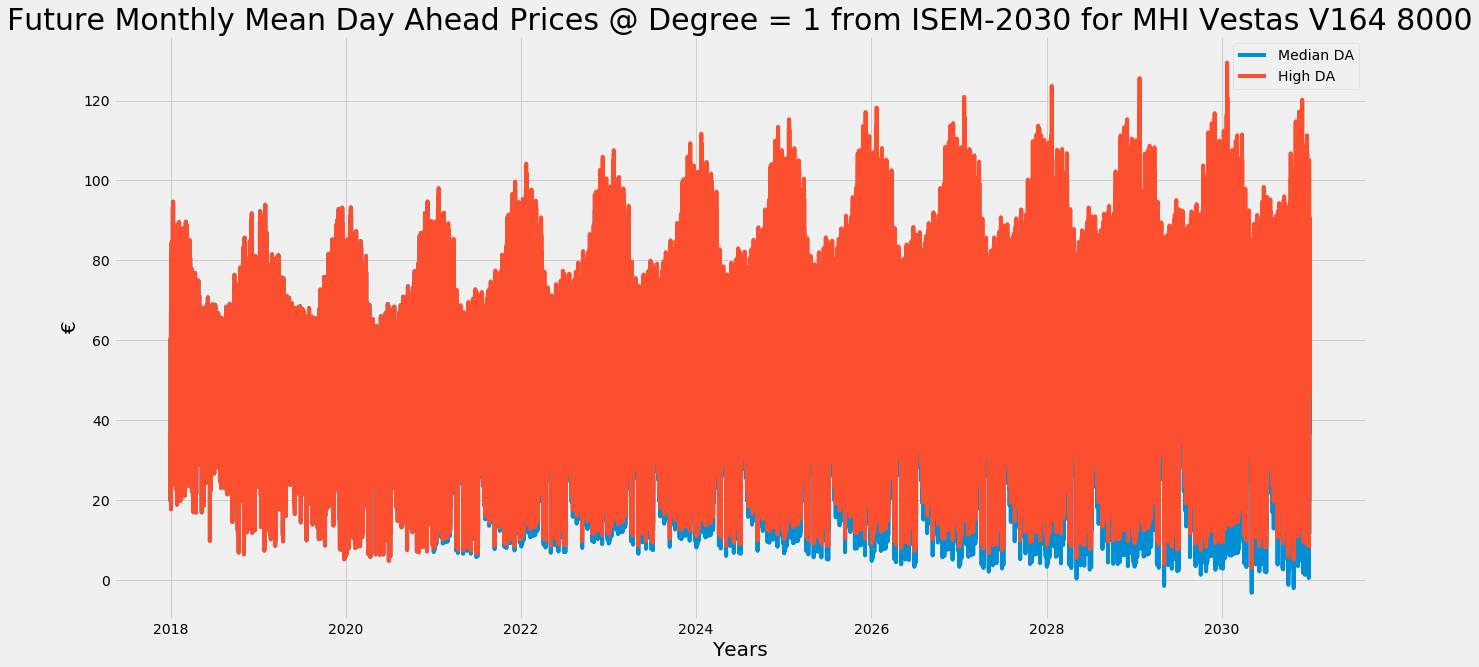

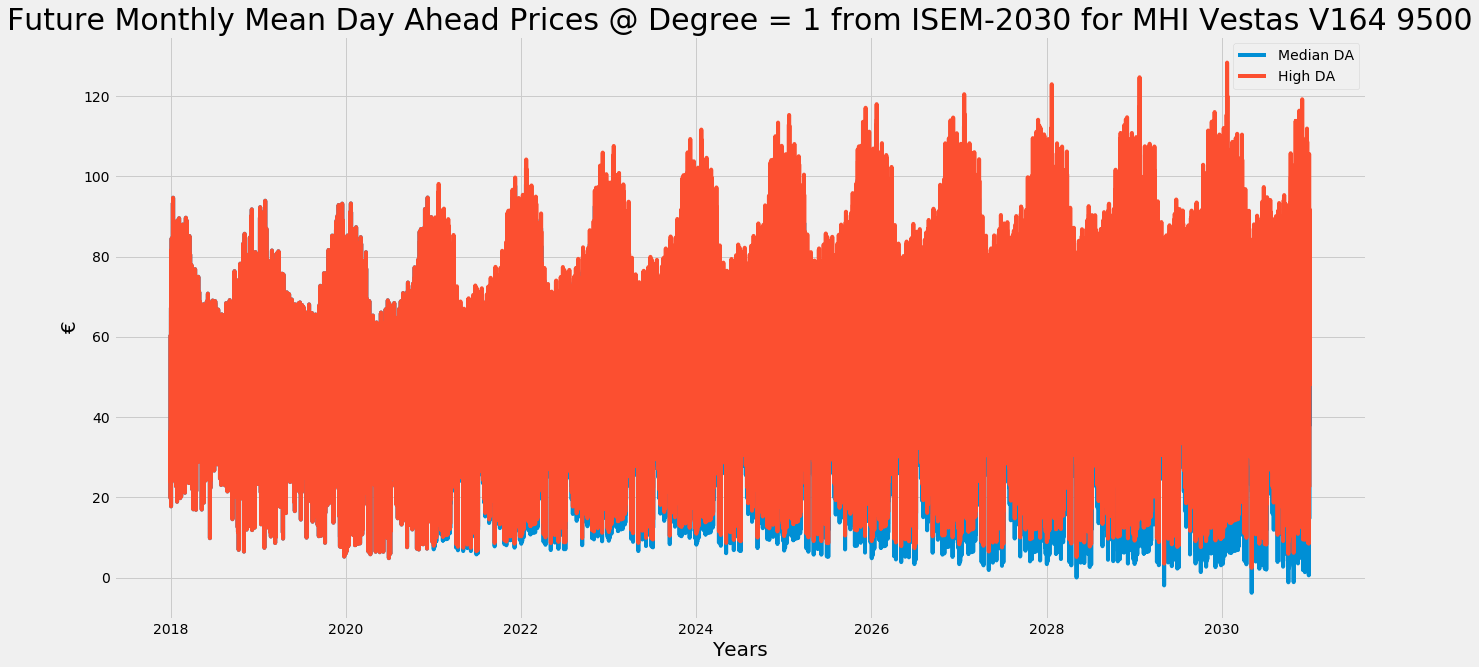

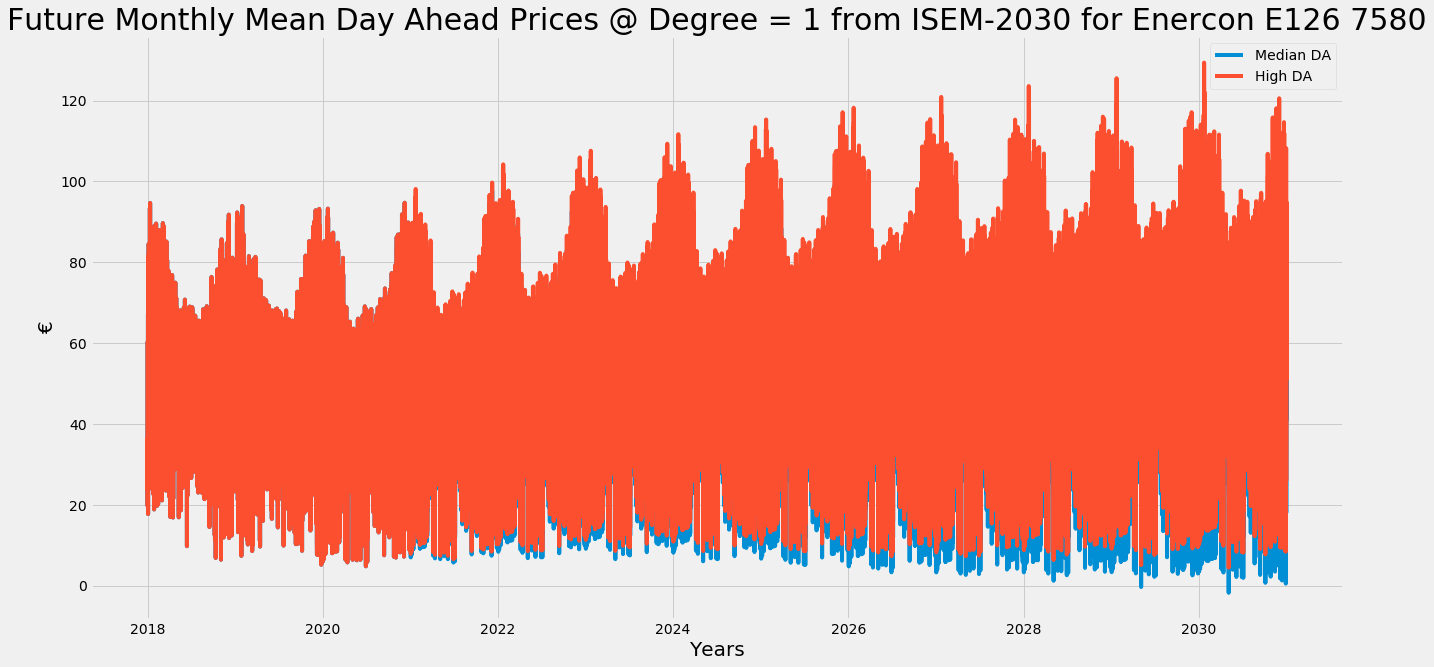

In [125]:
#df_d1 = df_d1.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d1['DA Ahead on Median Demand 1 degree using Avera M5000-116'])
plt.plot(df_d1['DA Ahead on High Demand 1 degree using Avera M5000-116'])
plt.legend(labels=['Median DA','High DA'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 1 from ISEM-2030 for Avera M5000-116', size = 30)

plt.show()

#df_d1 = df_d1.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d1['DA Ahead on Median Demand 1 degree using MHI Vestas V164 8000'])
plt.plot(df_d1['DA Ahead on High Demand 1 degree using MHI Vestas V164 8000'])
plt.legend(labels=['Median DA','High DA'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 1 from ISEM-2030 for MHI Vestas V164 8000', size = 30)

plt.show()

#df_d1 = df_d1.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d1['DA Ahead on Median Demand 1 degree using MHI Vestas V164 9500'])
plt.plot(df_d1['DA Ahead on High Demand 1 degree using MHI Vestas V164 9500'])
plt.legend(labels=['Median DA','High DA'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 1 from ISEM-2030 for MHI Vestas V164 9500', size = 30)

plt.show()

#df_d1 = df_d1.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d1['DA Ahead on Median Demand 1 degree using Enercon E126 7580'])
plt.plot(df_d1['DA Ahead on High Demand 1 degree using Enercon E126 7580'])
plt.legend(labels=['Median DA','High DA'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 1 from ISEM-2030 for Enercon E126 7580', size = 30)

plt.show()

In [133]:
df_d1.min()

DA Ahead on Median Demand 1 degree using Avera M5000-116        -0.925303
DA Ahead on High Demand 1 degree using Avera M5000-116           4.820466
DA Ahead on Median Demand 1 degree using MHI Vestas V164 8000   -3.166209
DA Ahead on High Demand 1 degree using MHI Vestas V164 8000      3.056995
DA Ahead on Median Demand 1 degree using MHI Vestas V164 9500   -3.811858
DA Ahead on High Demand 1 degree using MHI Vestas V164 9500      2.411346
DA Ahead on Median Demand 1 degree using Enercon E126 7580      -1.729543
DA Ahead on High Demand 1 degree using Enercon E126 7580         4.493661
dtype: float64

In [135]:
df_d1.max()

DA Ahead on Median Demand 1 degree using Avera M5000-116         115.370315
DA Ahead on High Demand 1 degree using Avera M5000-116           130.040573
DA Ahead on Median Demand 1 degree using MHI Vestas V164 8000    114.823330
DA Ahead on High Demand 1 degree using MHI Vestas V164 8000      129.493588
DA Ahead on Median Demand 1 degree using MHI Vestas V164 9500    113.702130
DA Ahead on High Demand 1 degree using MHI Vestas V164 9500      128.372387
DA Ahead on Median Demand 1 degree using Enercon E126 7580       114.715438
DA Ahead on High Demand 1 degree using Enercon E126 7580         129.385695
dtype: float64

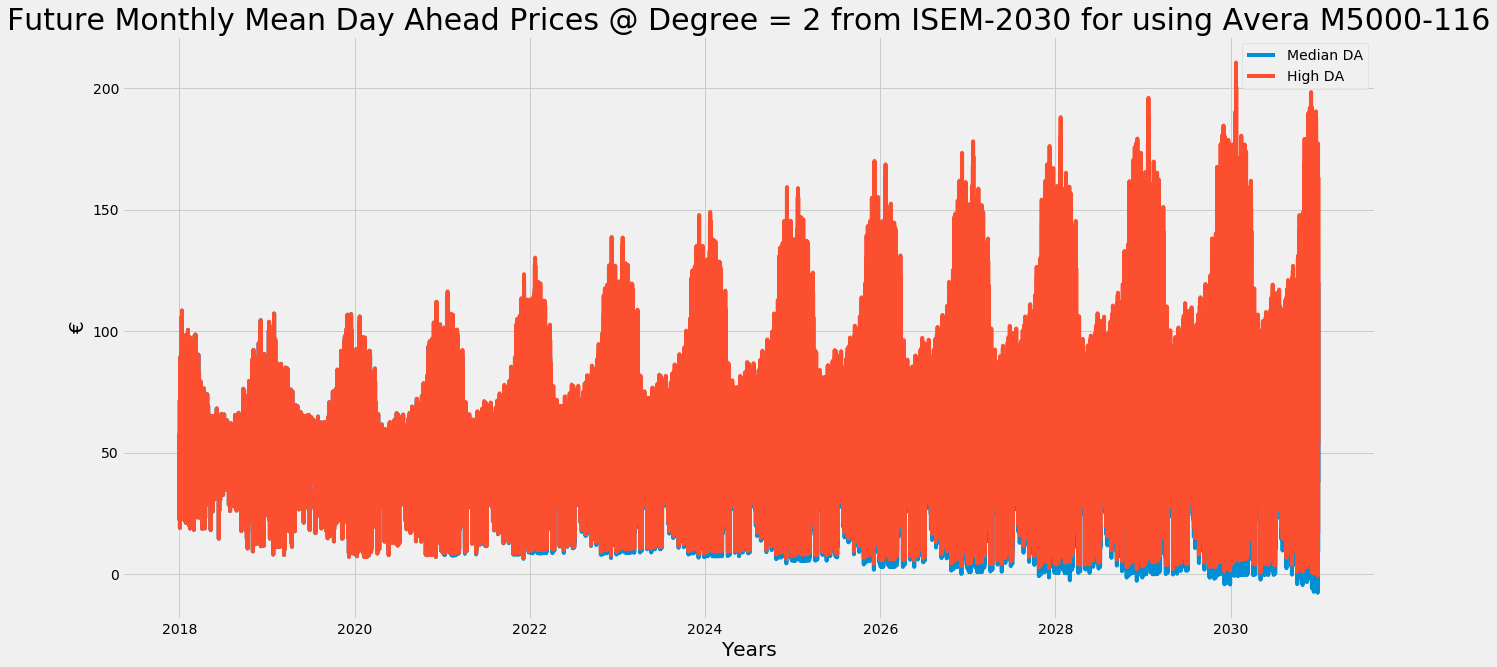

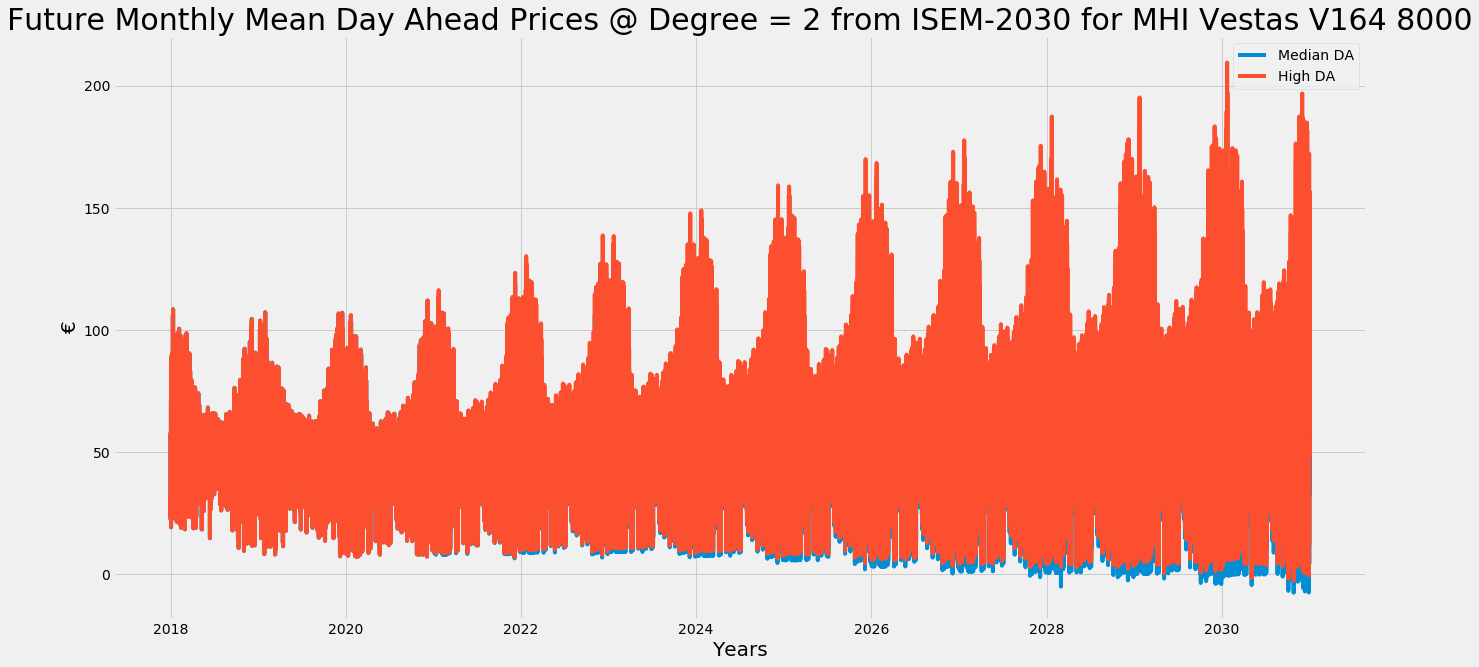

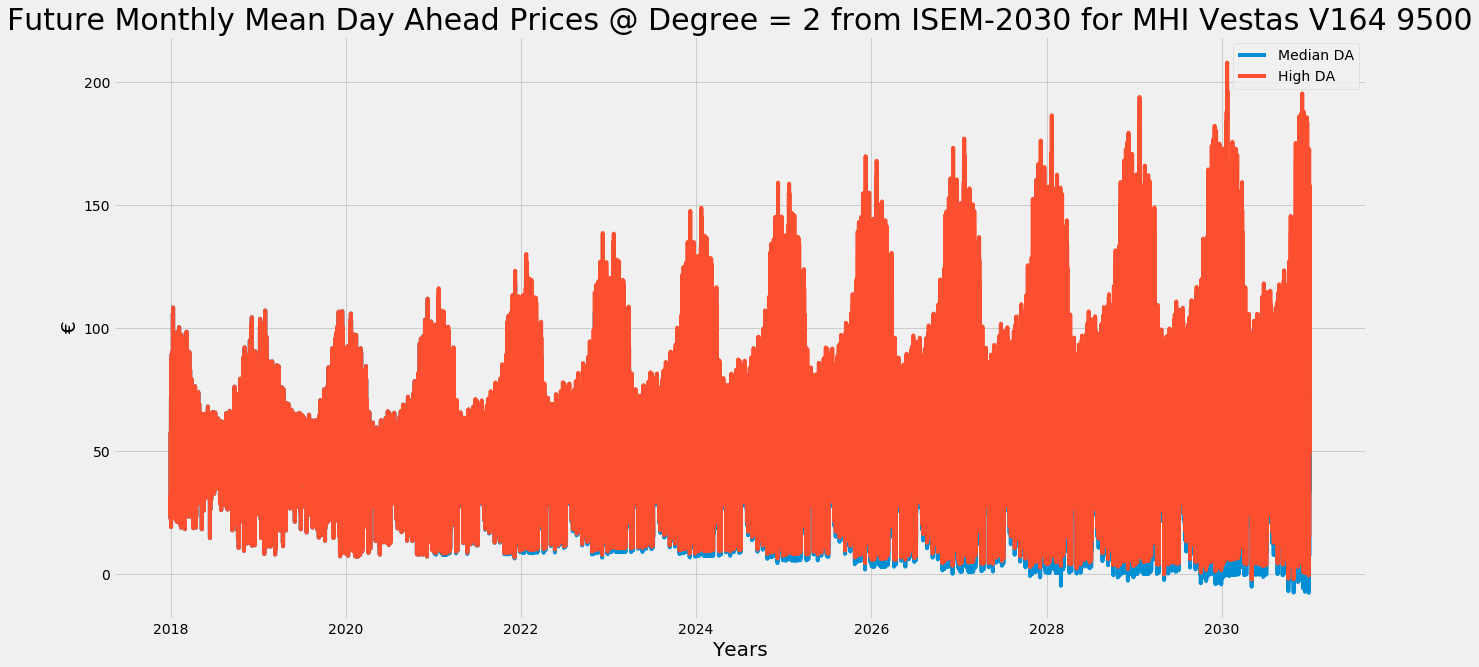

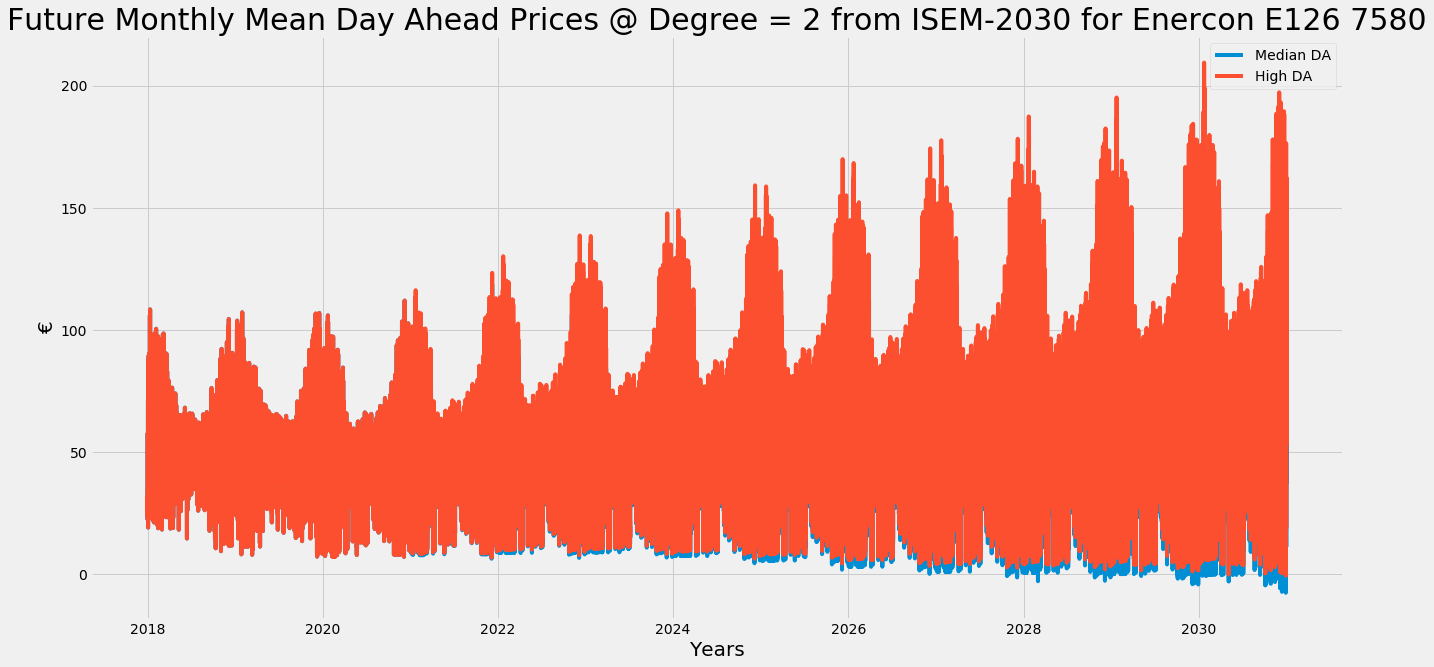

In [126]:

plt.figure(figsize=(20,10))
plt.plot(df_d2A['DA Ahead on Median Demand 2 degree using Avera M5000-116'])
plt.plot(df_d2A['DA Ahead on High Demand 2 degree using Avera M5000-116'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 2 from ISEM-2030 for using Avera M5000-116',size = 30)
plt.show()

#df_d2A = df_d2A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d2A['DA Ahead on Median Demand 2 degree using MHI Vestas V164 8000'])
plt.plot(df_d2A['DA Ahead on High Demand 2 degree using MHI Vestas V164 8000'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 2 from ISEM-2030 for MHI Vestas V164 8000',size = 30)
plt.show()

#df_d2A = df_d2A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d2A['DA Ahead on Median Demand 2 degree using MHI Vestas V164 9500'])
plt.plot(df_d2A['DA Ahead on High Demand 2 degree using MHI Vestas V164 9500'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 2 from ISEM-2030 for MHI Vestas V164 9500',size = 30)
plt.show()

#df_d2A = df_d2A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d2A['DA Ahead on Median Demand 2 degree using Enercon E126 7580'])
plt.plot(df_d2A['DA Ahead on High Demand 2 degree using Enercon E126 7580'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 2 from ISEM-2030 for Enercon E126 7580',size = 30)
plt.show()

In [138]:
df_d2A.min()

DA Ahead on Median Demand 2 degree using Avera M5000-116        -7.549593
DA Ahead on High Demand 2 degree using Avera M5000-116          -0.534294
DA Ahead on Median Demand 2 degree using MHI Vestas V164 8000   -7.680296
DA Ahead on High Demand 2 degree using MHI Vestas V164 8000     -2.717304
DA Ahead on Median Demand 2 degree using MHI Vestas V164 9500   -7.549593
DA Ahead on High Demand 2 degree using MHI Vestas V164 9500     -2.221900
DA Ahead on Median Demand 2 degree using Enercon E126 7580      -7.549593
DA Ahead on High Demand 2 degree using Enercon E126 7580        -0.534294
dtype: float64

In [139]:
df_d2A.max()

DA Ahead on Median Demand 2 degree using Avera M5000-116         165.303628
DA Ahead on High Demand 2 degree using Avera M5000-116           210.400875
DA Ahead on Median Demand 2 degree using MHI Vestas V164 8000    164.467217
DA Ahead on High Demand 2 degree using MHI Vestas V164 8000      209.524134
DA Ahead on Median Demand 2 degree using MHI Vestas V164 9500    163.036342
DA Ahead on High Demand 2 degree using MHI Vestas V164 9500      208.024284
DA Ahead on Median Demand 2 degree using Enercon E126 7580       164.429617
DA Ahead on High Demand 2 degree using Enercon E126 7580         209.484721
dtype: float64

In [127]:
print( (df_d1['DA Ahead on Median Demand 1 degree using Avera M5000-116']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )
print( (df_d1['DA Ahead on Median Demand 1 degree using MHI Vestas V164 8000']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )
print( (df_d1['DA Ahead on Median Demand 1 degree using MHI Vestas V164 9500']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )
print( (df_d1['DA Ahead on Median Demand 1 degree using Enercon E126 7580']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )



47.07129735966739
44.962897762547456
44.91642024872324
46.737955707190366


In [128]:
print( (df_d1['DA Ahead on High Demand 1 degree using Avera M5000-116']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )
print( (df_d1['DA Ahead on High Demand 1 degree using MHI Vestas V164 8000']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )
print( (df_d1['DA Ahead on High Demand 1 degree using MHI Vestas V164 9500']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )
print( (df_d1['DA Ahead on High Demand 1 degree using Enercon E126 7580']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )



56.838649439262106
54.73024984214261
54.68377232831843
56.50530778678553


In [129]:
print( (df_d2A['DA Ahead on Median Demand 2 degree using Avera M5000-116']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )
print( (df_d2A['DA Ahead on Median Demand 2 degree using MHI Vestas V164 8000']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )
print( (df_d2A['DA Ahead on Median Demand 2 degree using MHI Vestas V164 9500']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )
print( (df_d2A['DA Ahead on Median Demand 2 degree using Enercon E126 7580']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )



47.7531546548275
45.294162864476306
45.281327075835755
47.38915875038702


In [130]:
print( (df_d2A['DA Ahead on High Demand 2 degree using Avera M5000-116']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )
print( (df_d2A['DA Ahead on High Demand 2 degree using MHI Vestas V164 8000']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )
print( (df_d2A['DA Ahead on High Demand 2 degree using MHI Vestas V164 9500']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )
print( (df_d2A['DA Ahead on High Demand 2 degree using Enercon E126 7580']).loc[df_d2A.index >= dt.datetime(2030,1,1)].mean() )


63.98103855619665
61.426964444708574
61.41615776664647
63.60445835704011
